# Data Exploration and LASSO Model on raw data

This notebook initially explores the data, giving it a quick glance on some important information such as **Number of Missing Values, Outliers, Distribution of each feature**. <br>

Then, we will impute the missing value in the training dataset with a suitable method as LASSO cannot handle missing values. <br>

After that, we will train the LASSO model on the dataset with no missing values, but **without other data cleaning methods**, to initially see the performance of LASSO. <br>

In another notebook, we will clean the dataset with more sophisticated methods and retrain LASSO to see if the performance is improved.

## Data Exploration
Have a look at the important information of the Training dataset with a quick glance

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import random

In [2]:
data_dirpath = 'C:\\Users\\yixin\\Desktop\\Workspace\\Personal GitHub Repos\\House-Prices\\Projects\\House price prediction\\data'

train_csv = pd.read_csv(os.path.join(data_dirpath, "train.csv"))
test_csv = pd.read_csv(os.path.join(data_dirpath, "test.csv"))

In [3]:
train_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_csv[train_csv["Alley"] == "Grvl"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,110000
92,93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,163500
106,107,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,450,8,2007,WD,Normal,100000
204,205,50,RM,50.0,3500,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,4,2009,WD,Normal,110000
217,218,70,RM,57.0,9906,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Family,107000
246,247,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,137000
264,265,30,RM,30.0,5232,Pave,Grvl,IR3,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,73000
291,292,190,RL,55.0,5687,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,135900
307,308,50,RM,NaN,7920,Pave,Grvl,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2008,WD,Normal,89500


In [6]:
train_csv[train_csv["PoolQC"].notna()][["PoolQC", "SalePrice"]]

,PoolQC,SalePrice
197,Ex,235000
810,Fa,181000
1170,Gd,171000
1182,Ex,745000
1298,Gd,160000
1386,Fa,250000
1423,Gd,274970


In [7]:
train_csv[train_csv["PoolQC"].isna()]["SalePrice"].mean()

180404.66345492084

In [8]:
for feature in train_csv.columns:
    print(f"{feature}: {train_csv[feature].unique()} \n")

Id: [   1    2    3 ... 1458 1459 1460] 

MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH'] 

LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.] 

LotArea: [ 8450  9600 11250 ... 17217 13175  9717] 

Street: ['Pave' 'Grvl'] 

Alley: [nan 'Grvl' 'Pave'] 

LotShape: ['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour: ['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities: ['AllPub' 'NoSeWa'] 

LotConfig: ['Inside' 'FR2' 'Corner' 'Cu

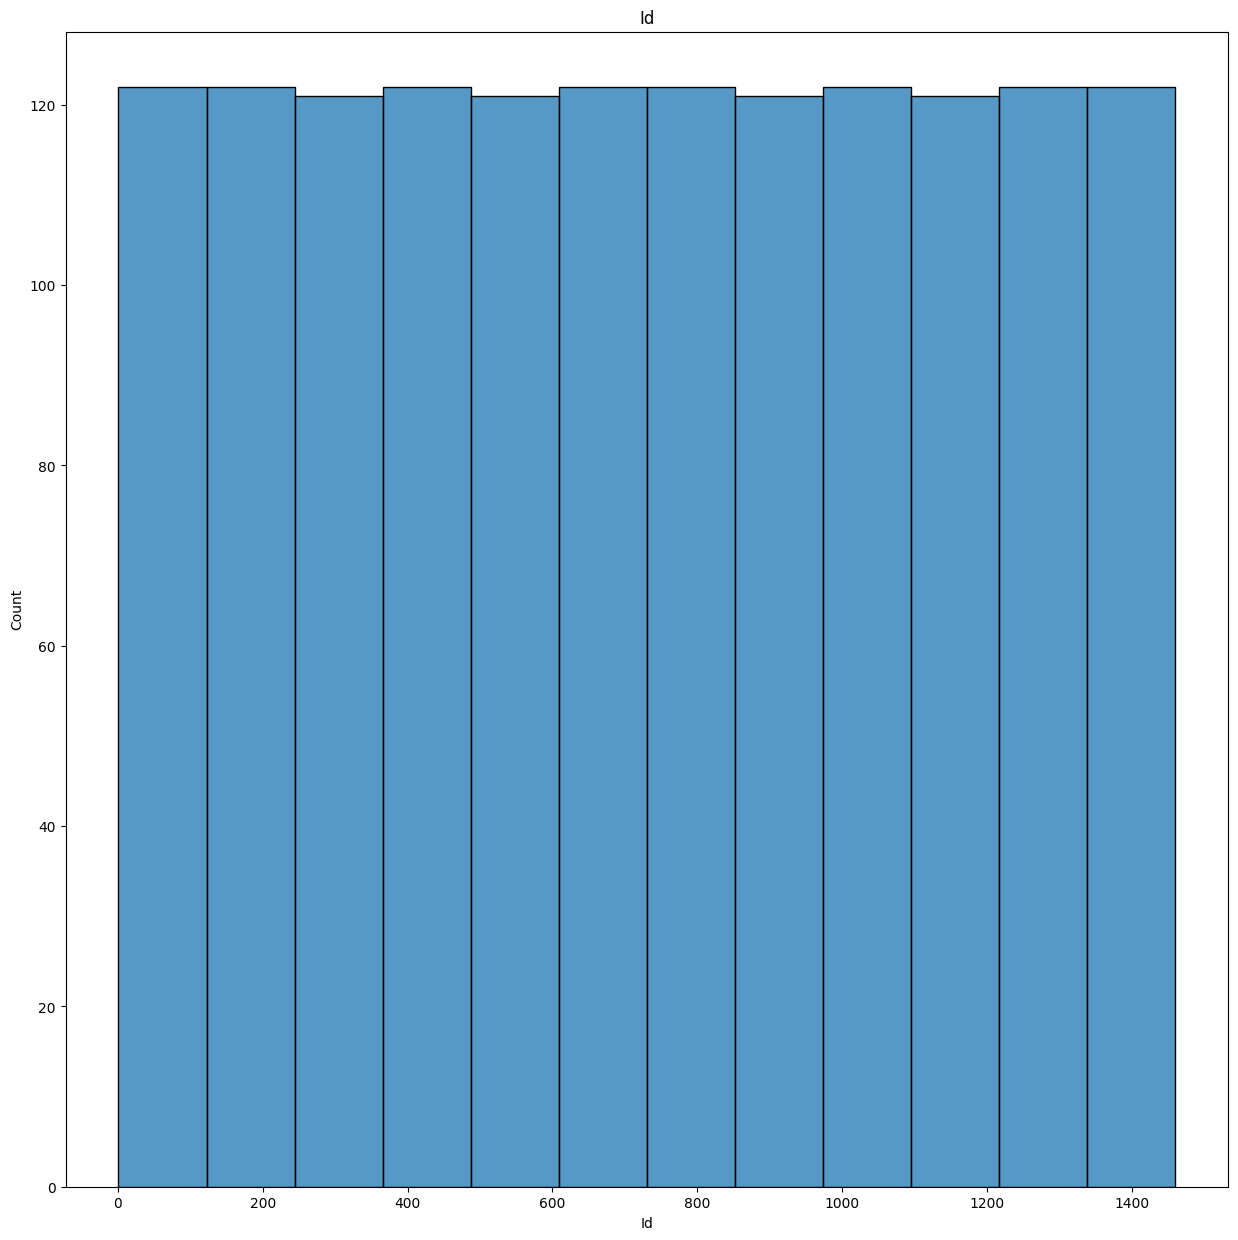

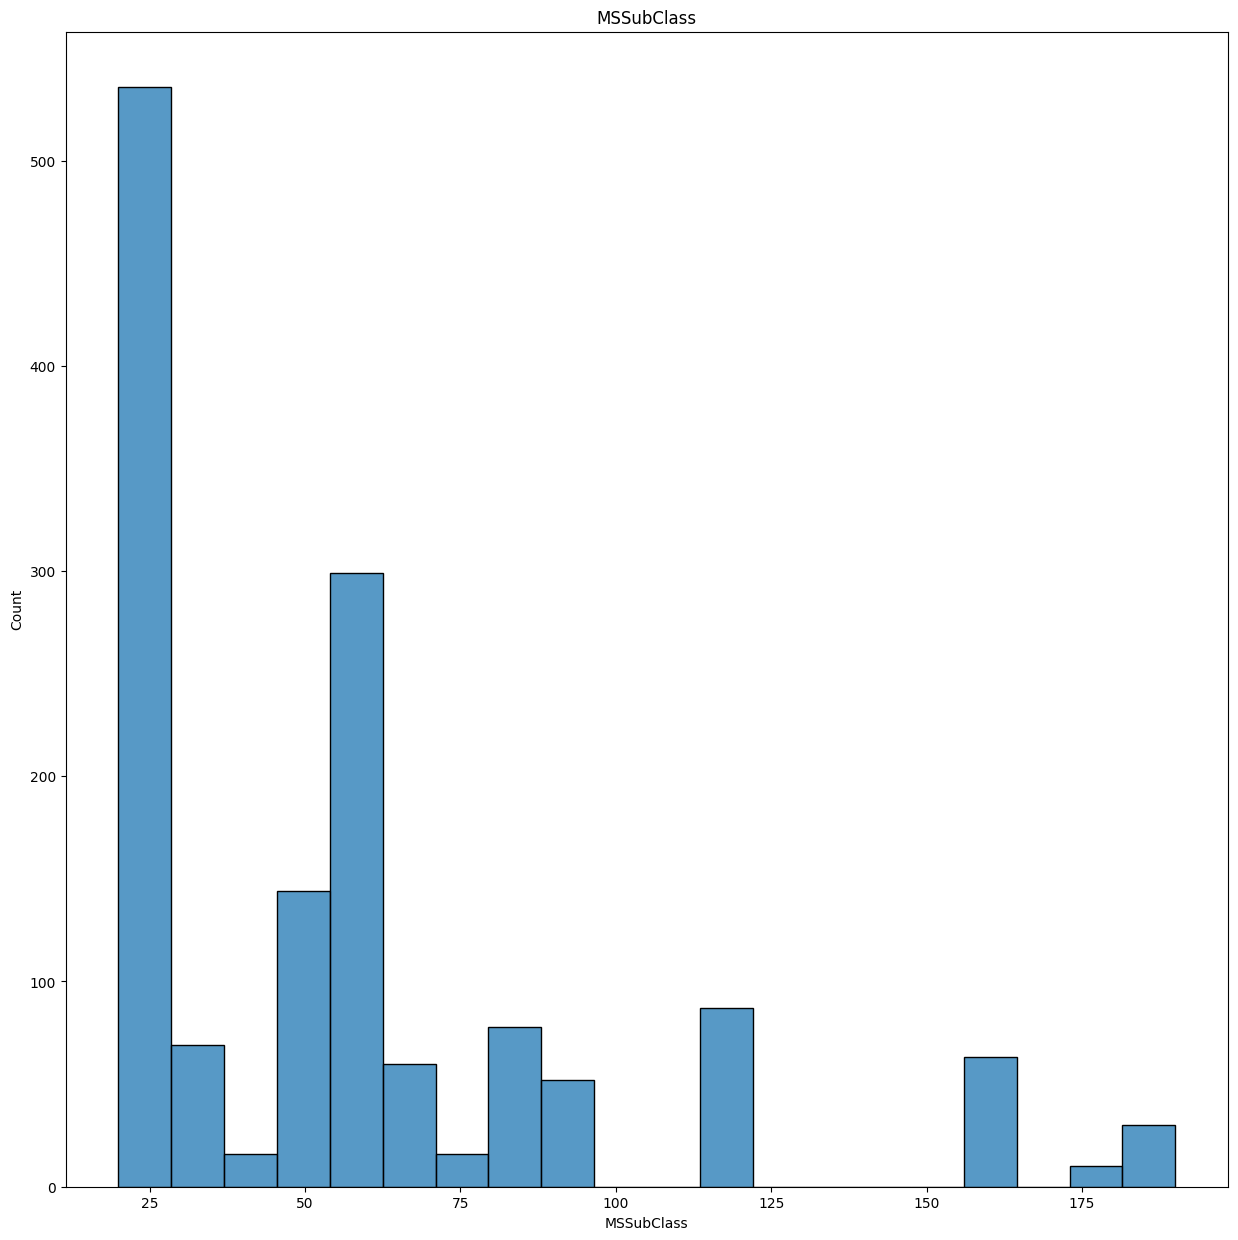

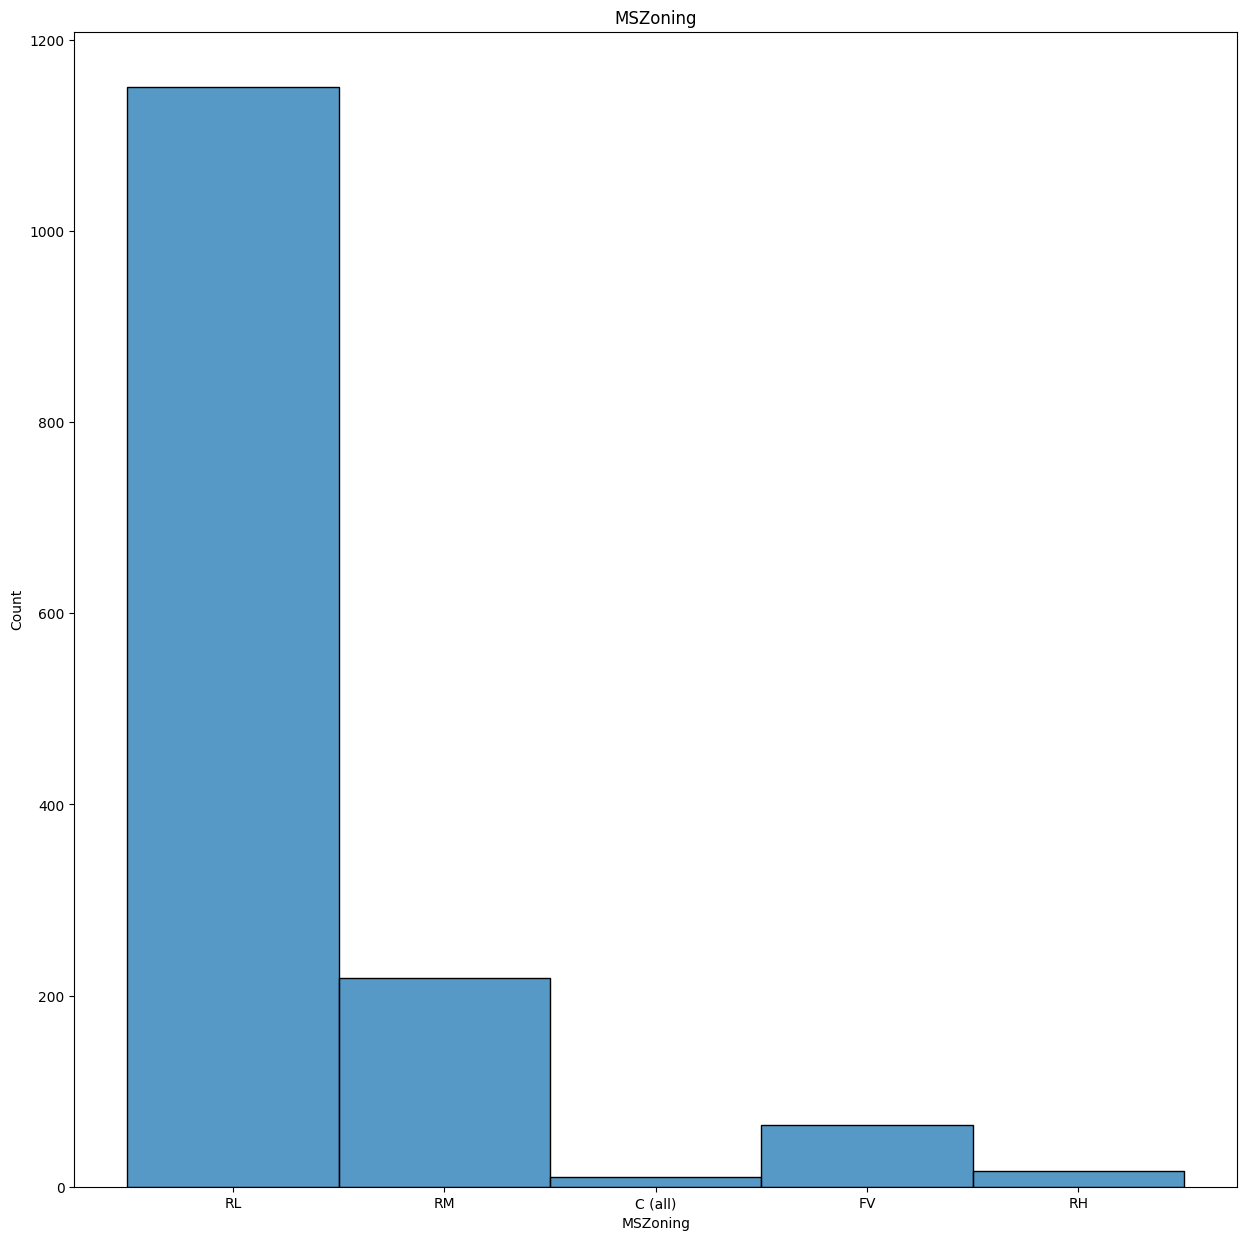

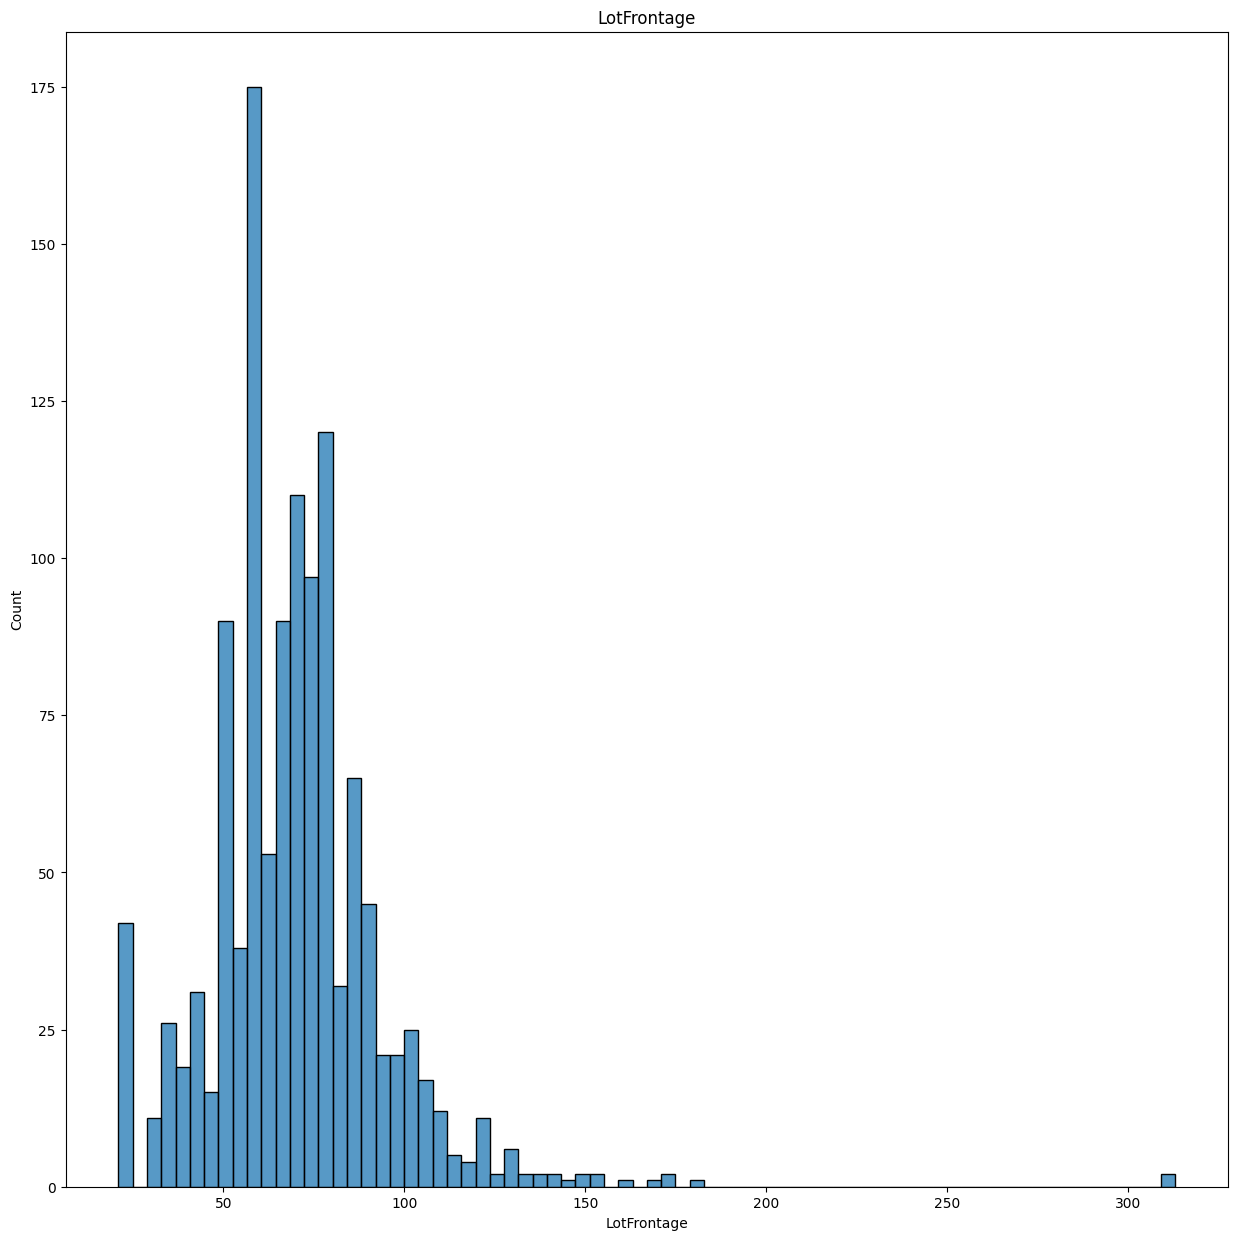

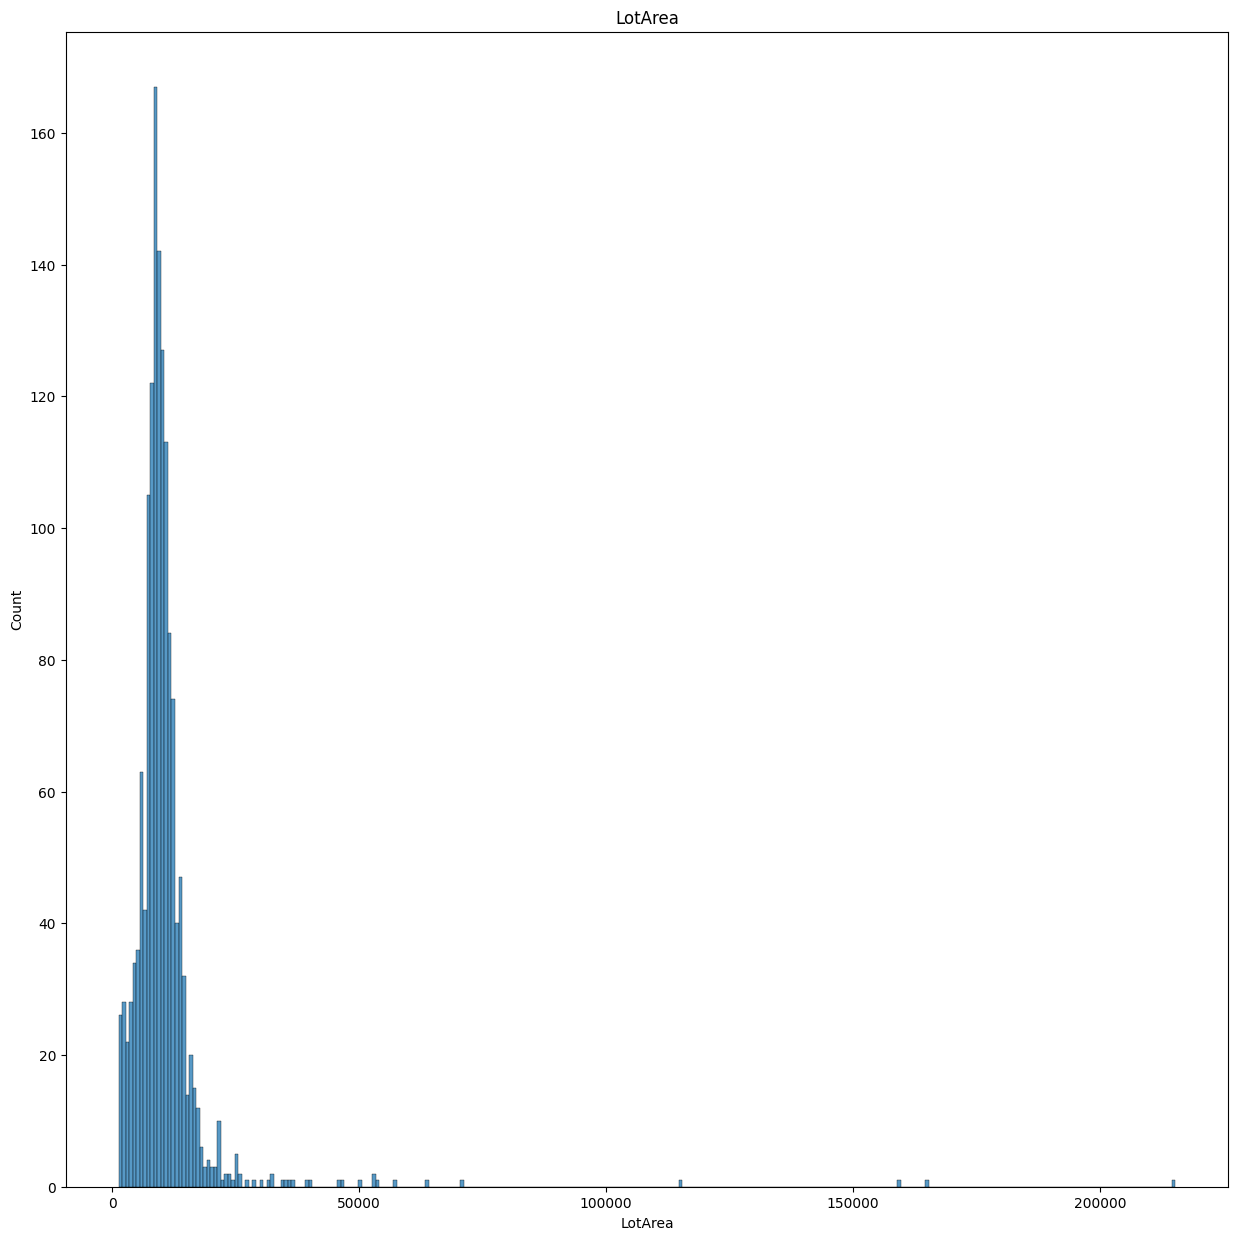

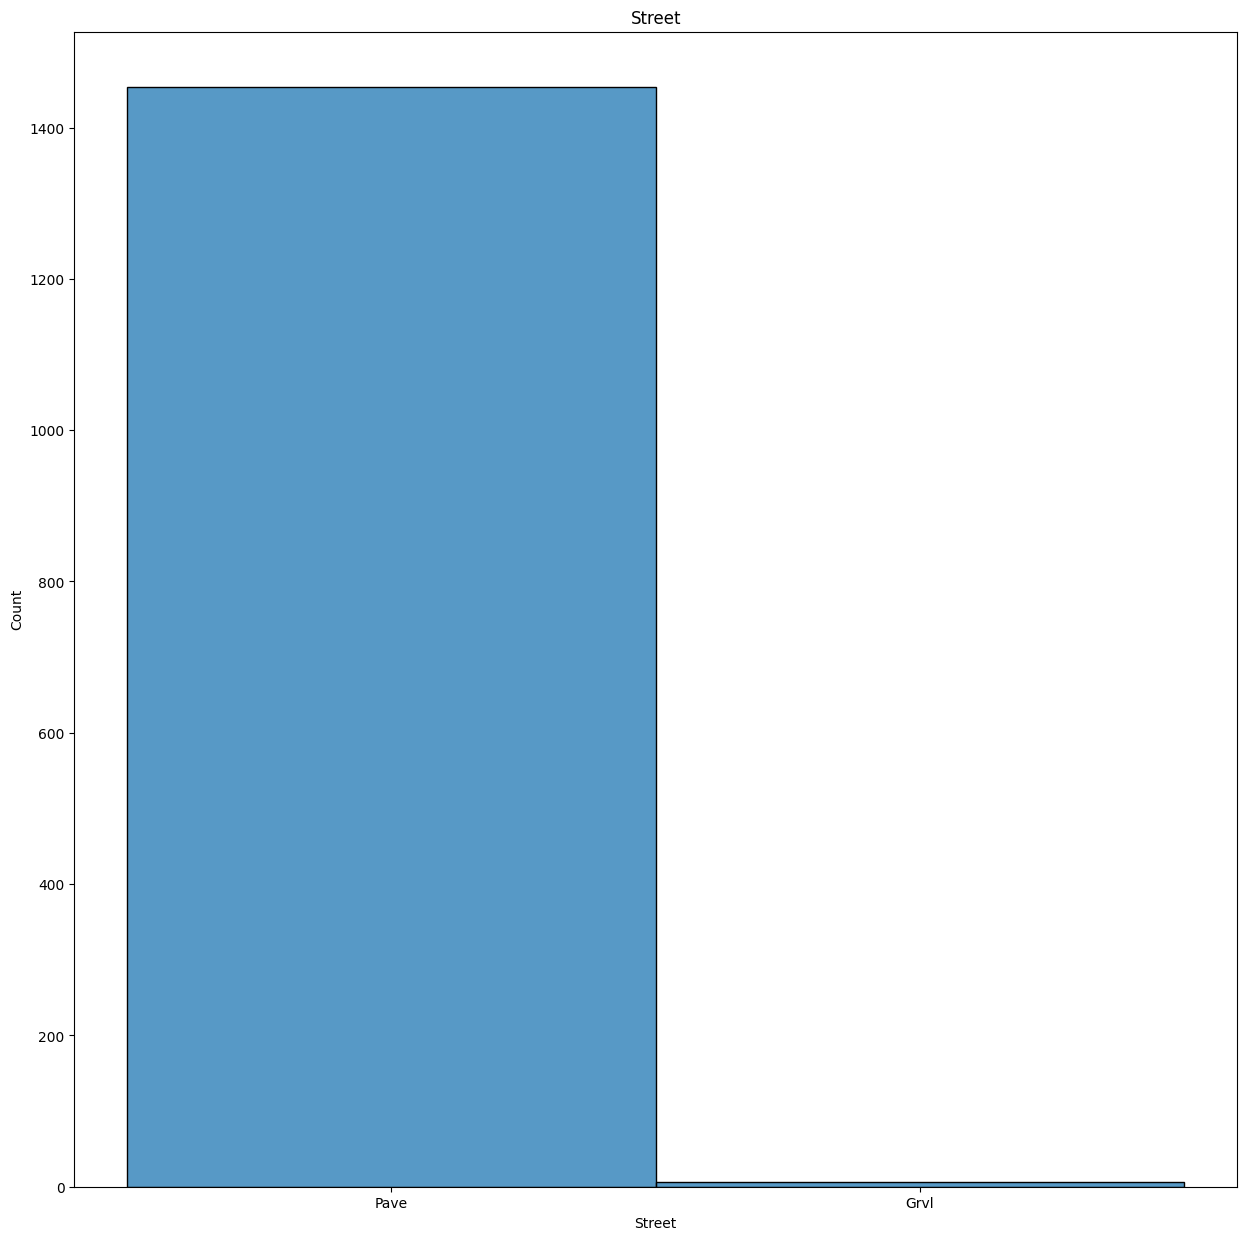

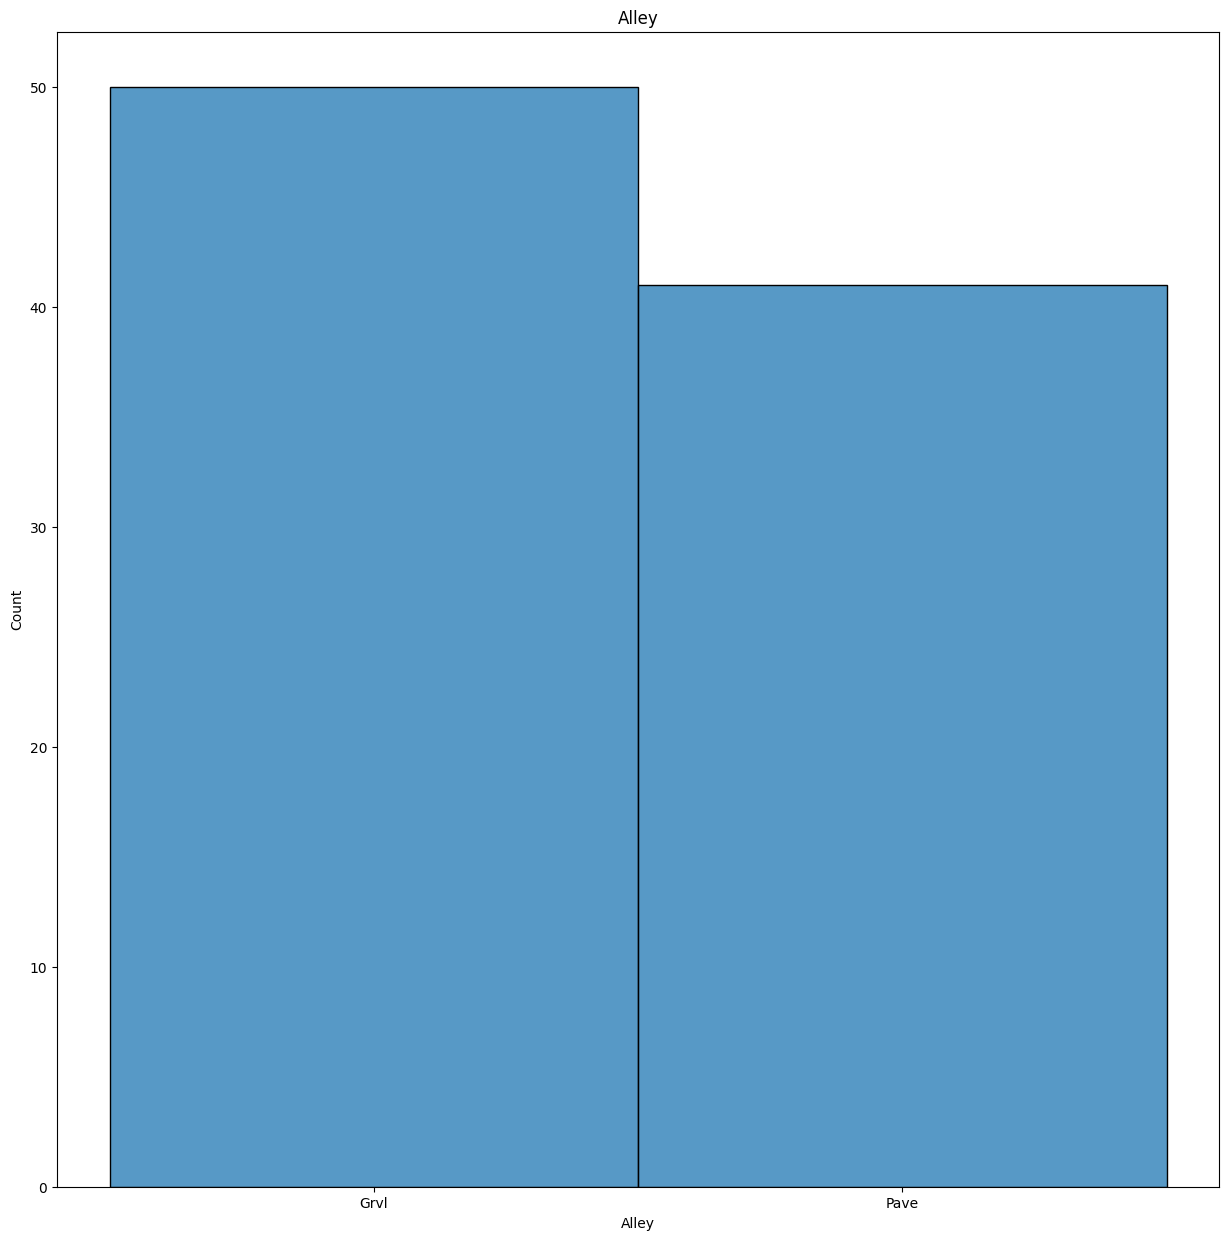

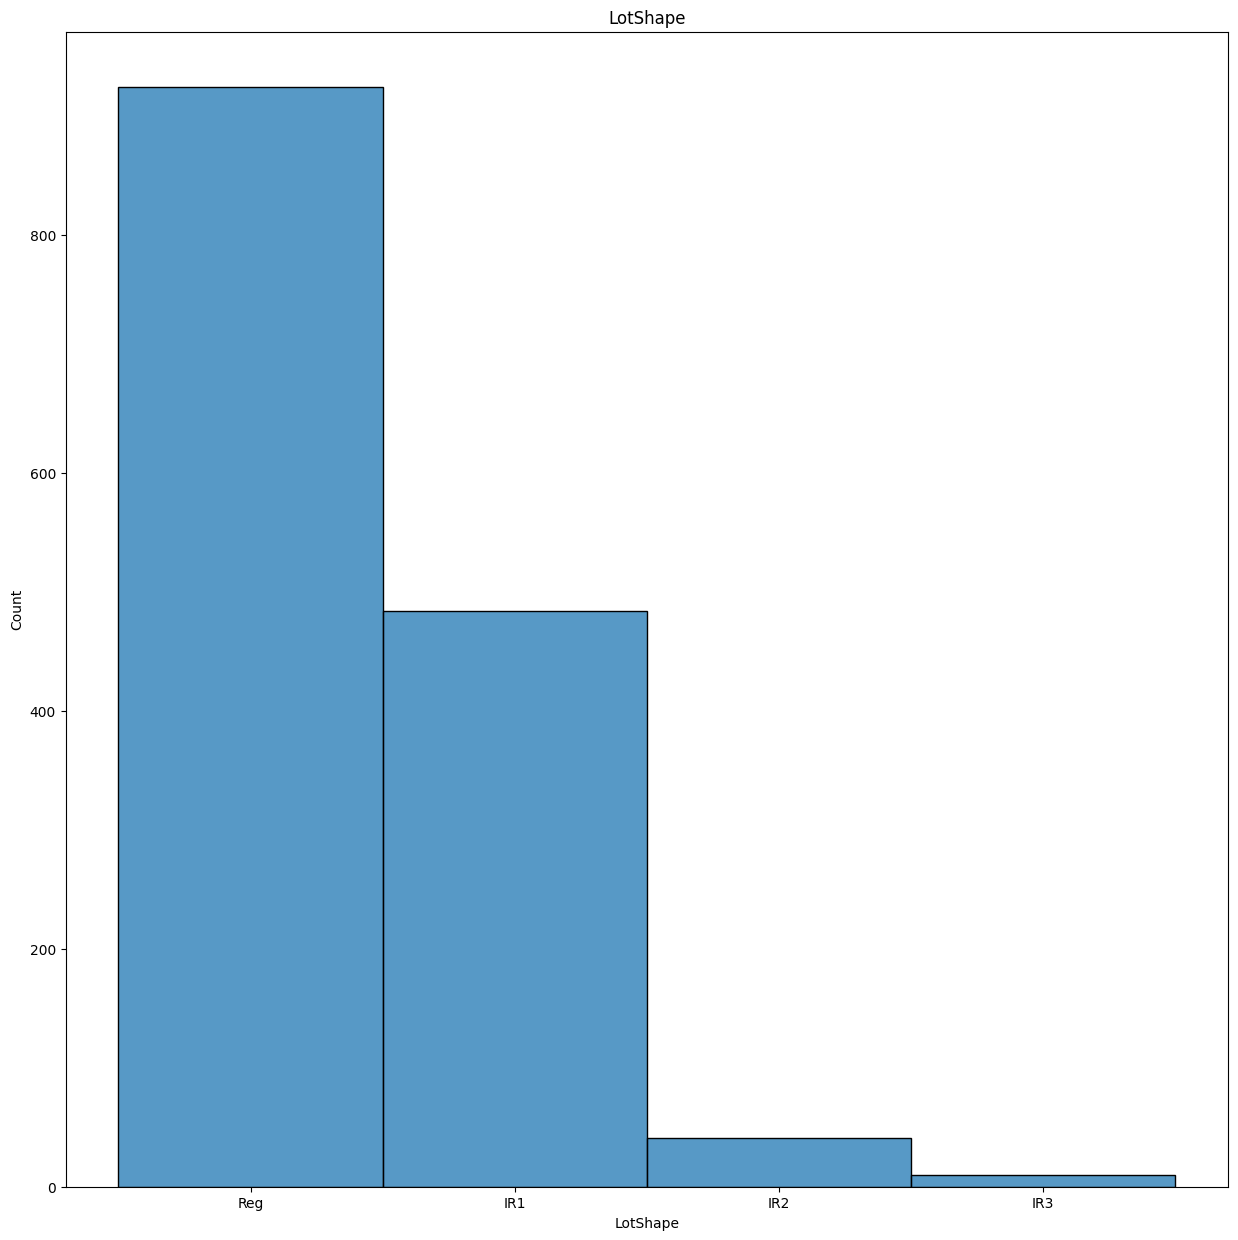

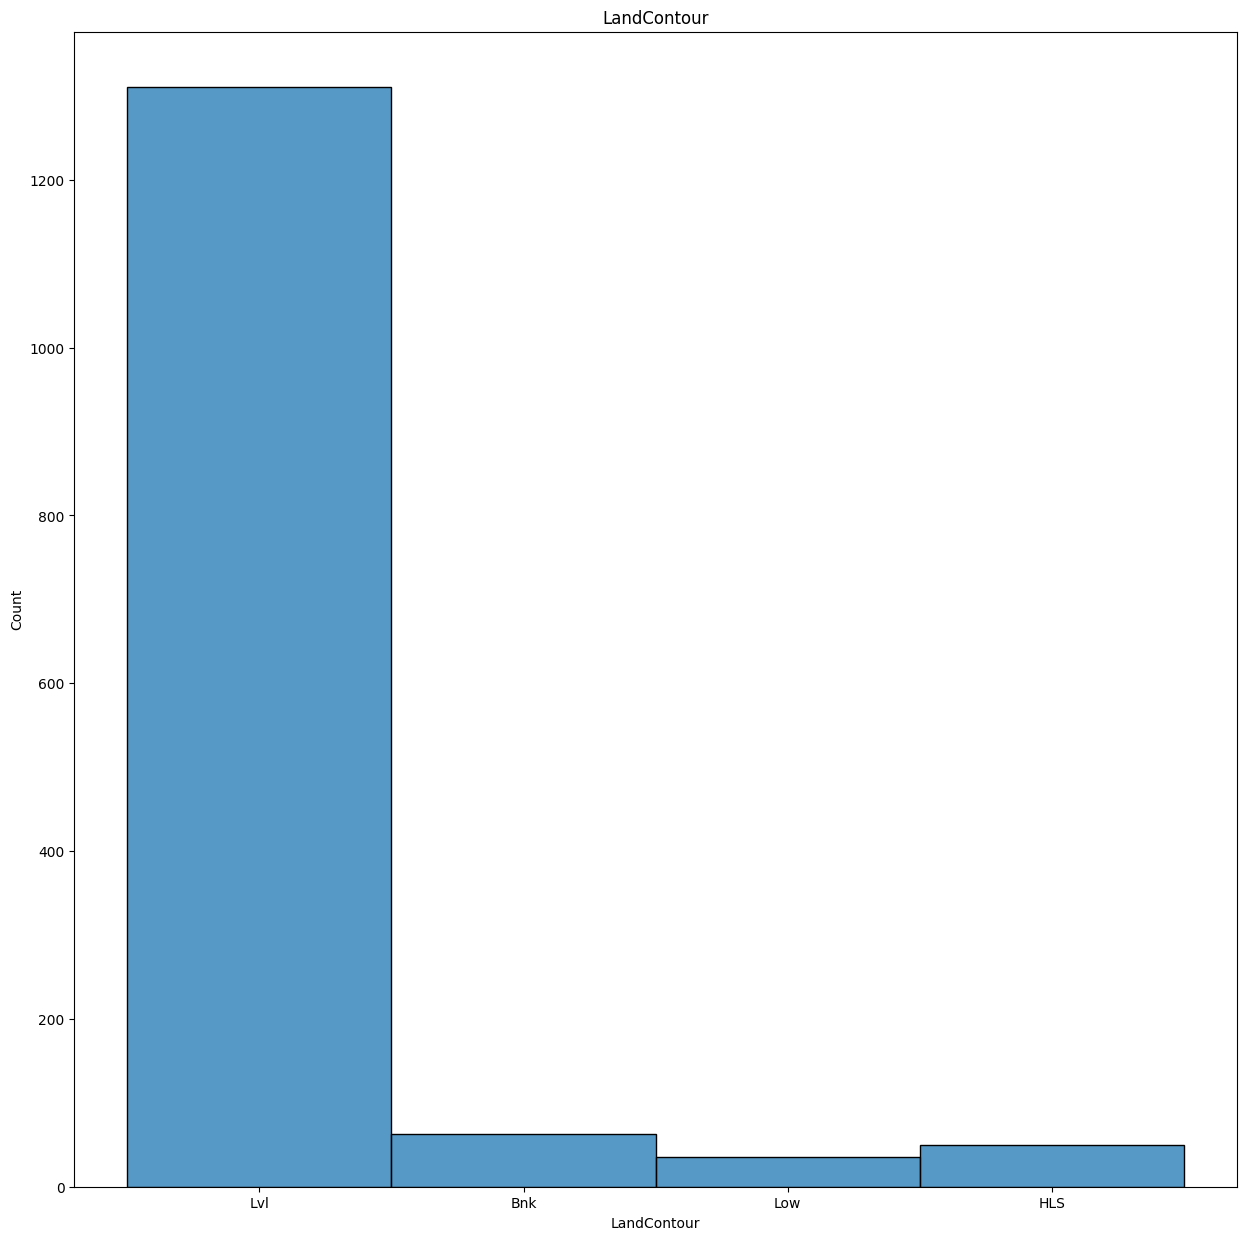

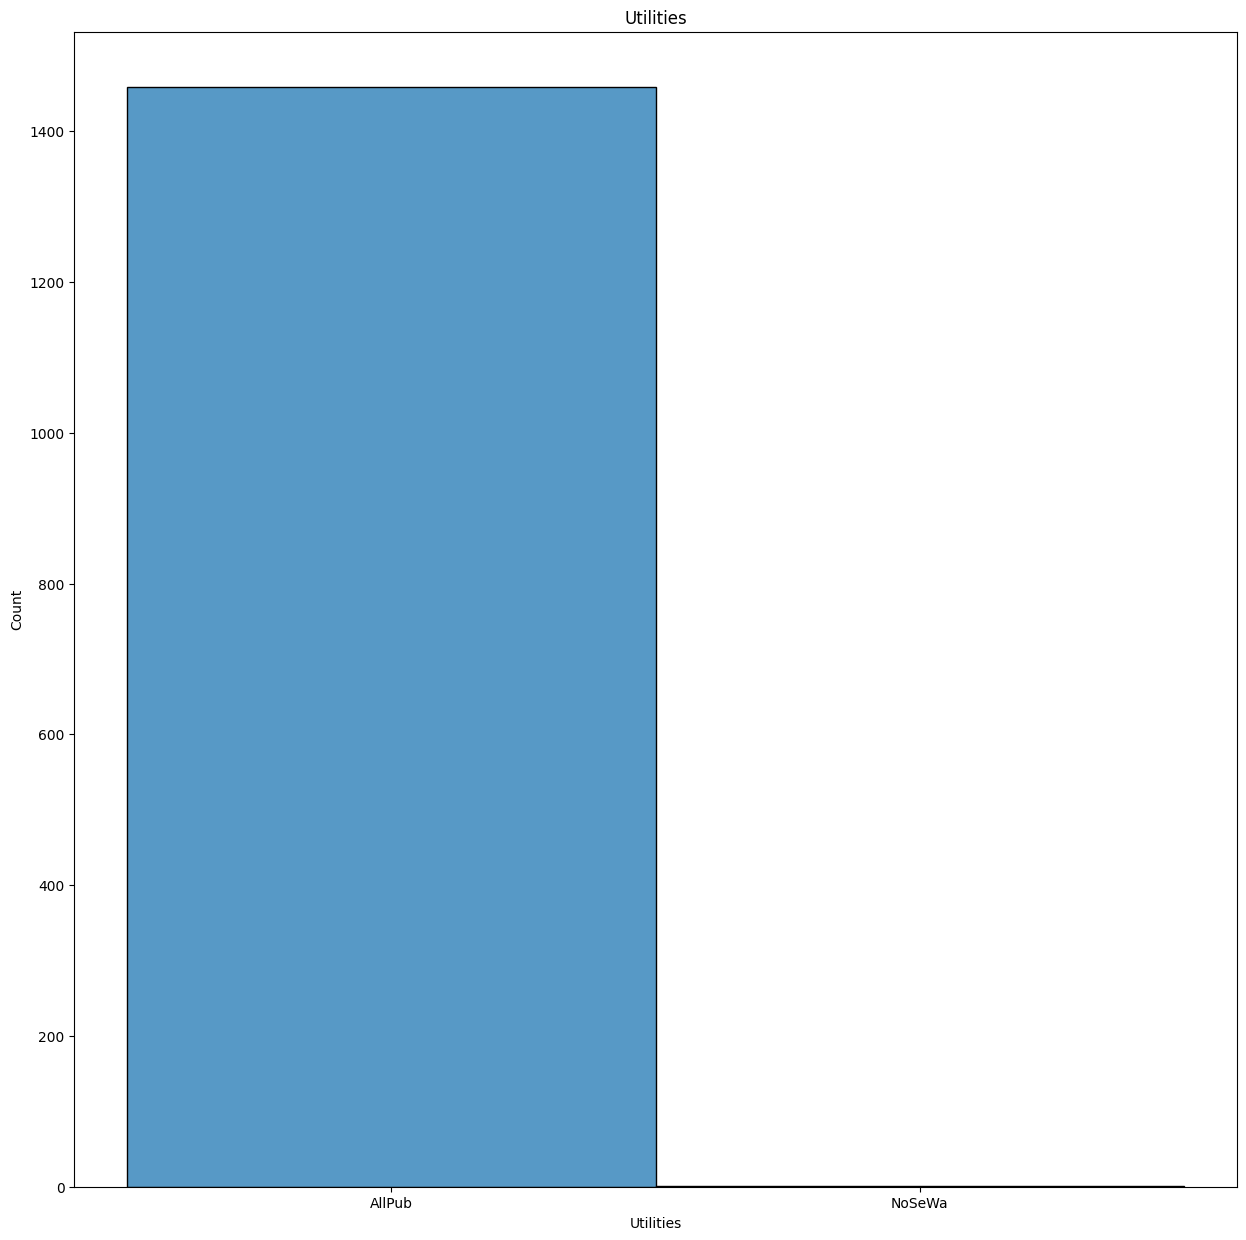

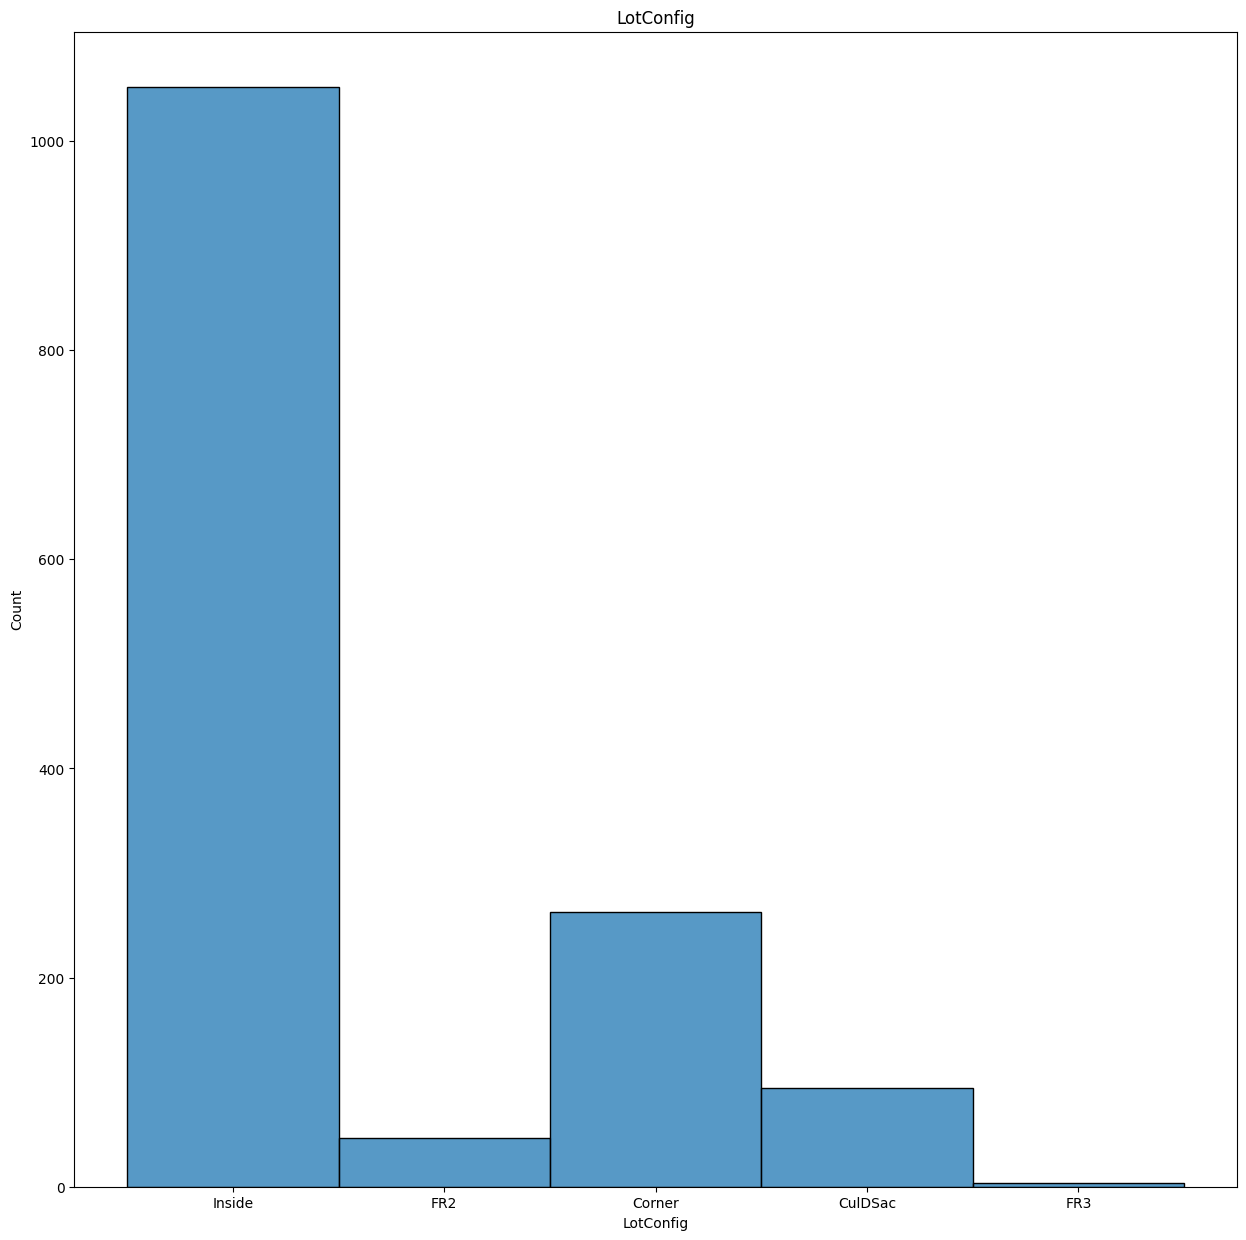

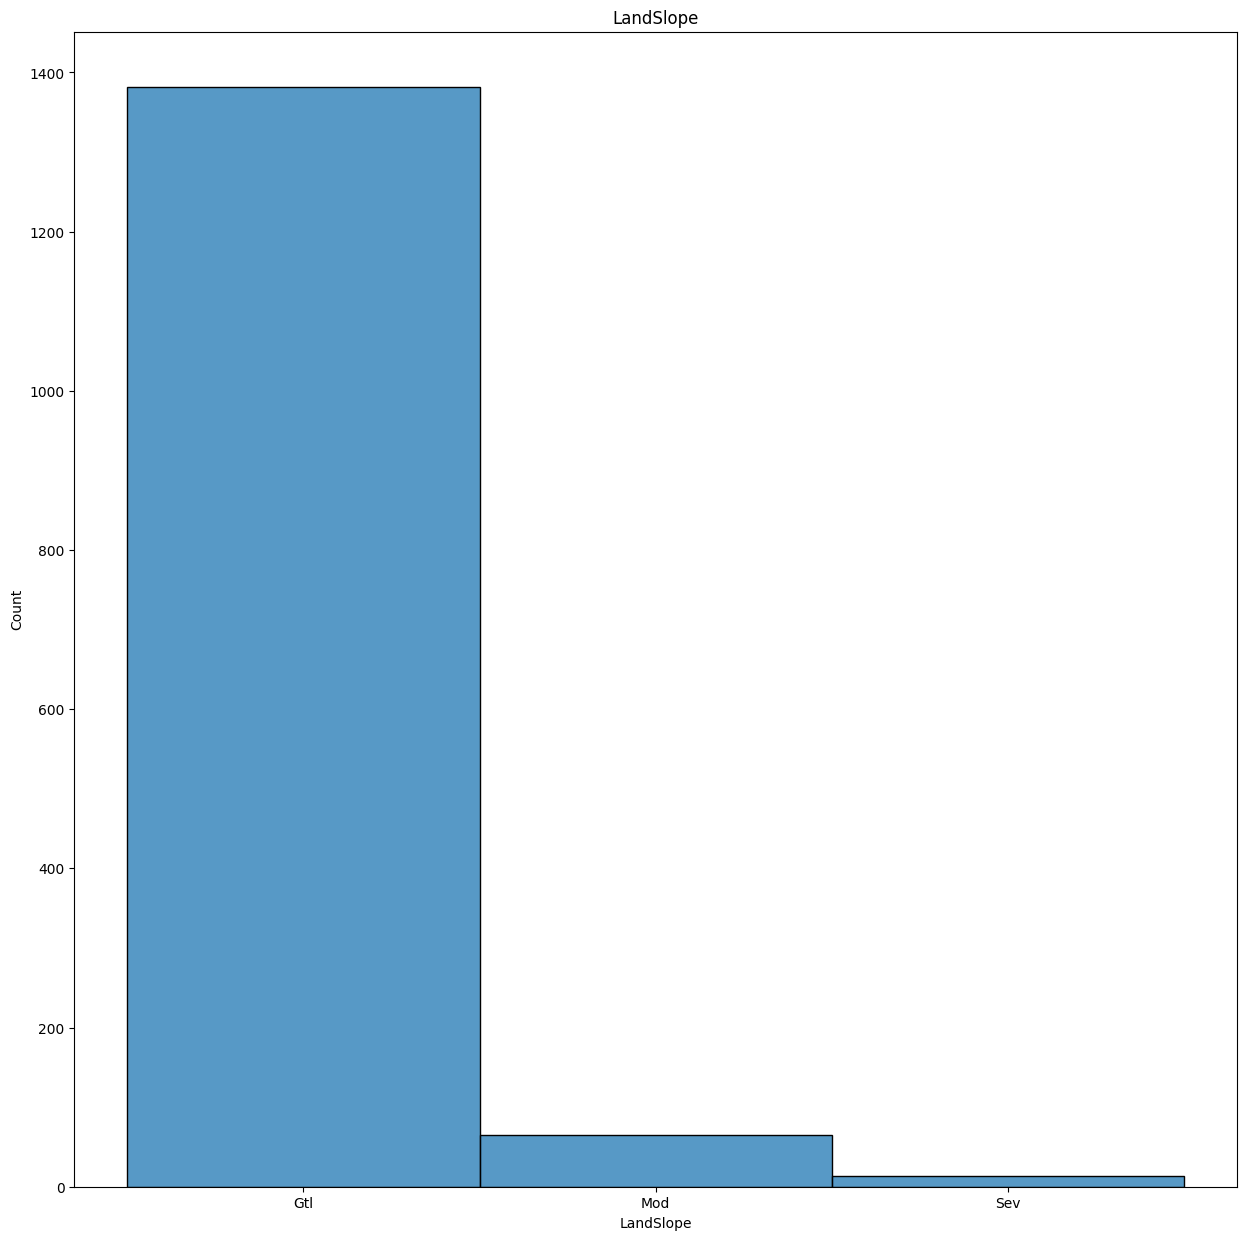

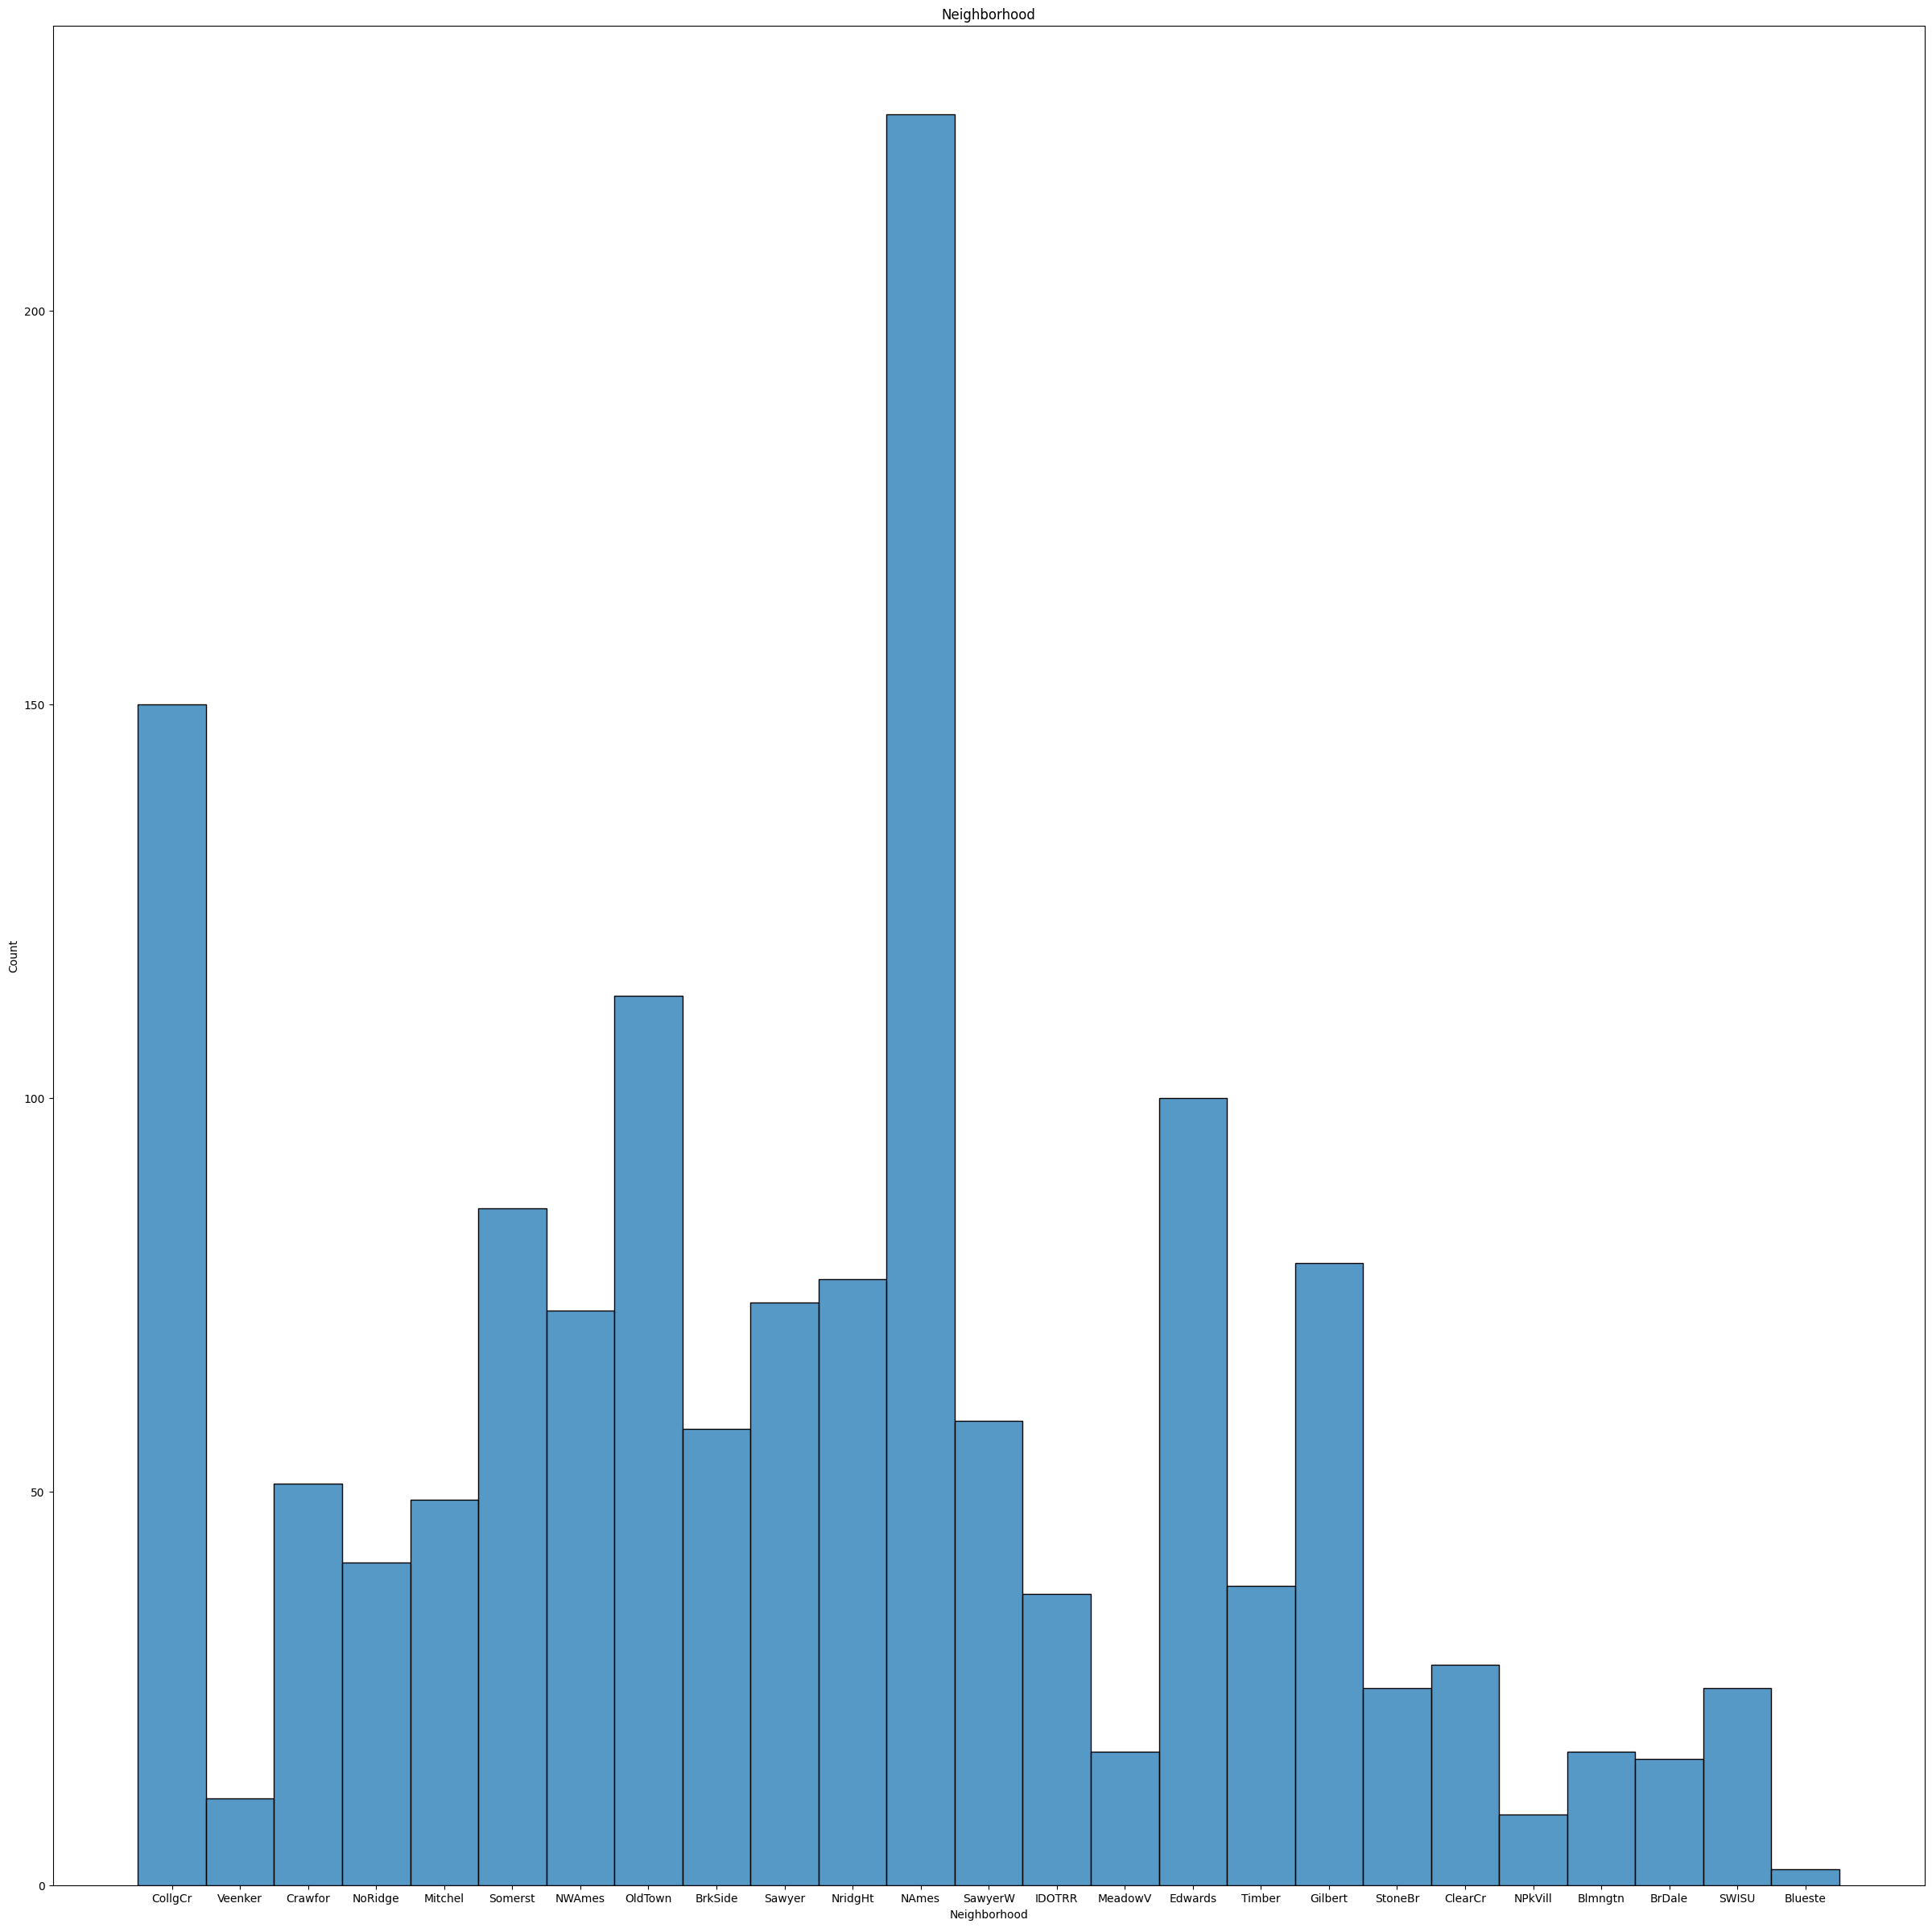

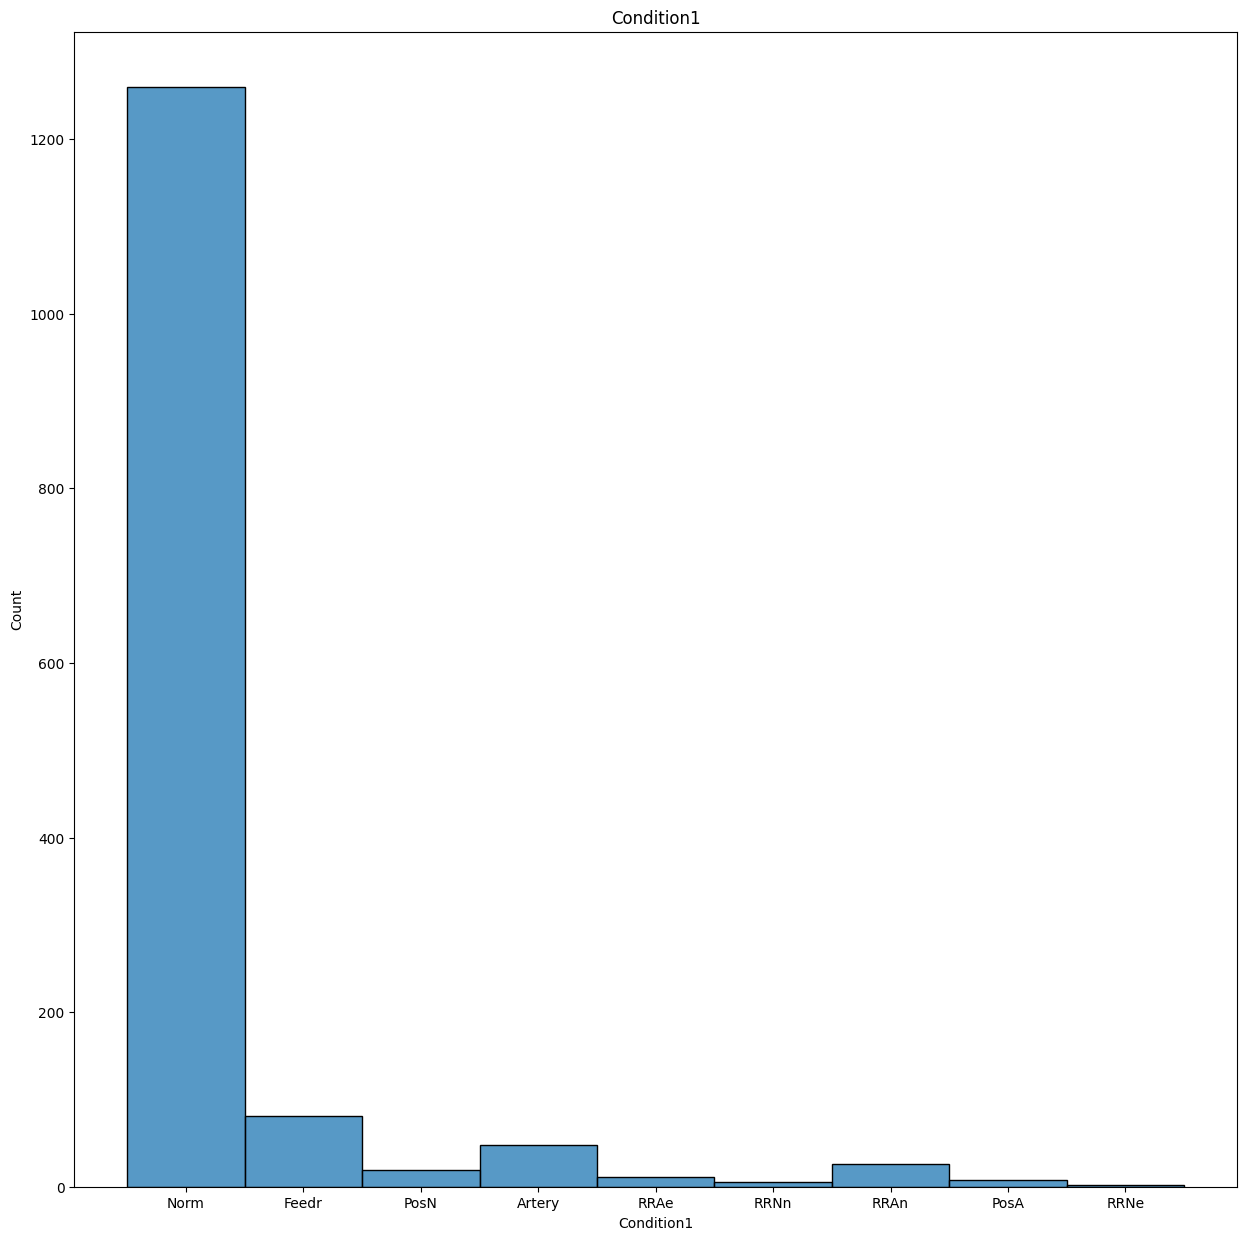

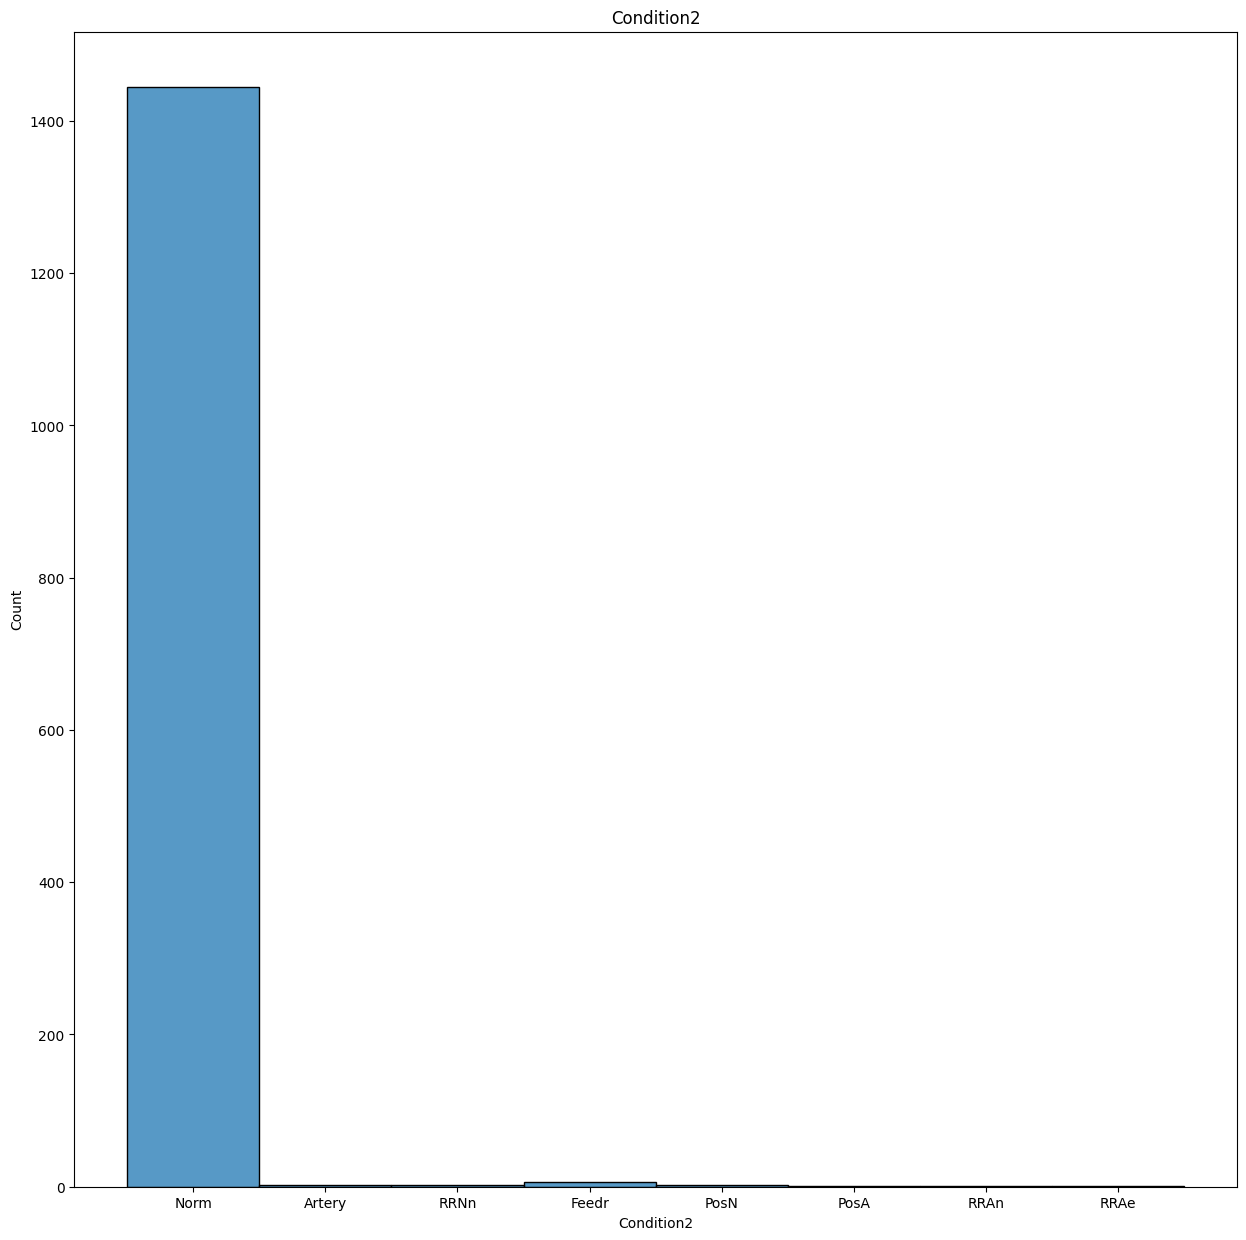

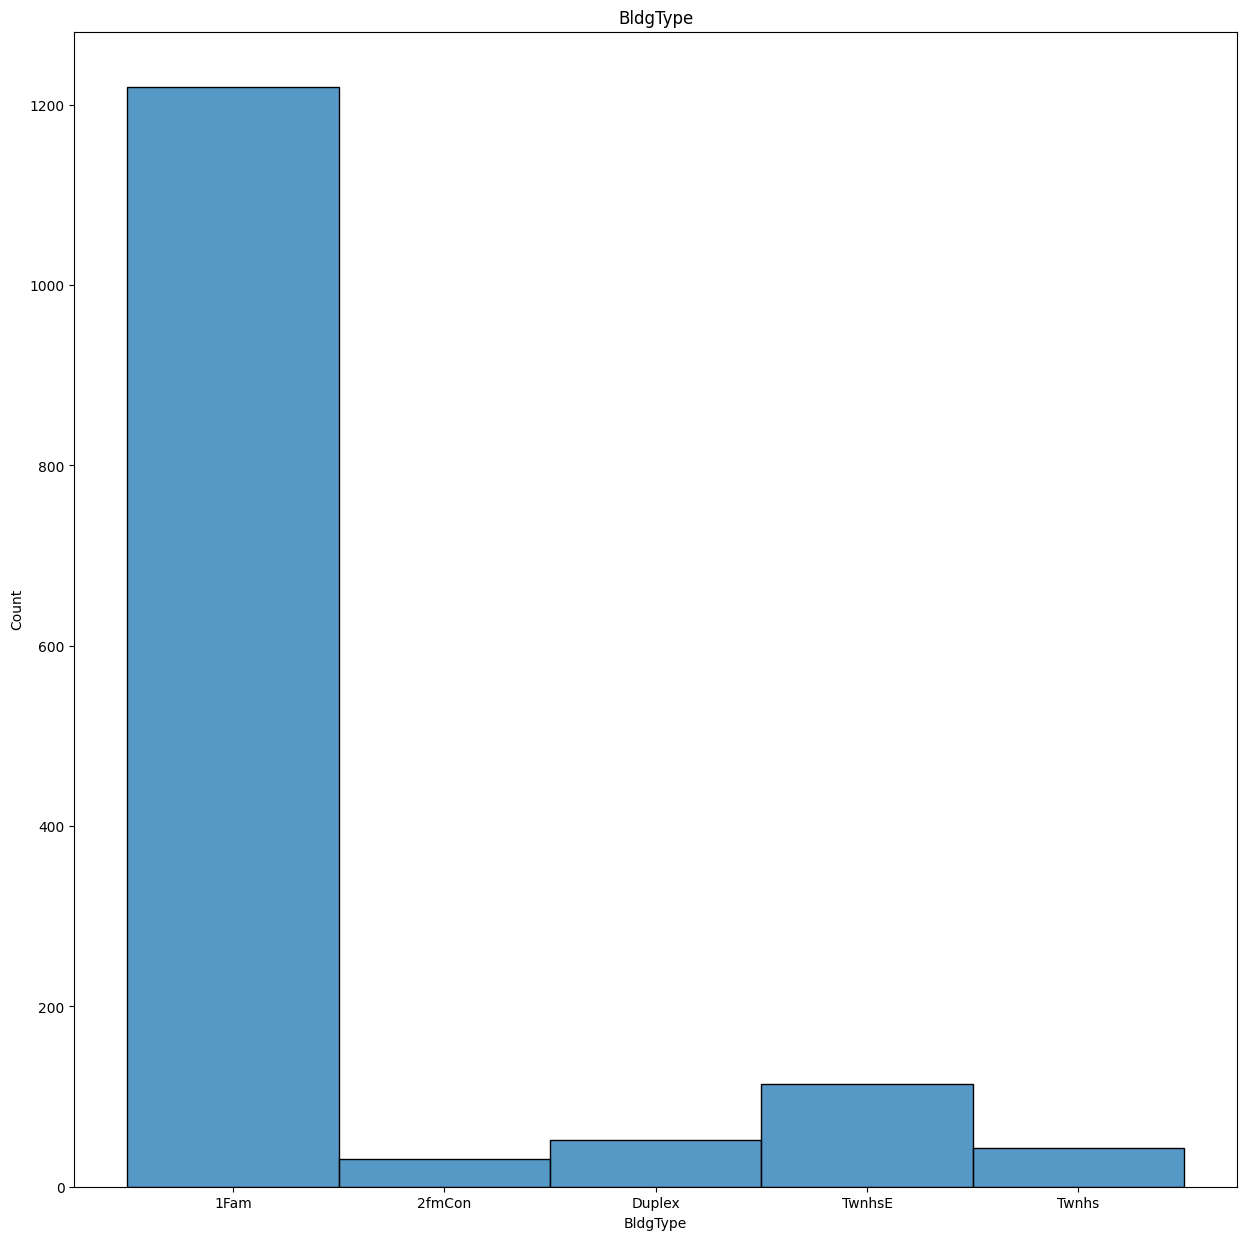

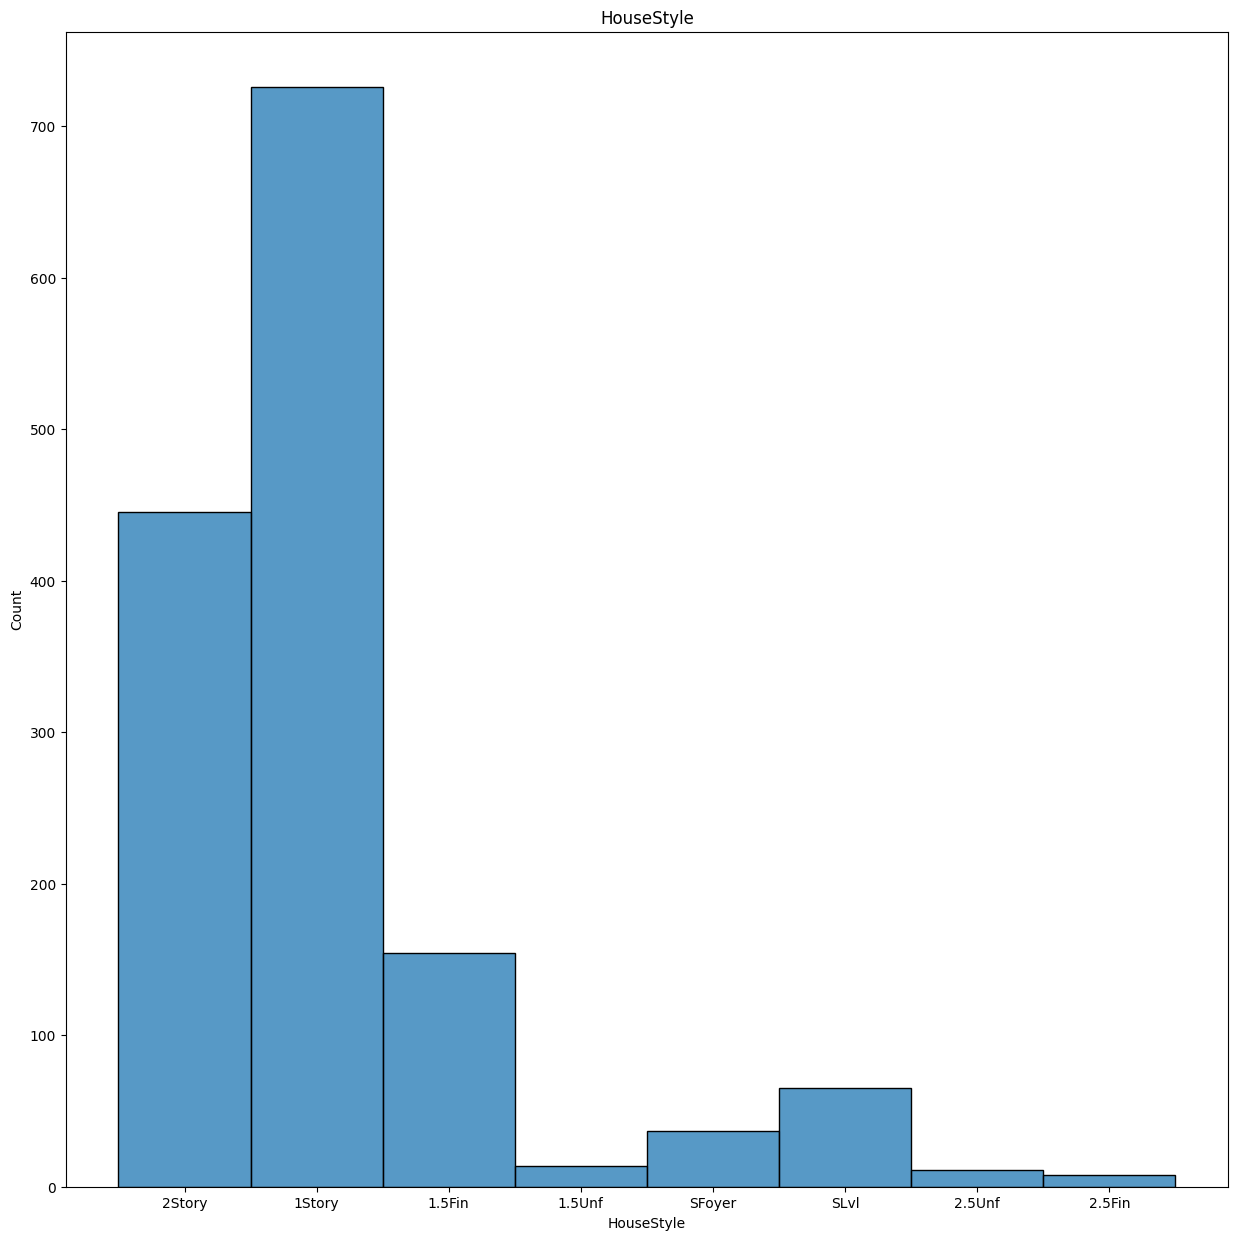

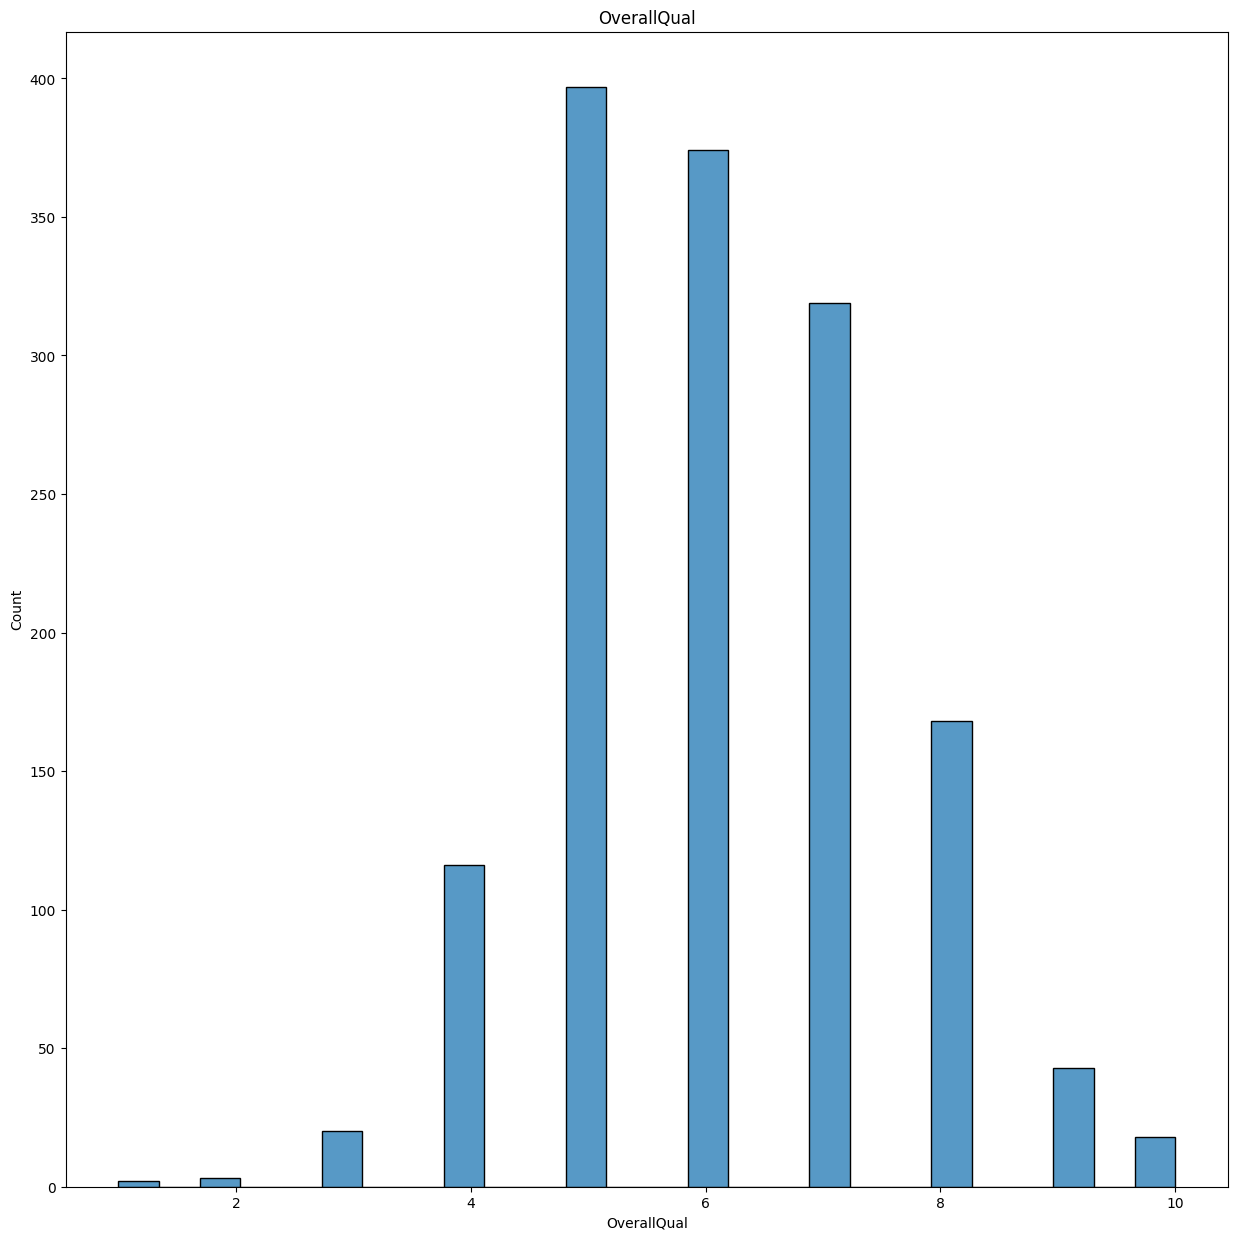

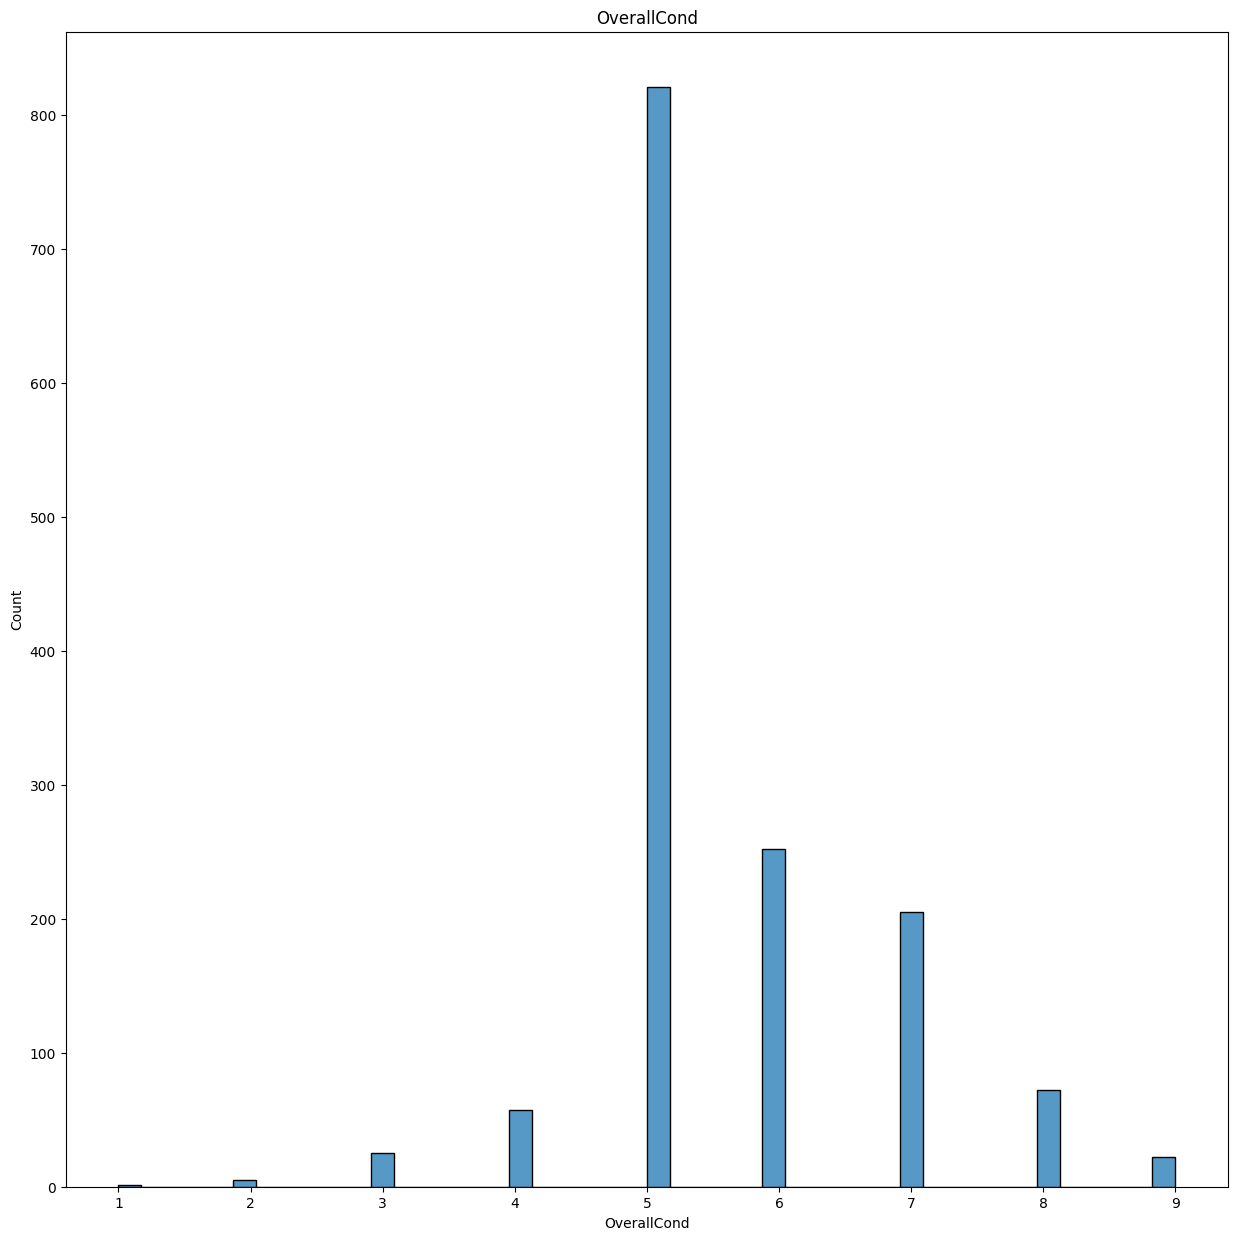

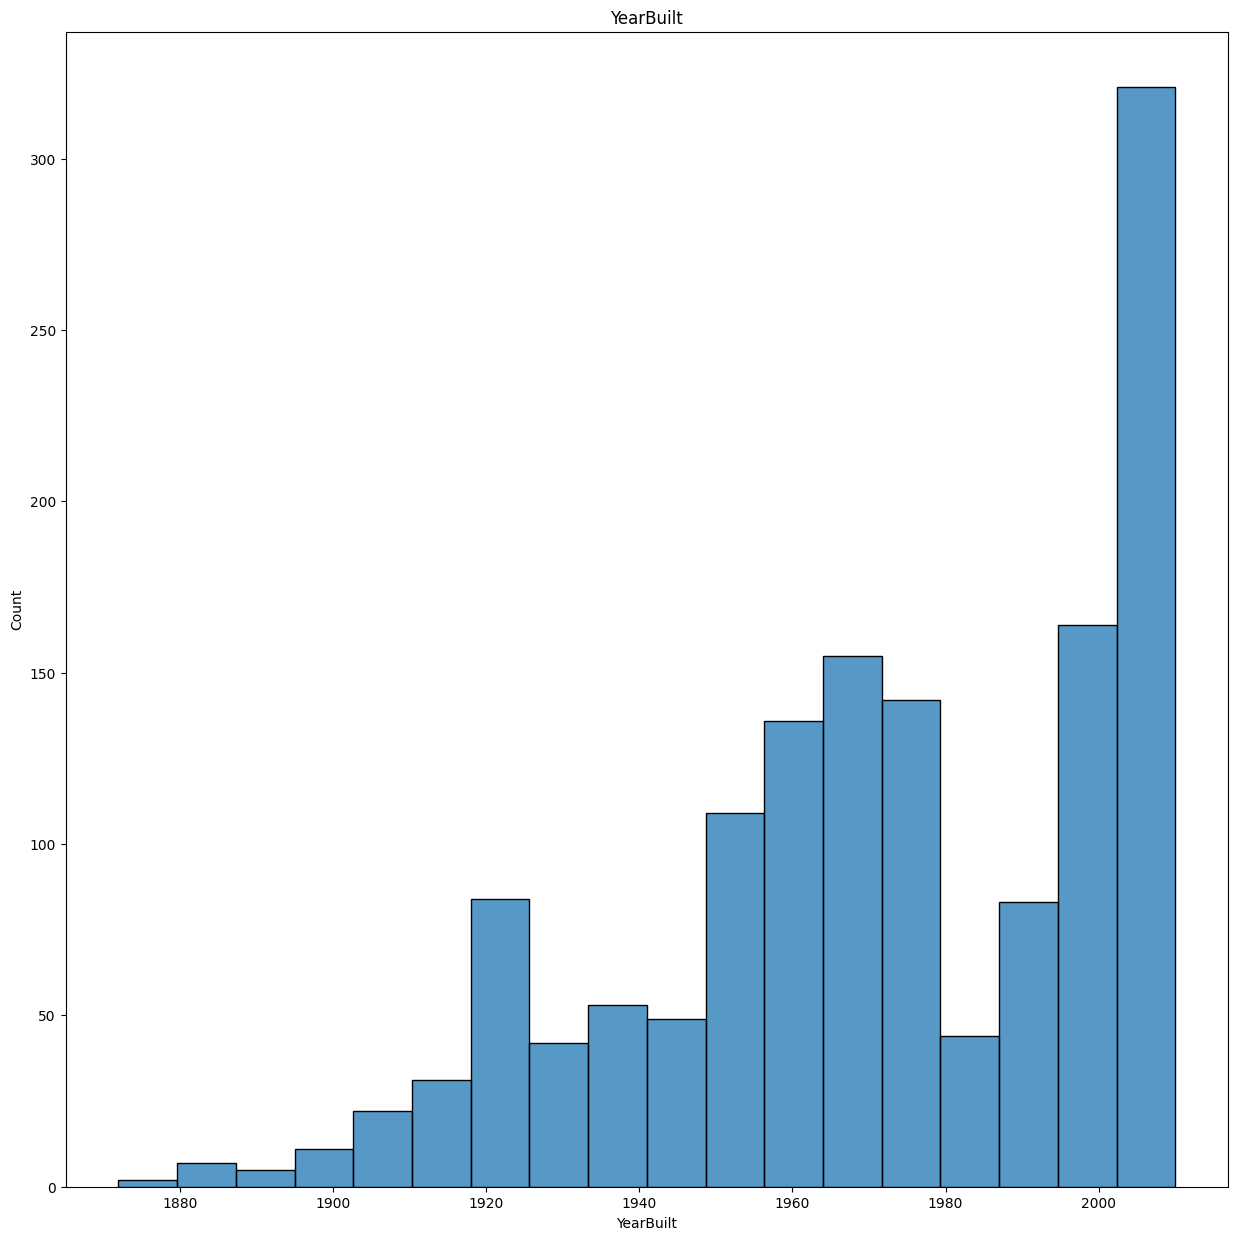

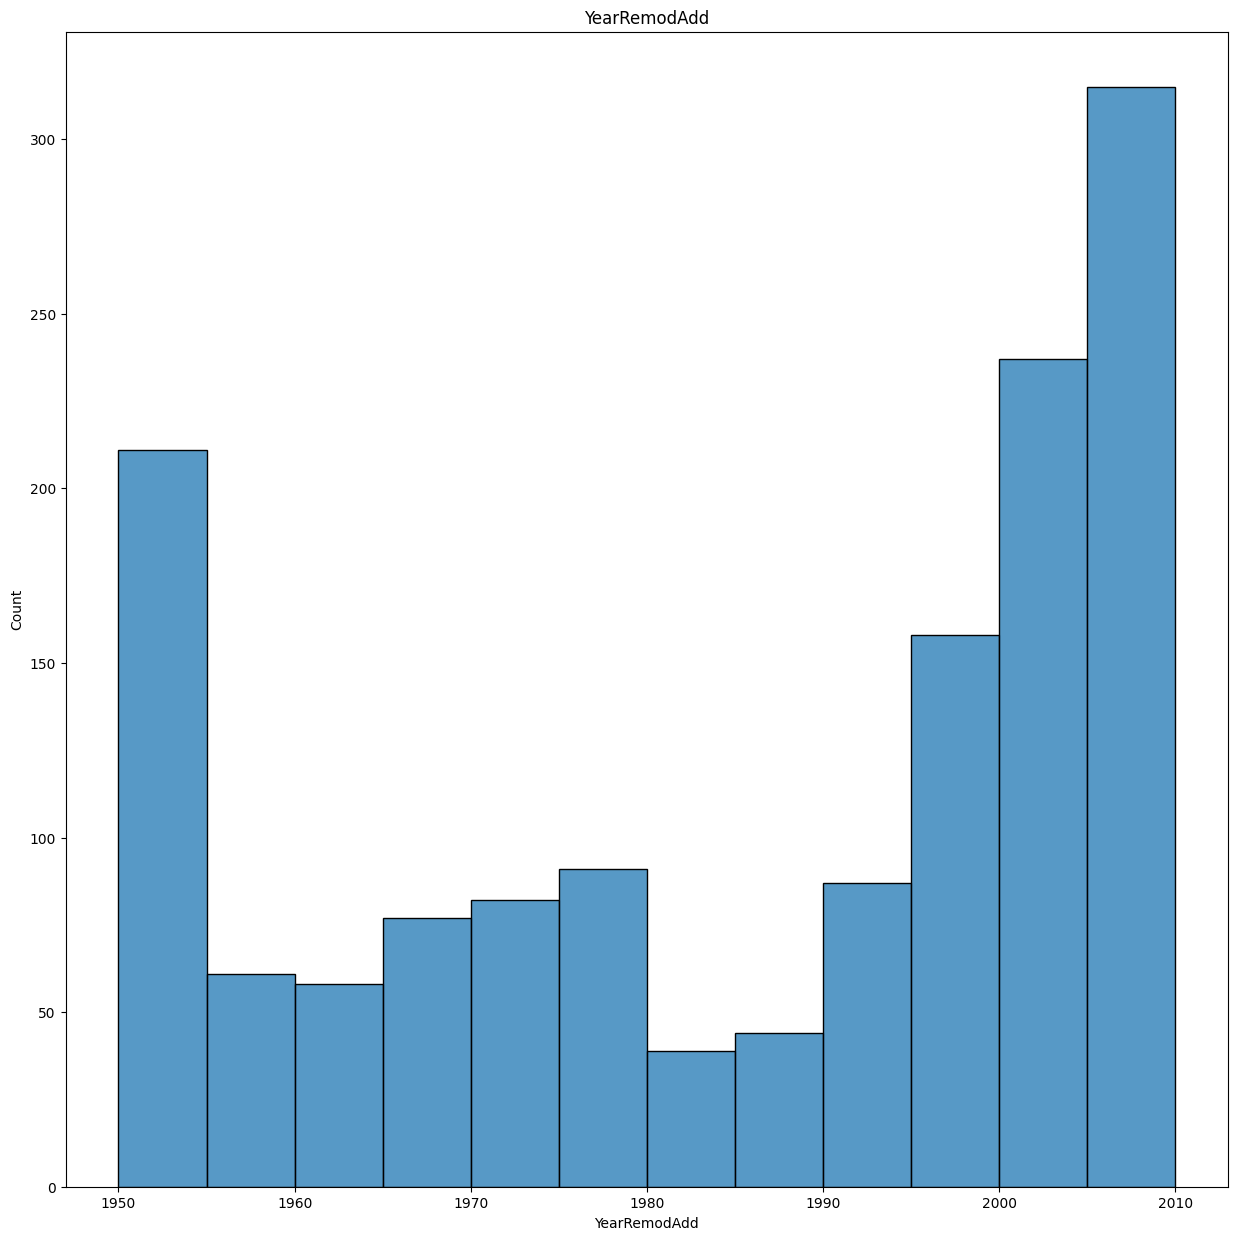

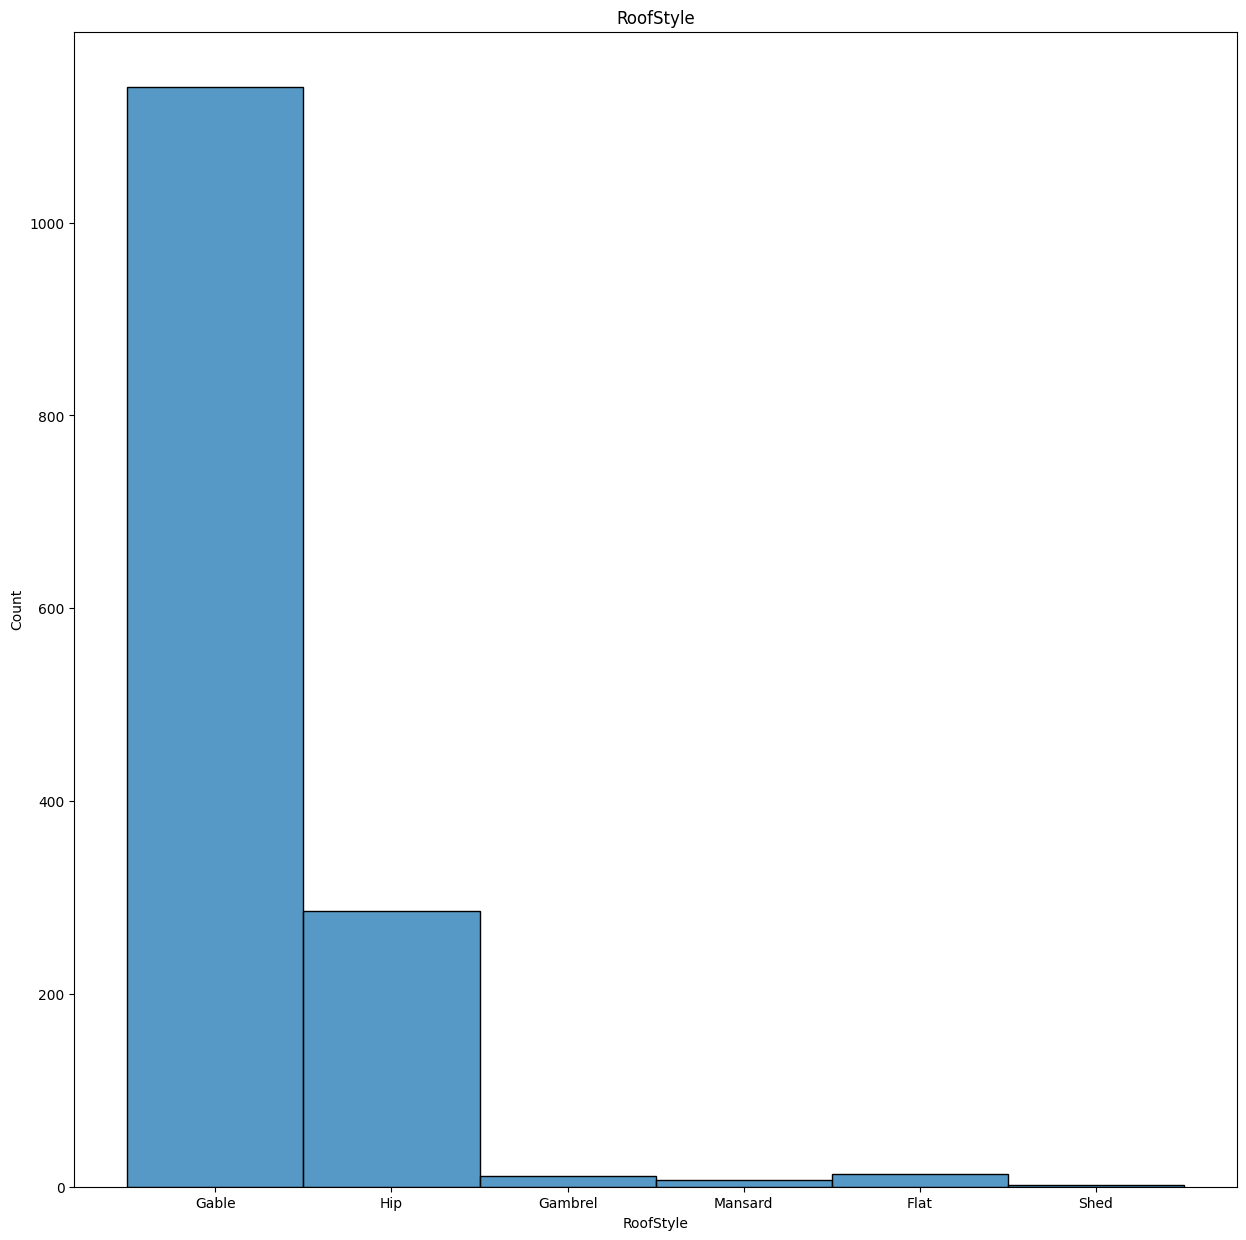

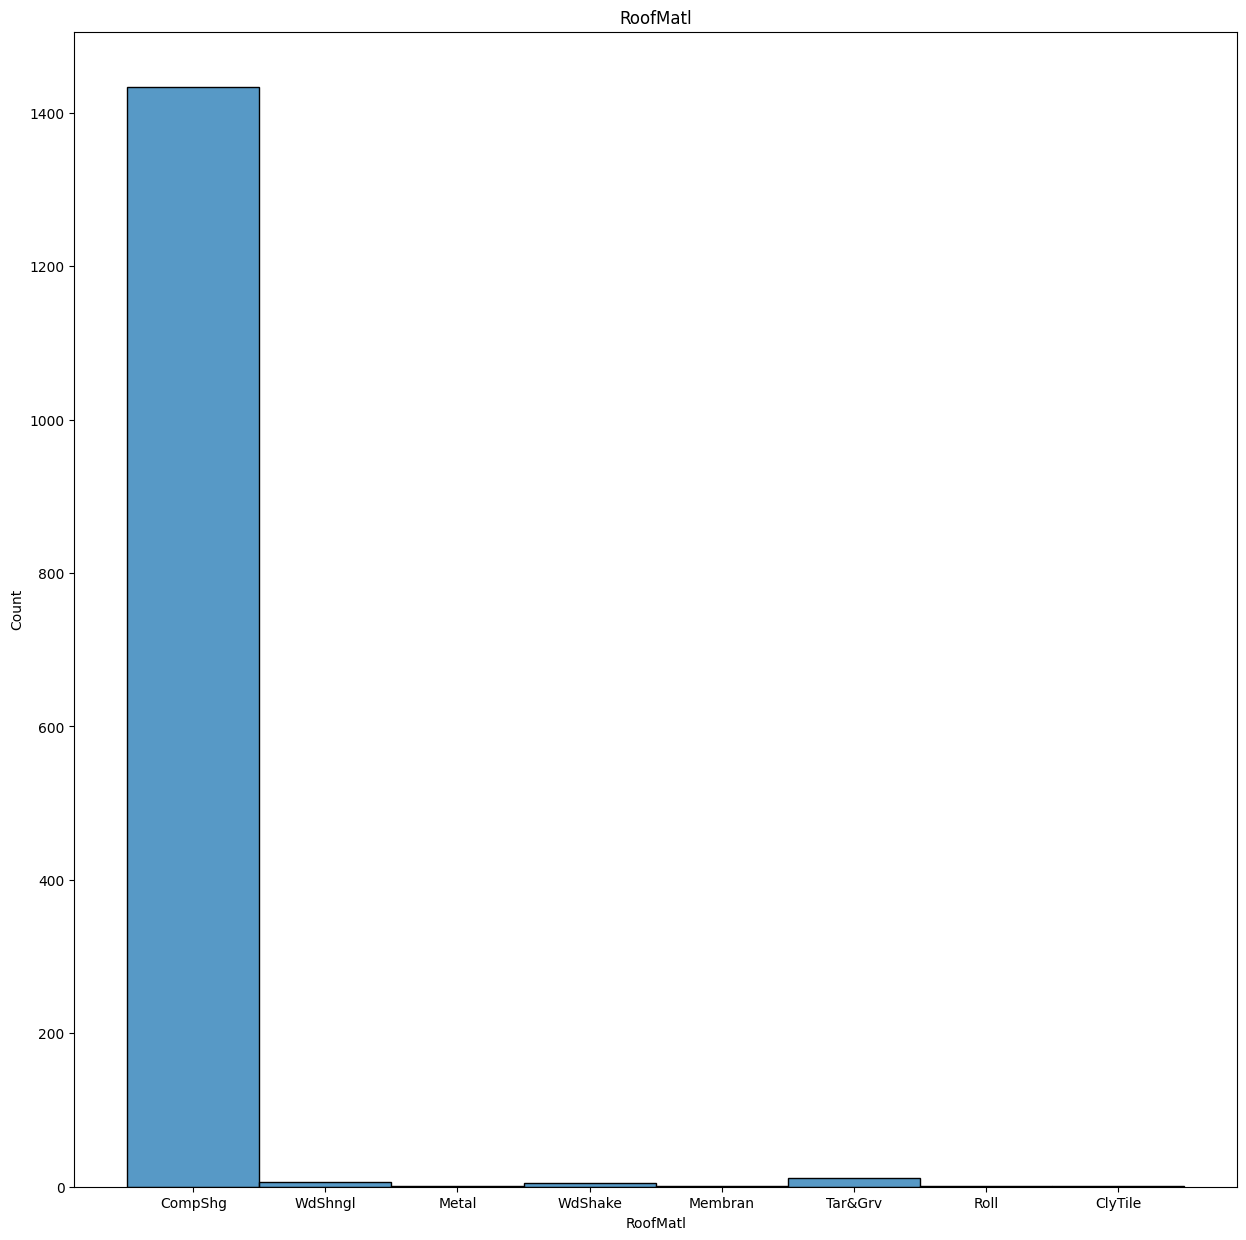

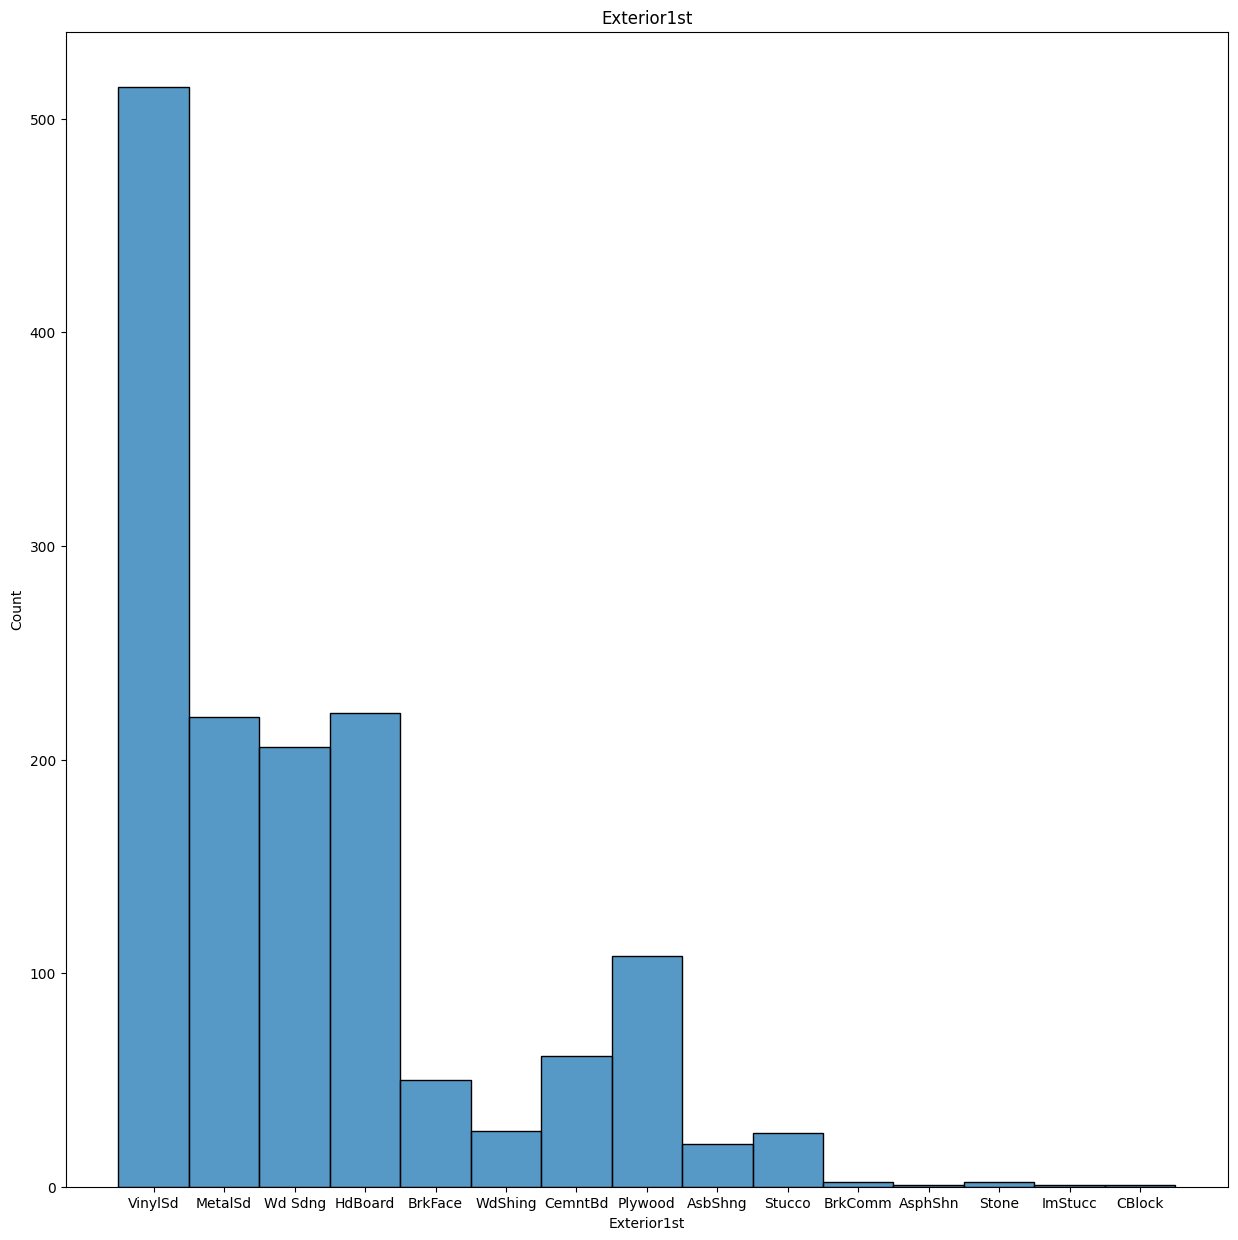

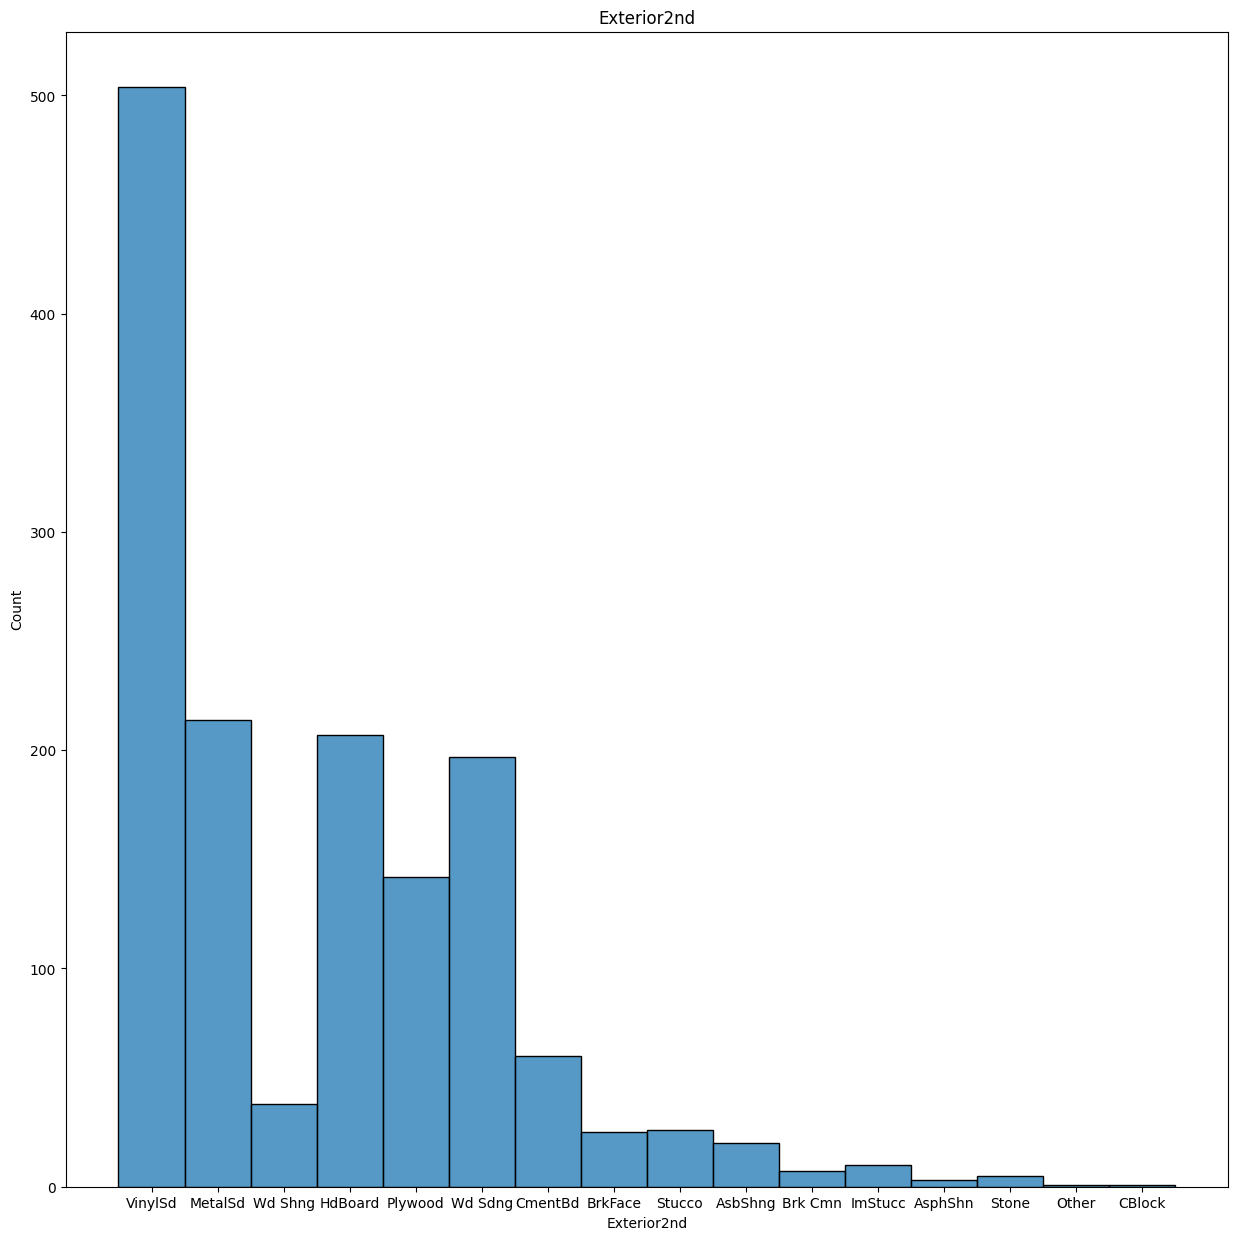

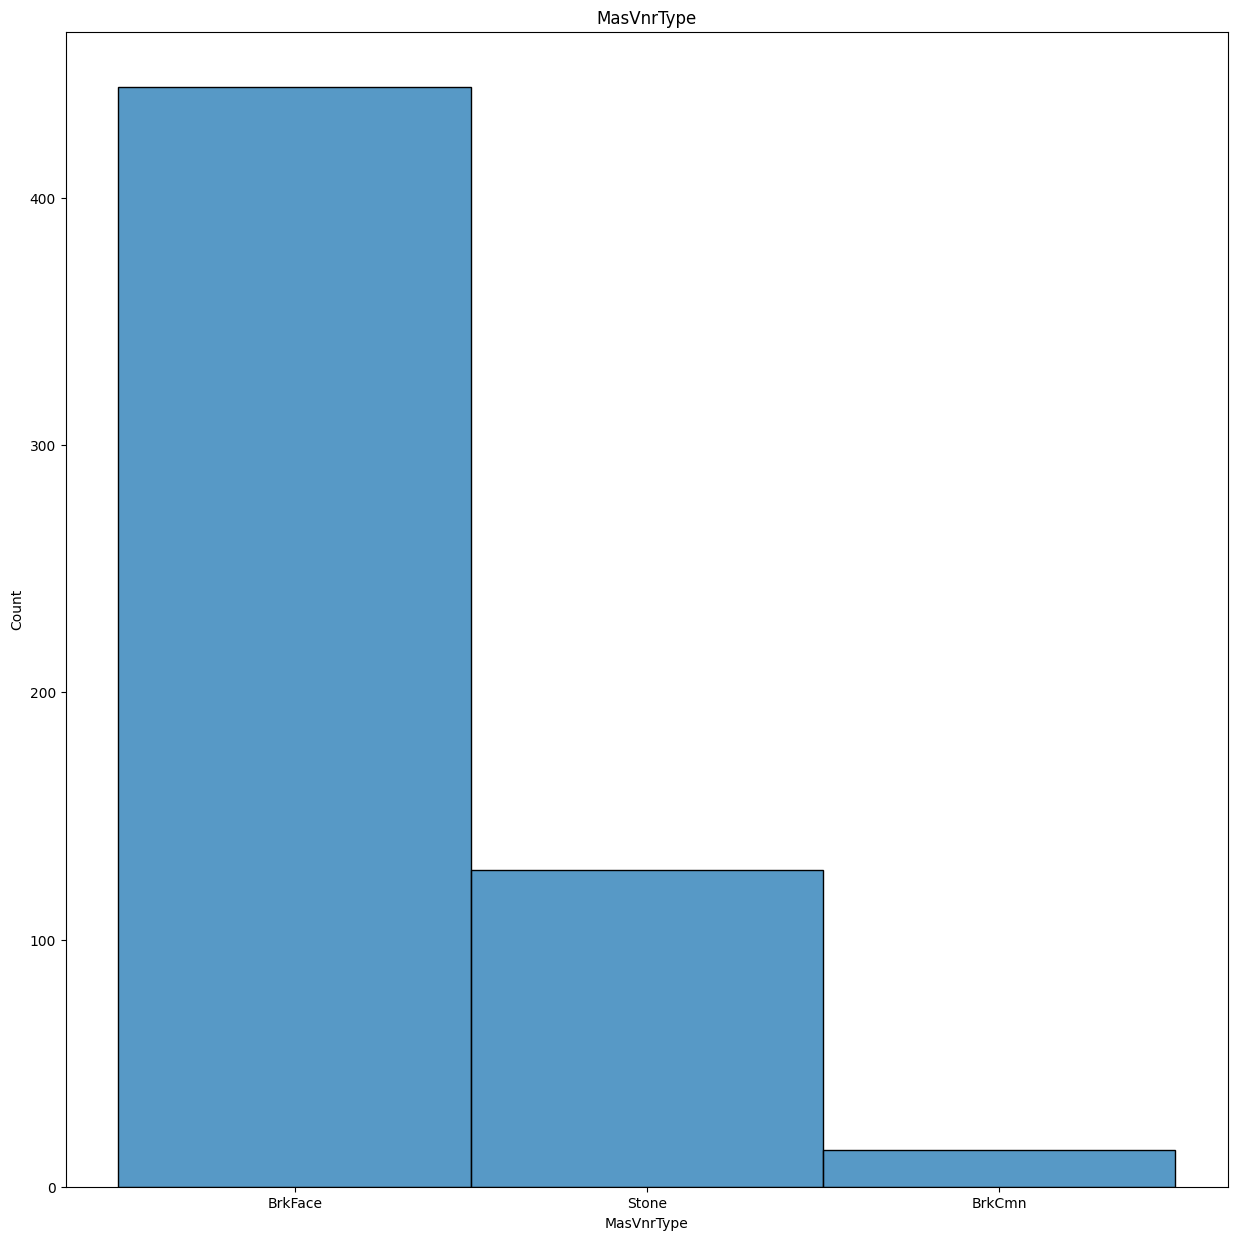

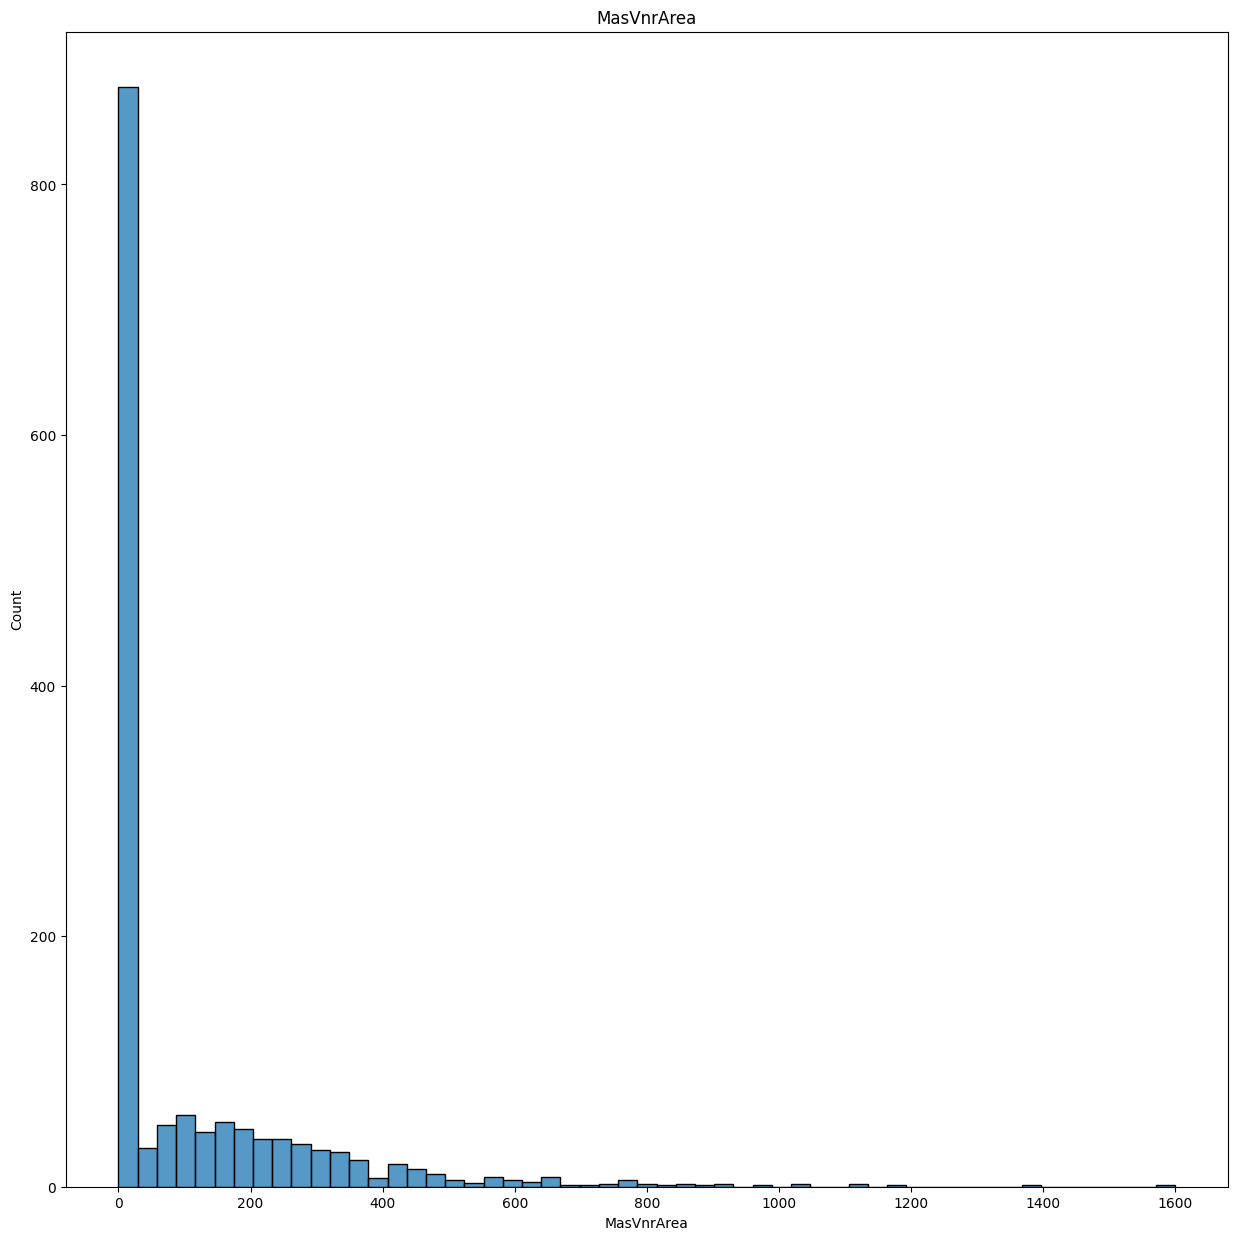

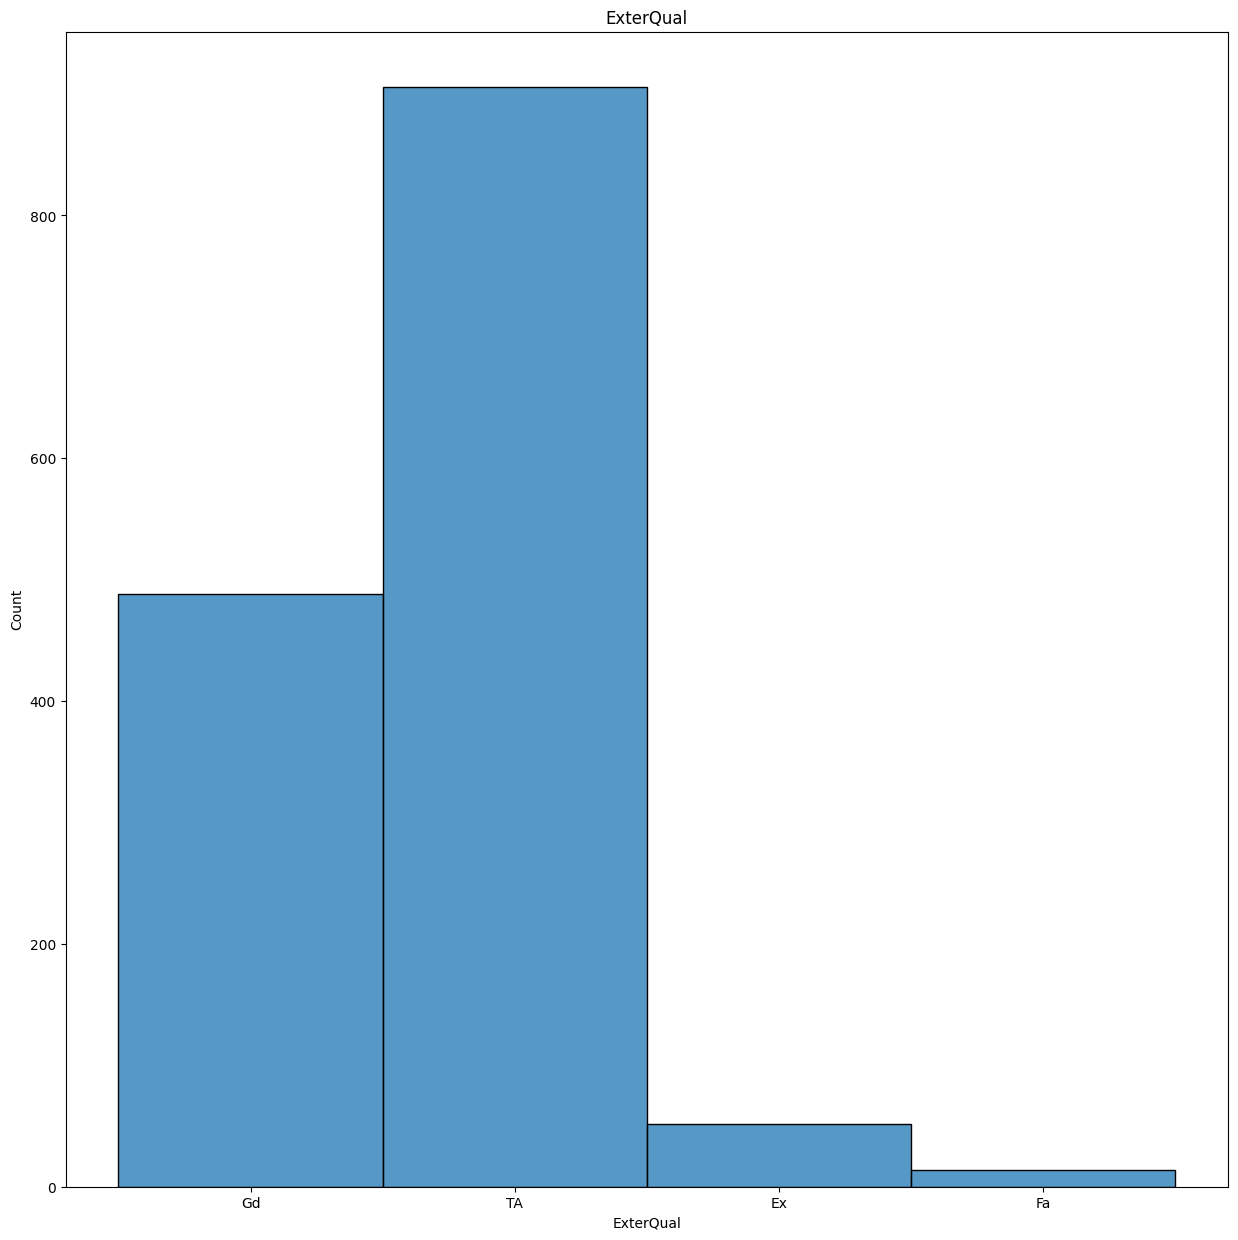

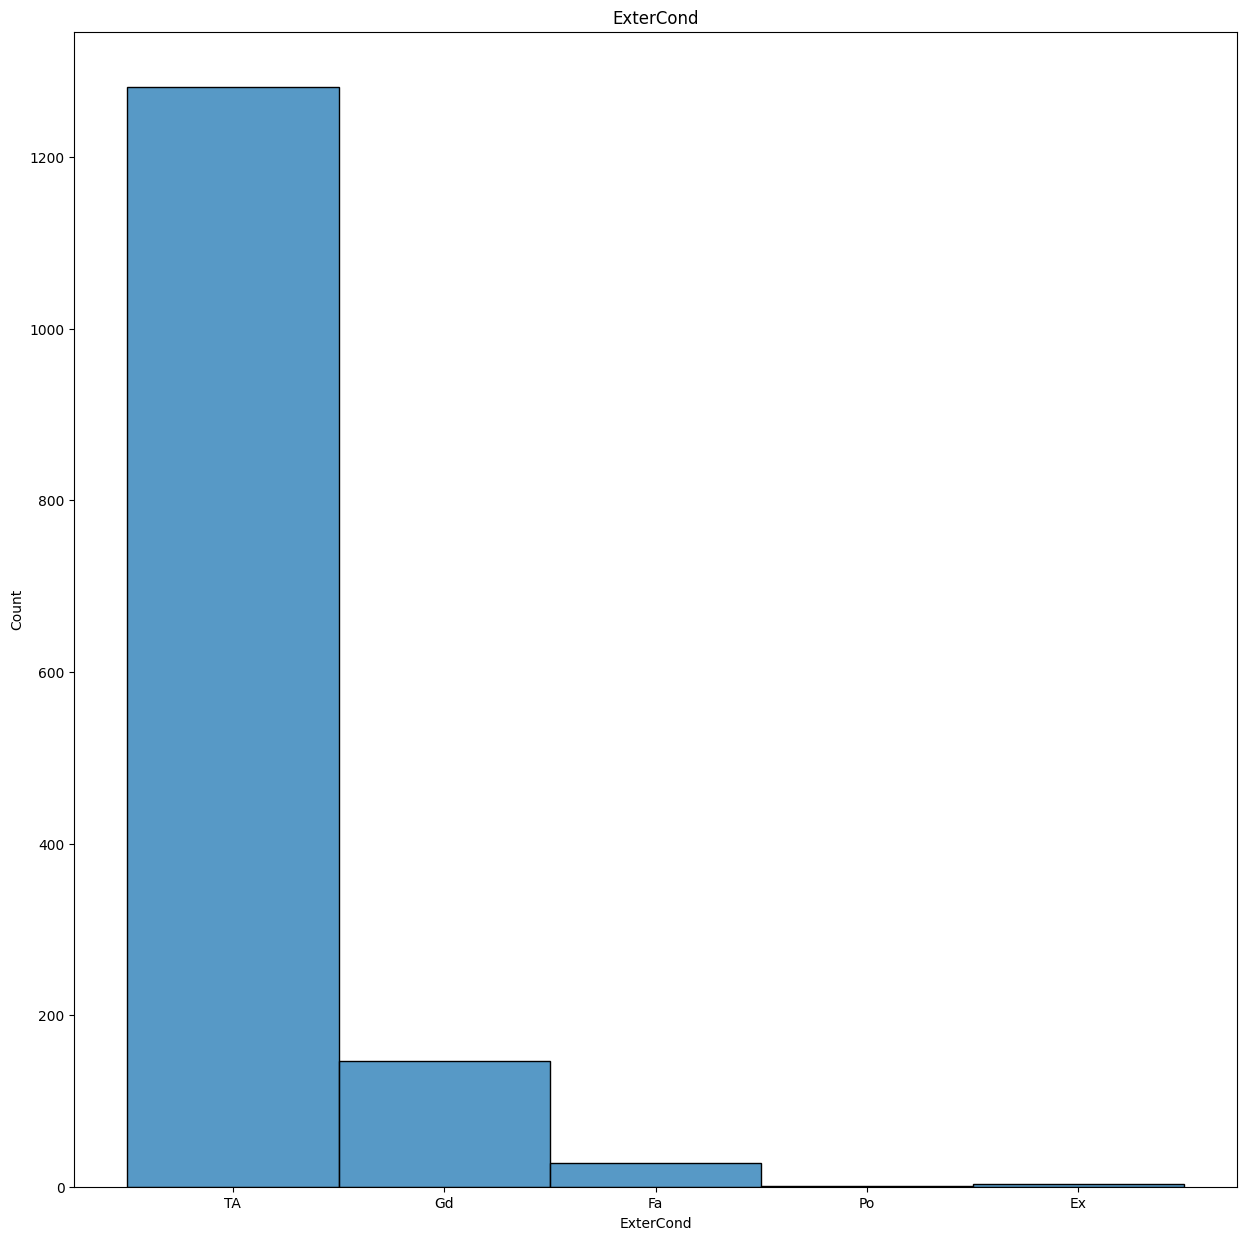

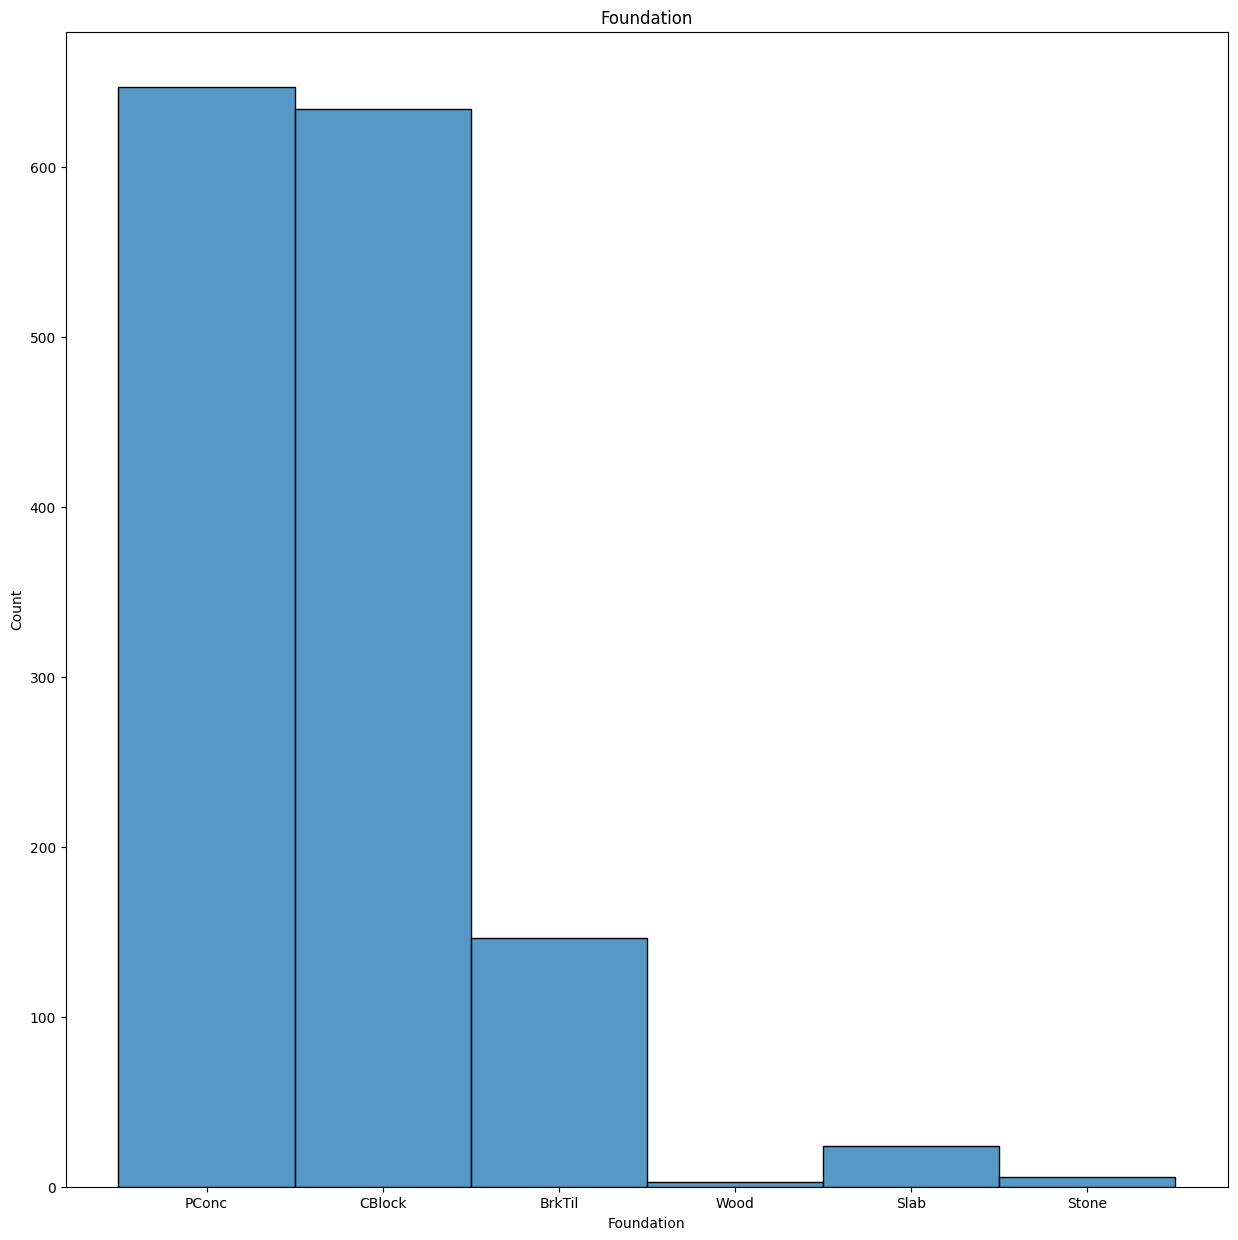

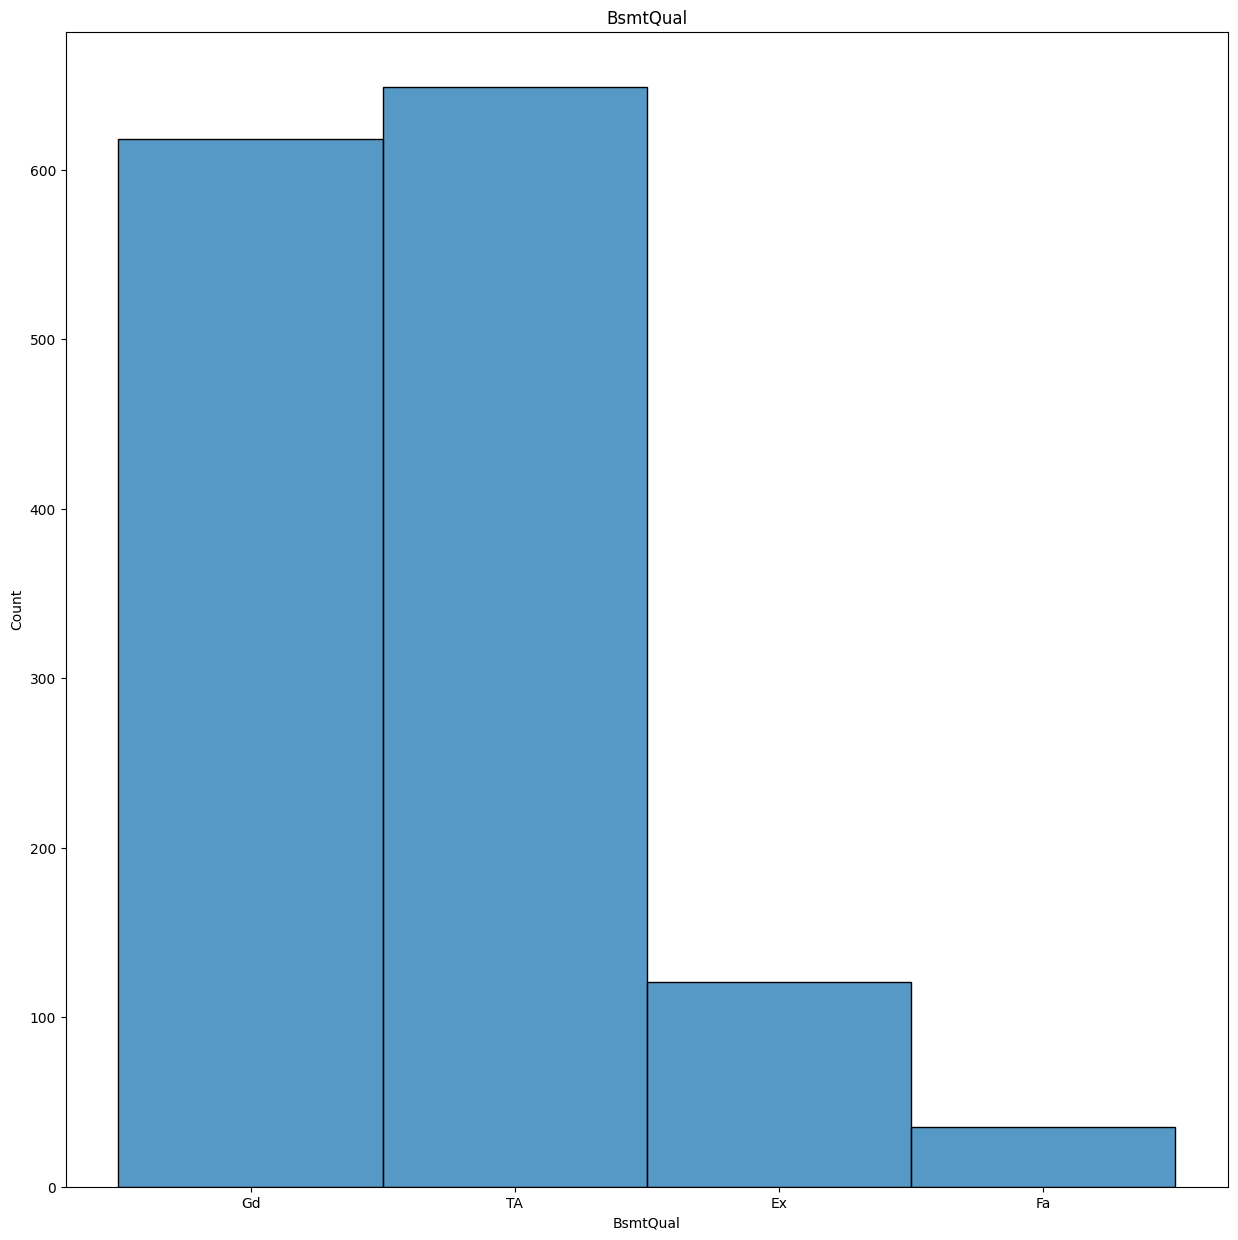

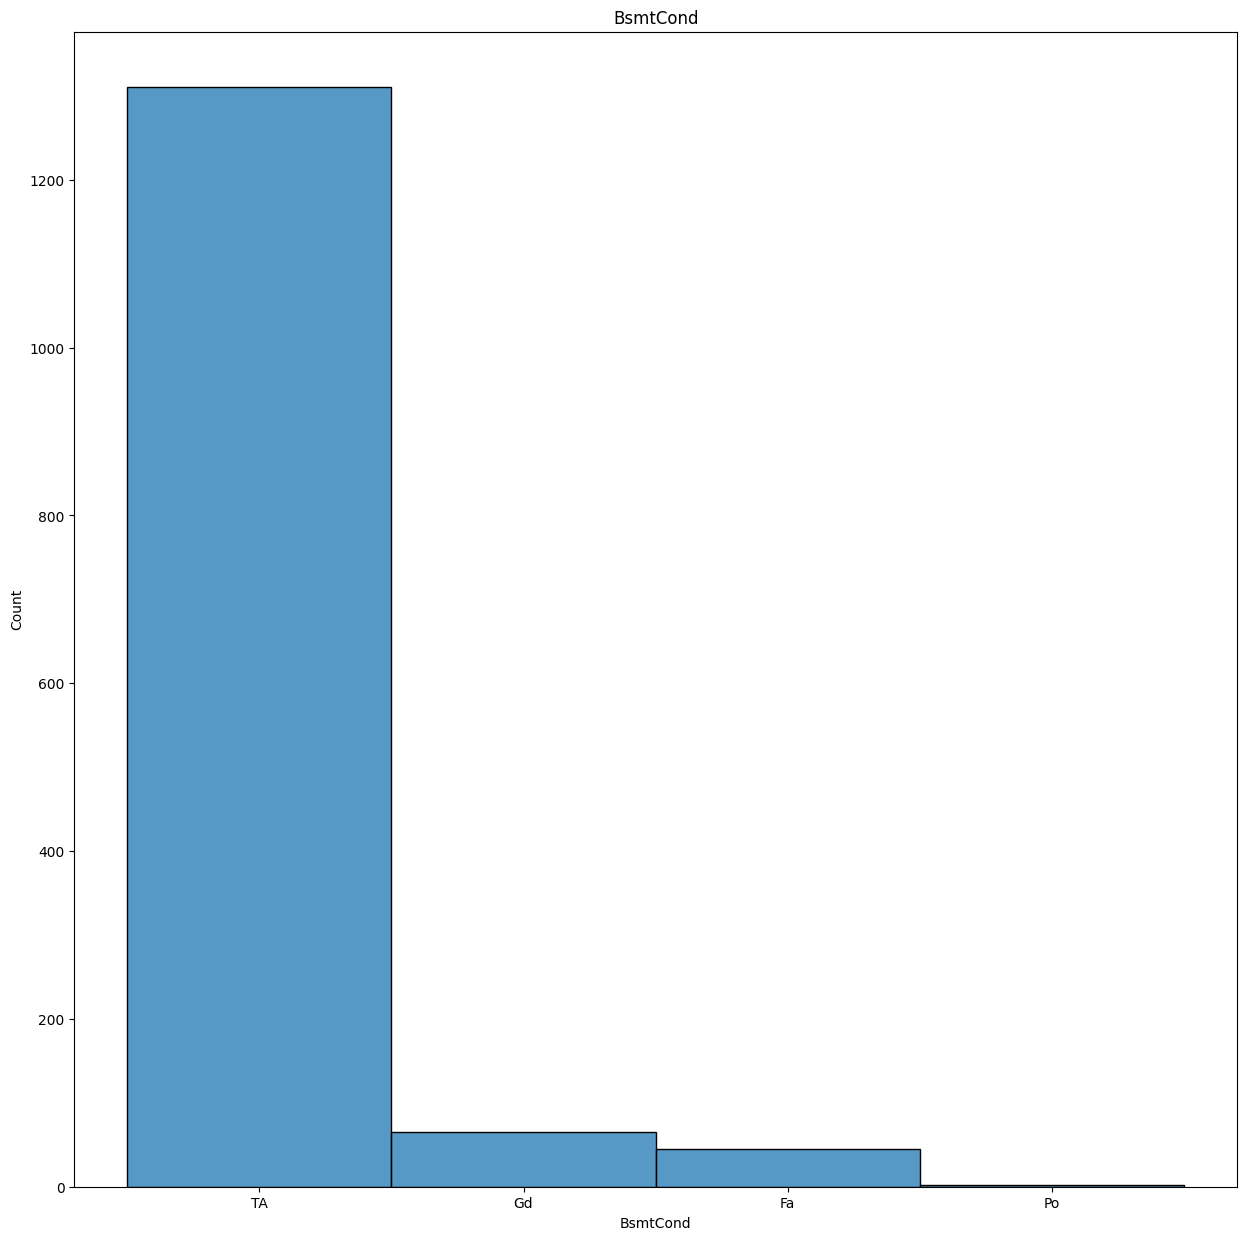

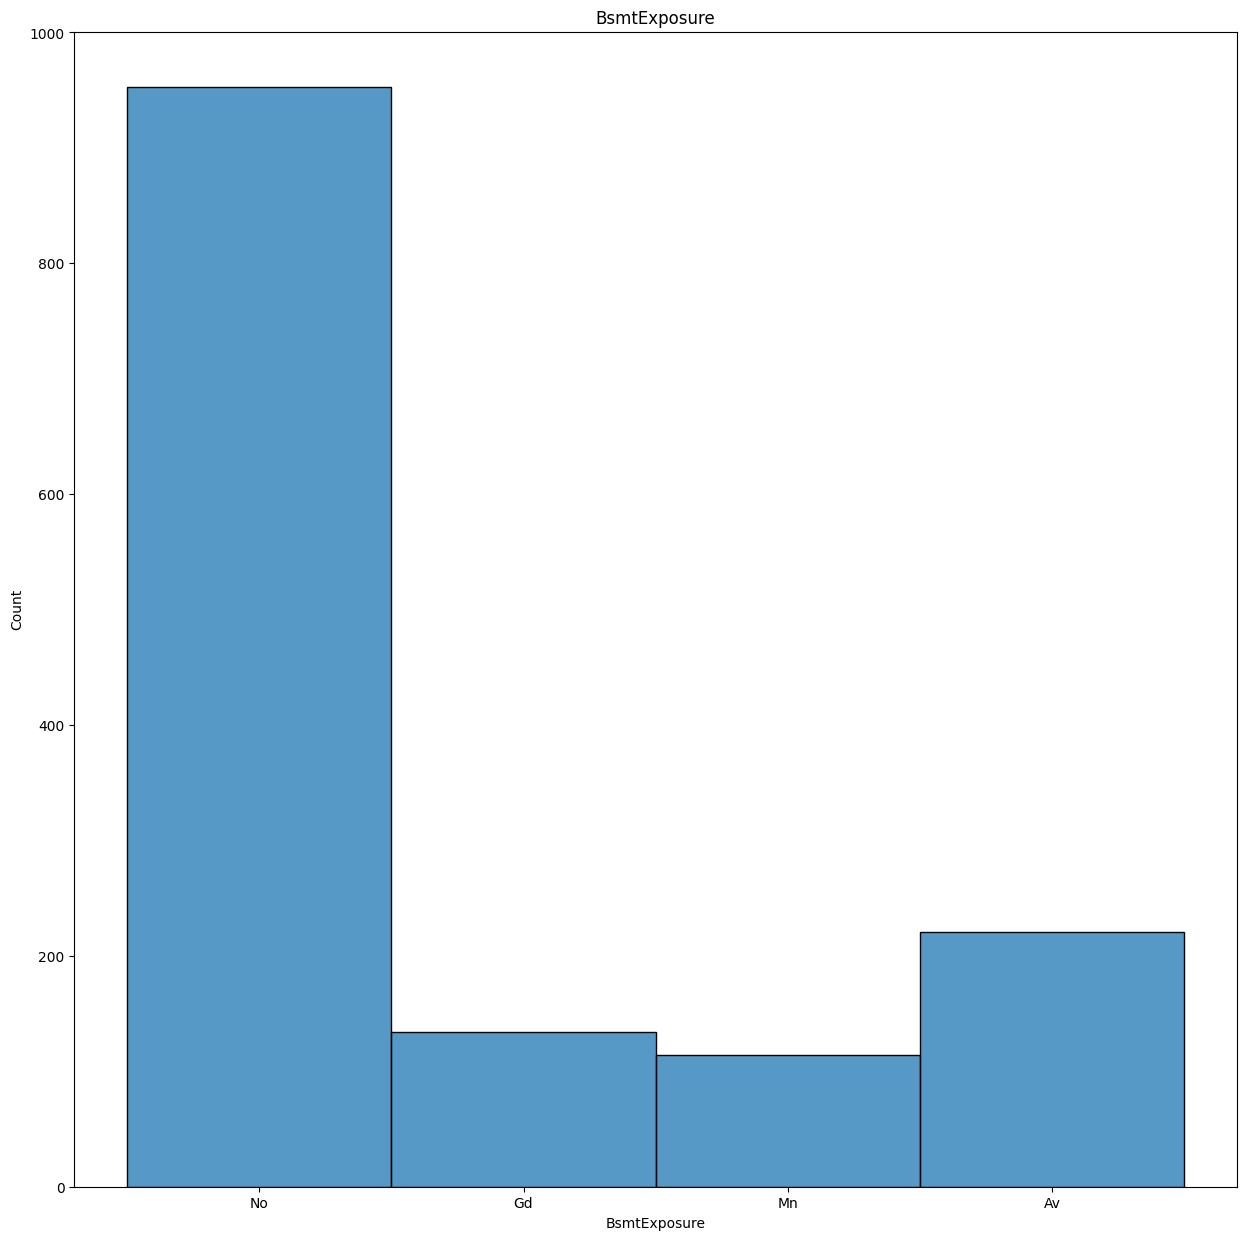

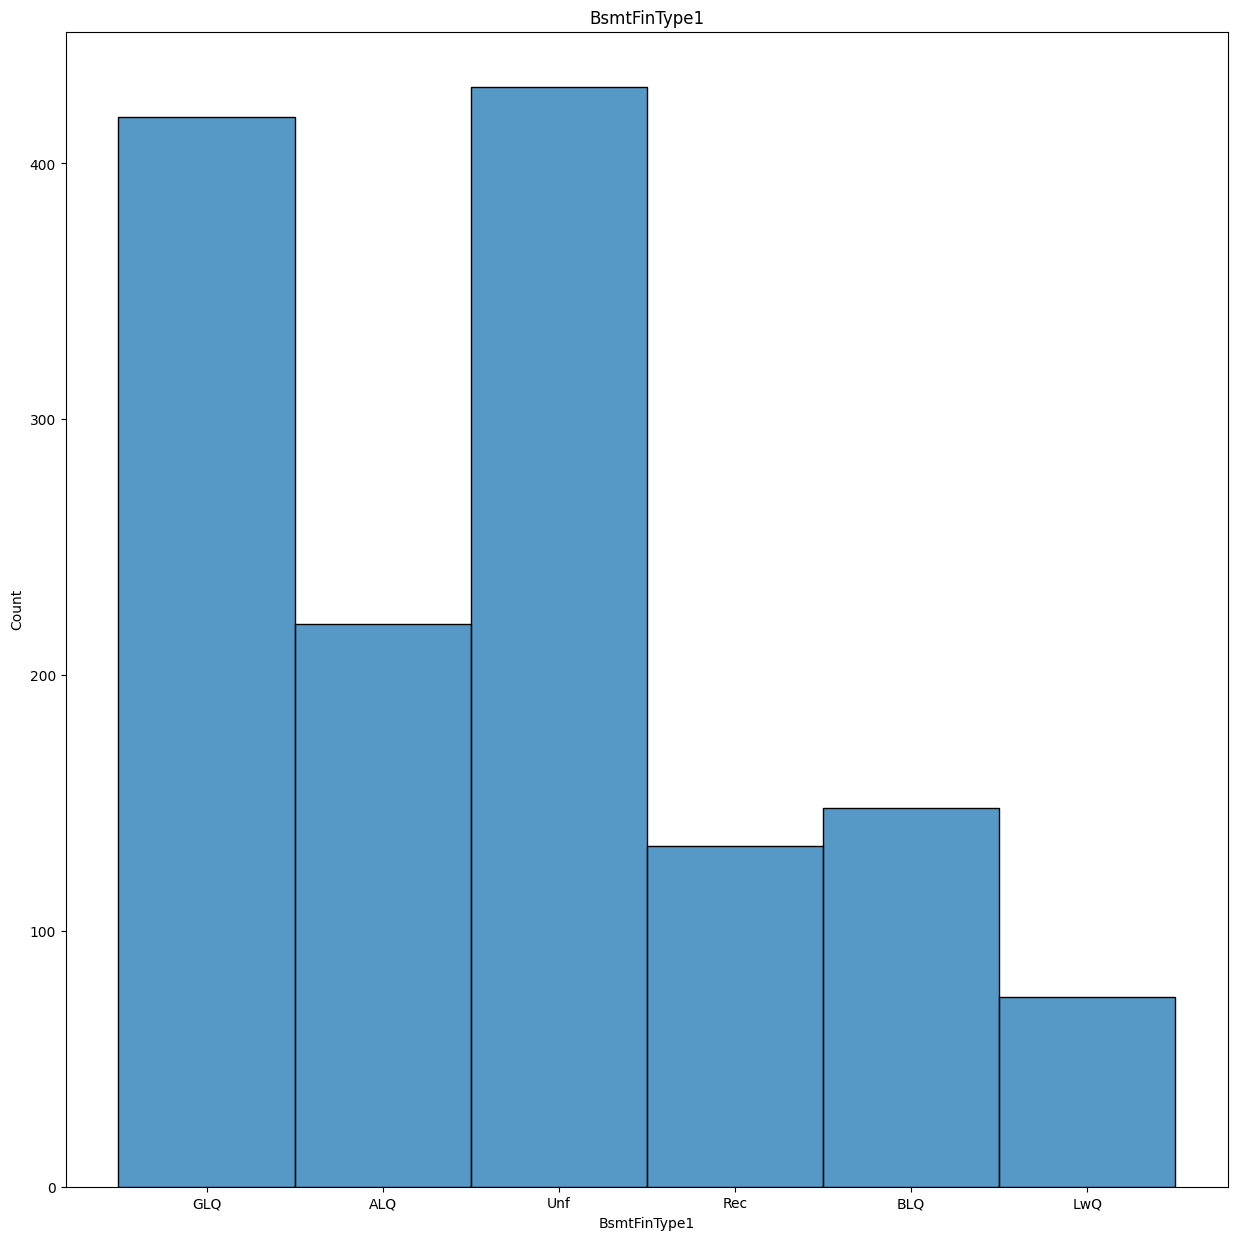

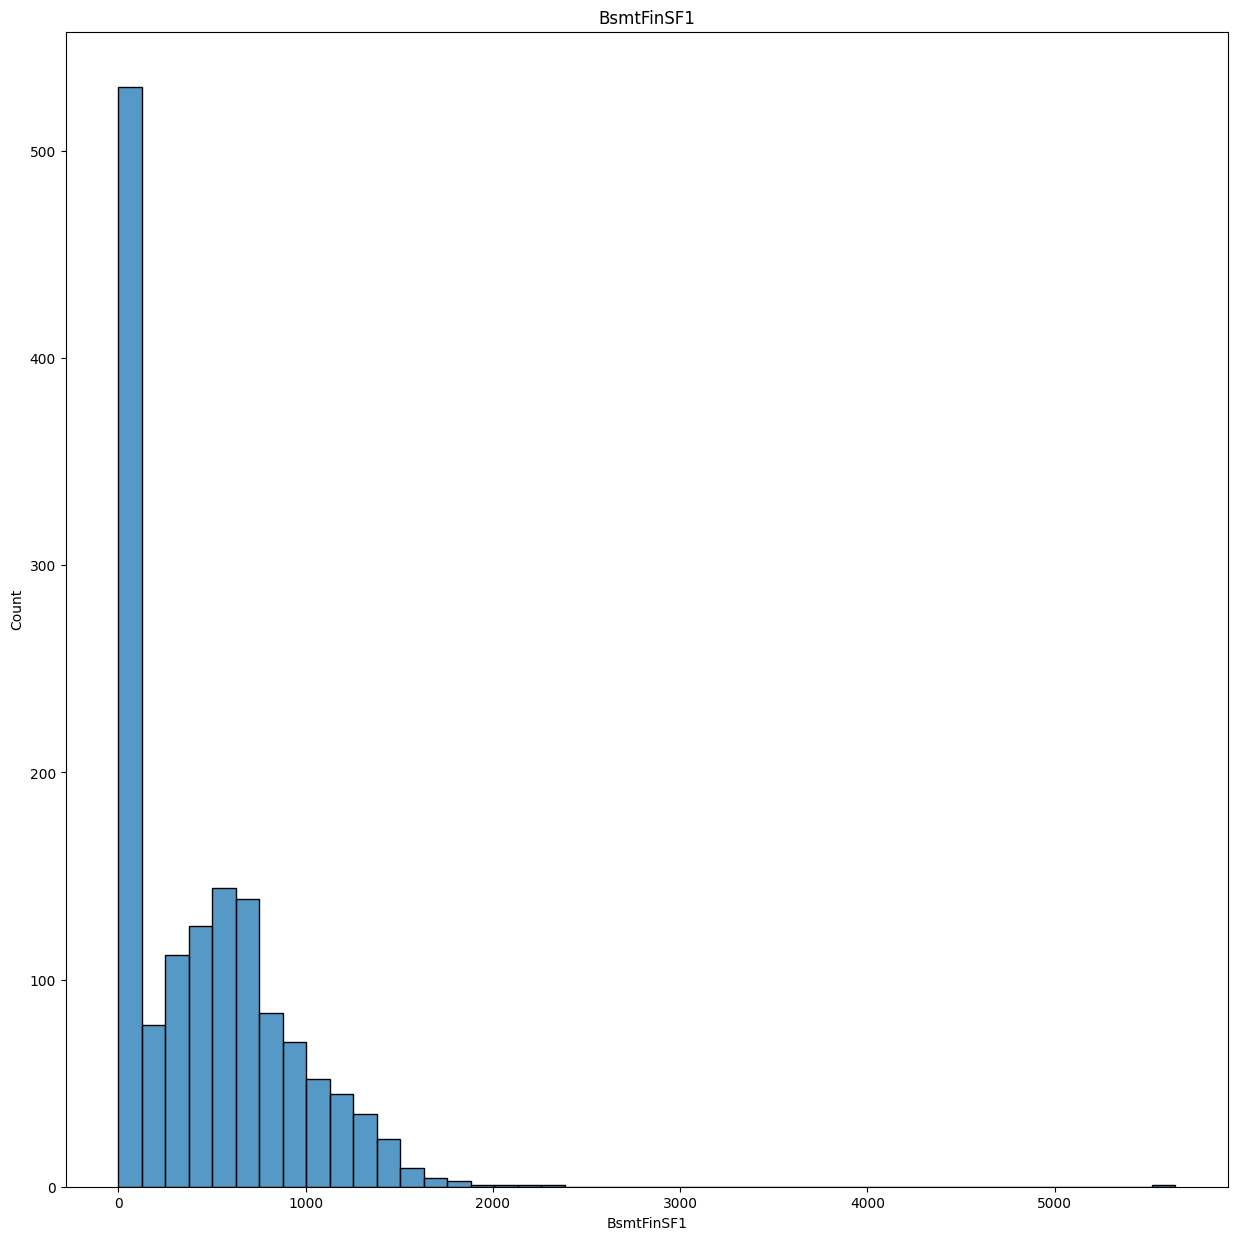

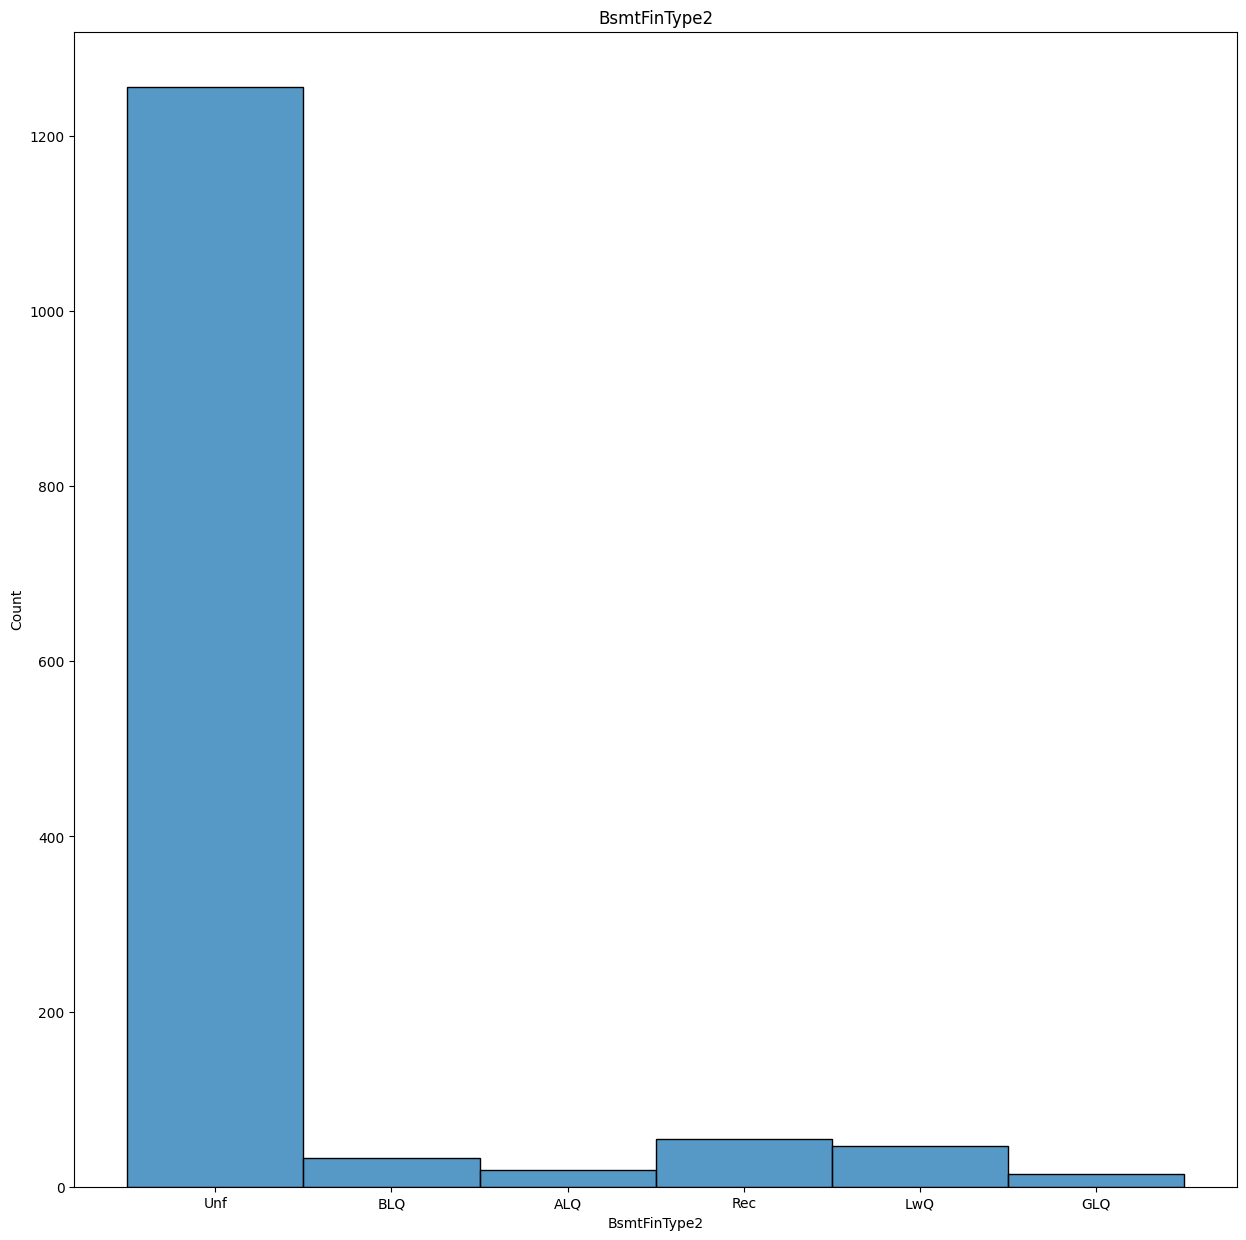

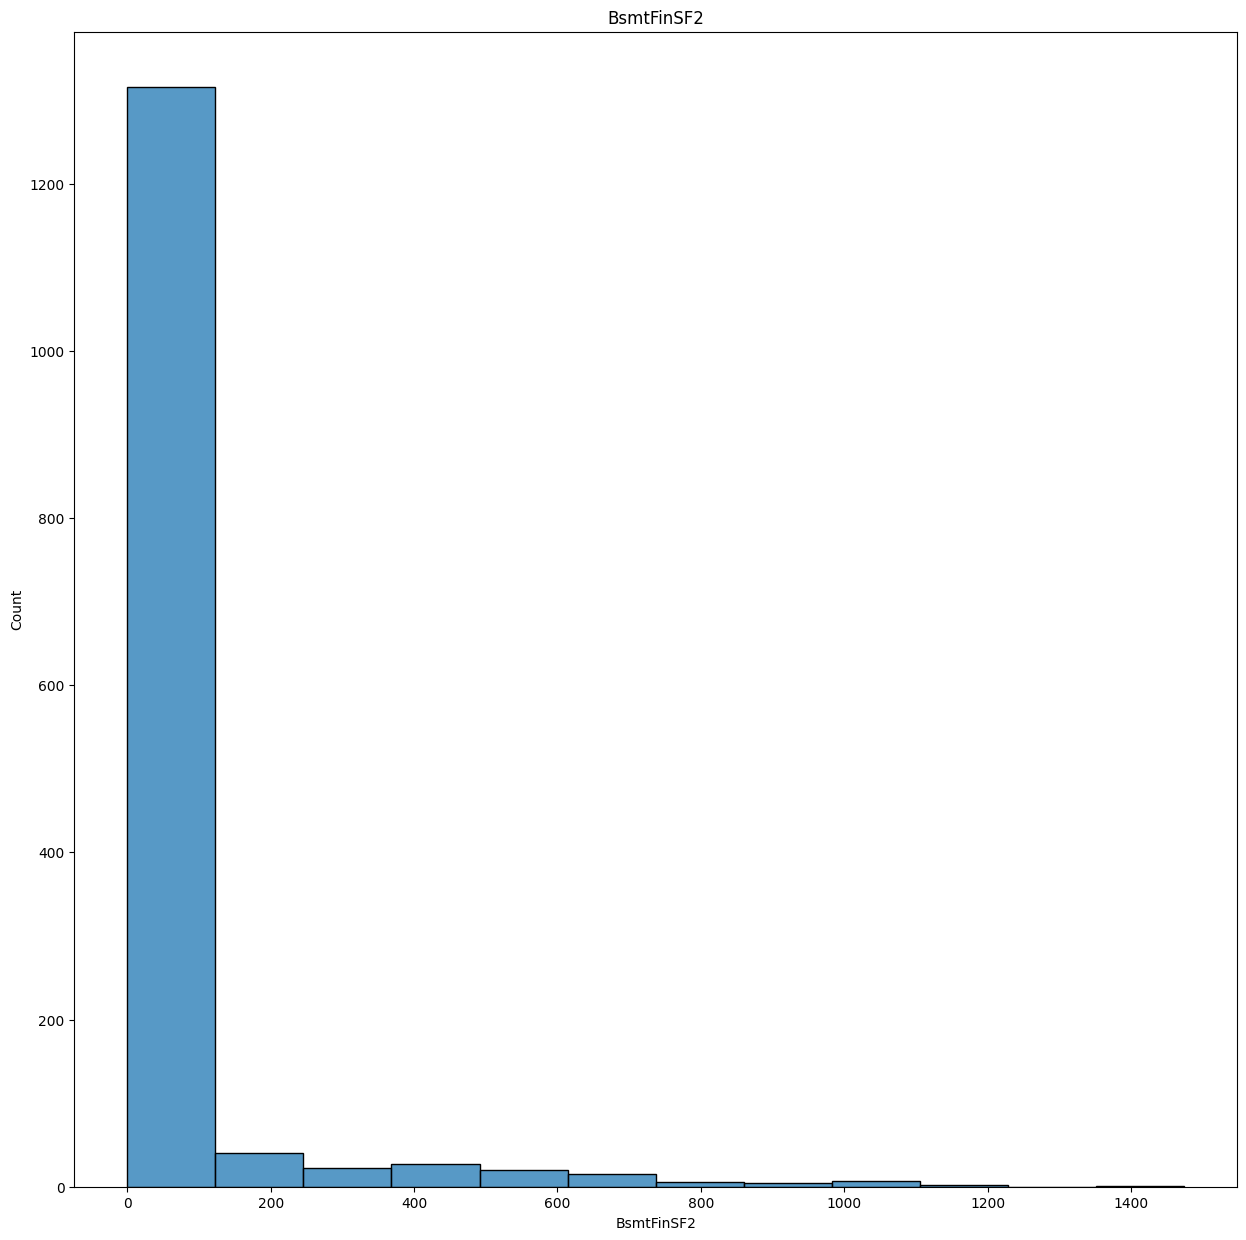

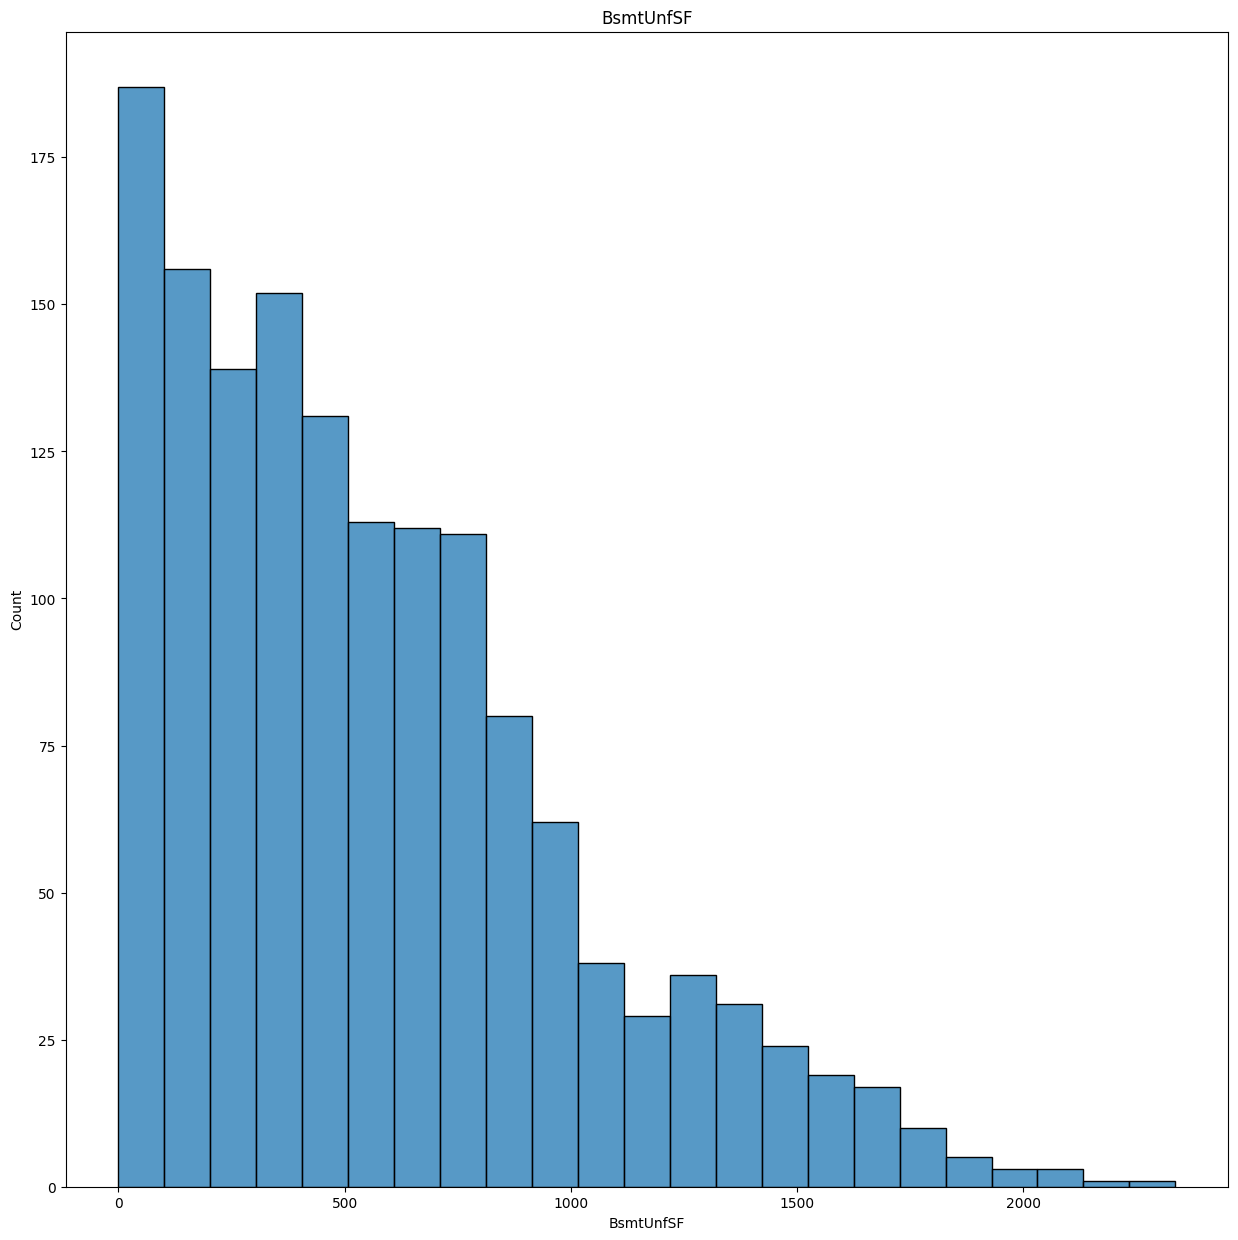

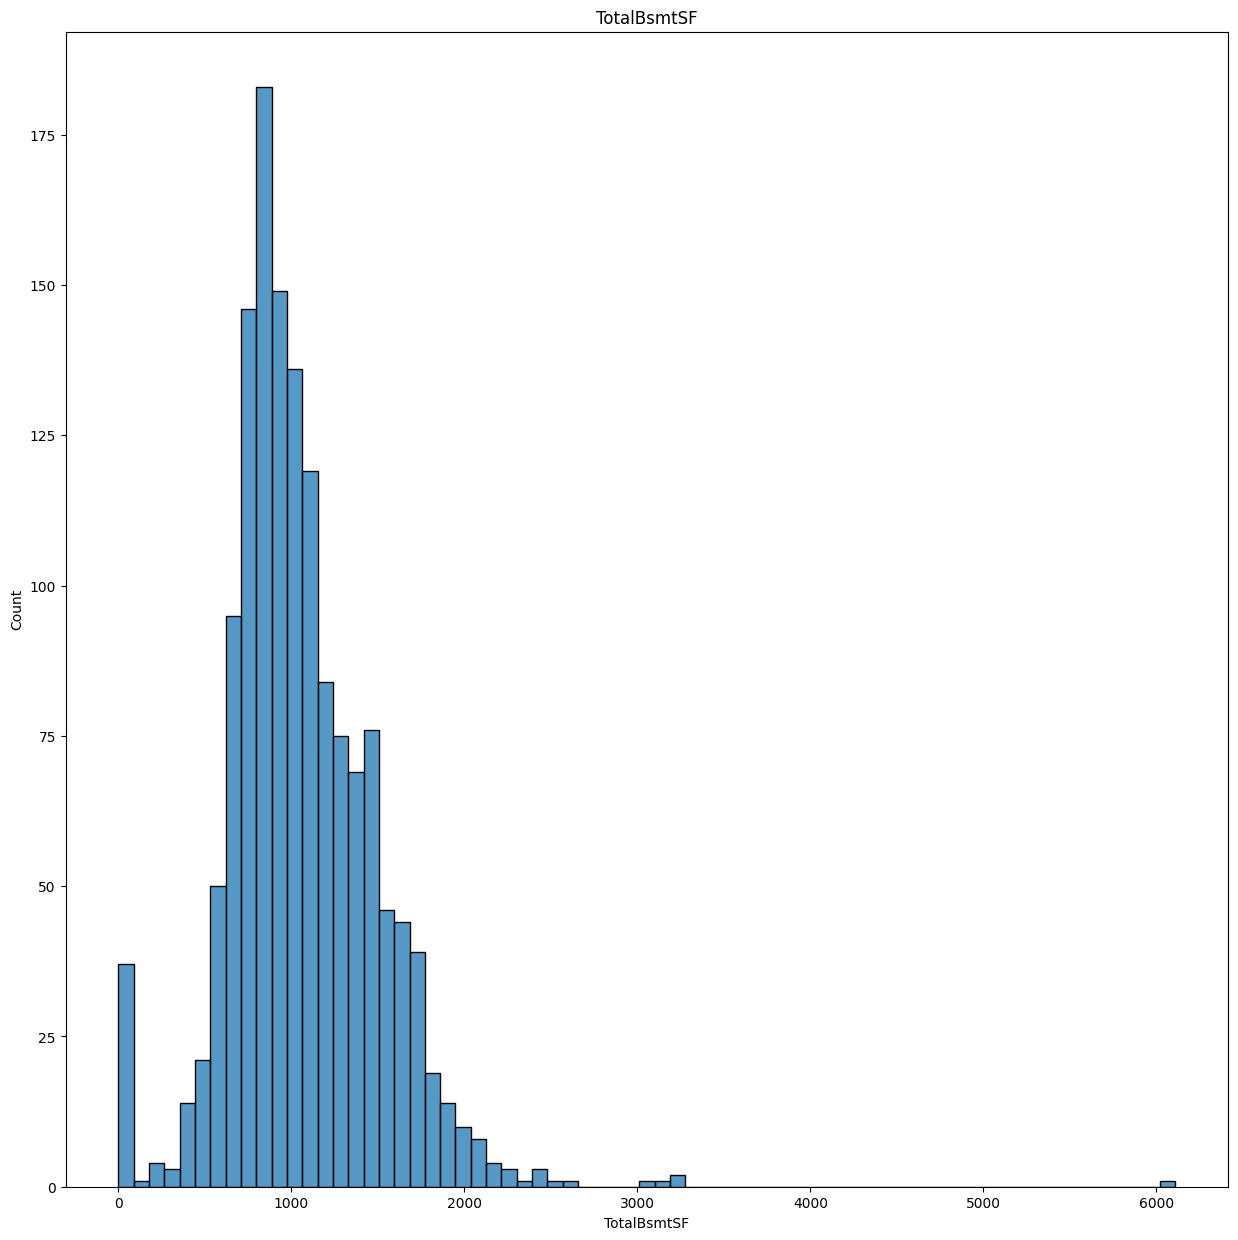

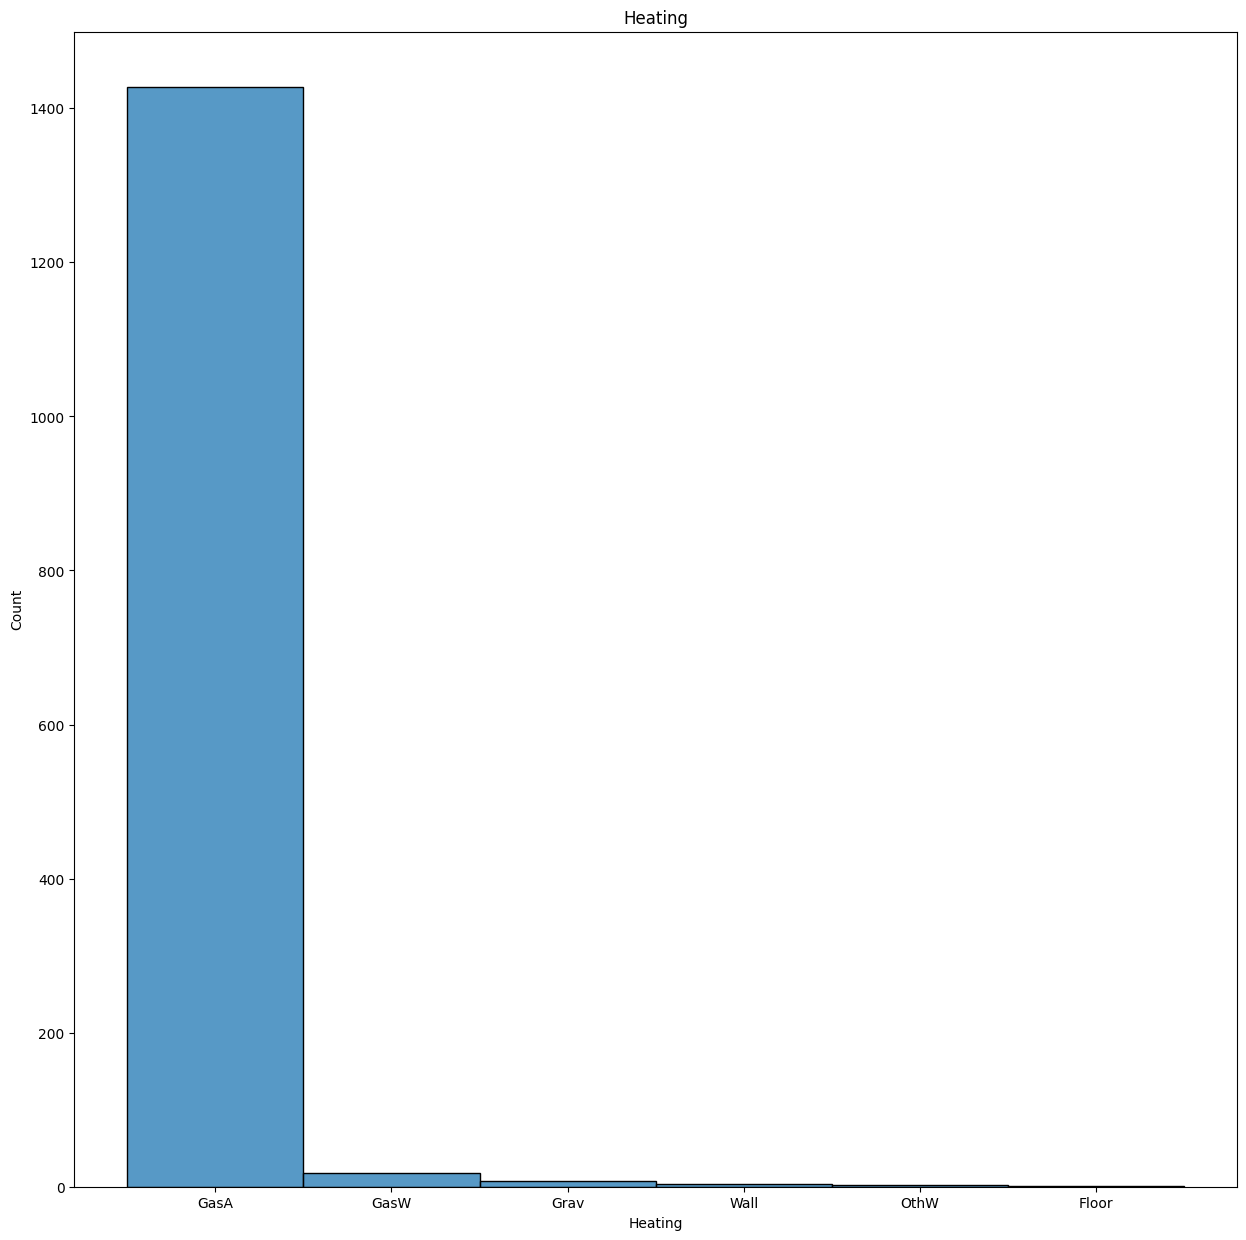

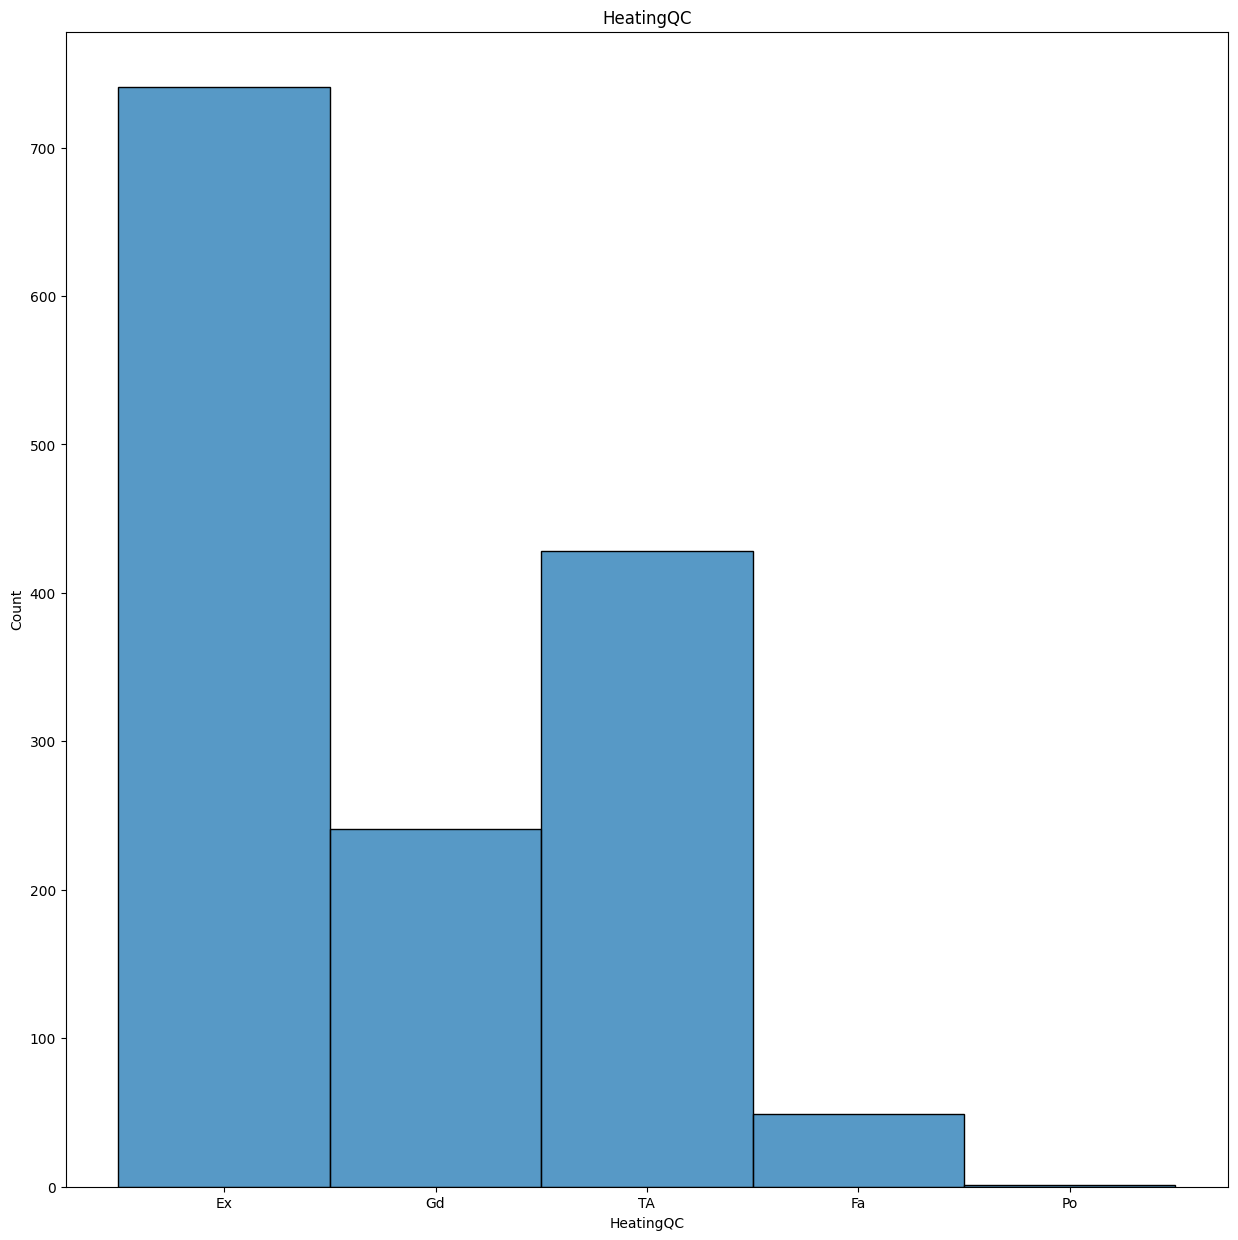

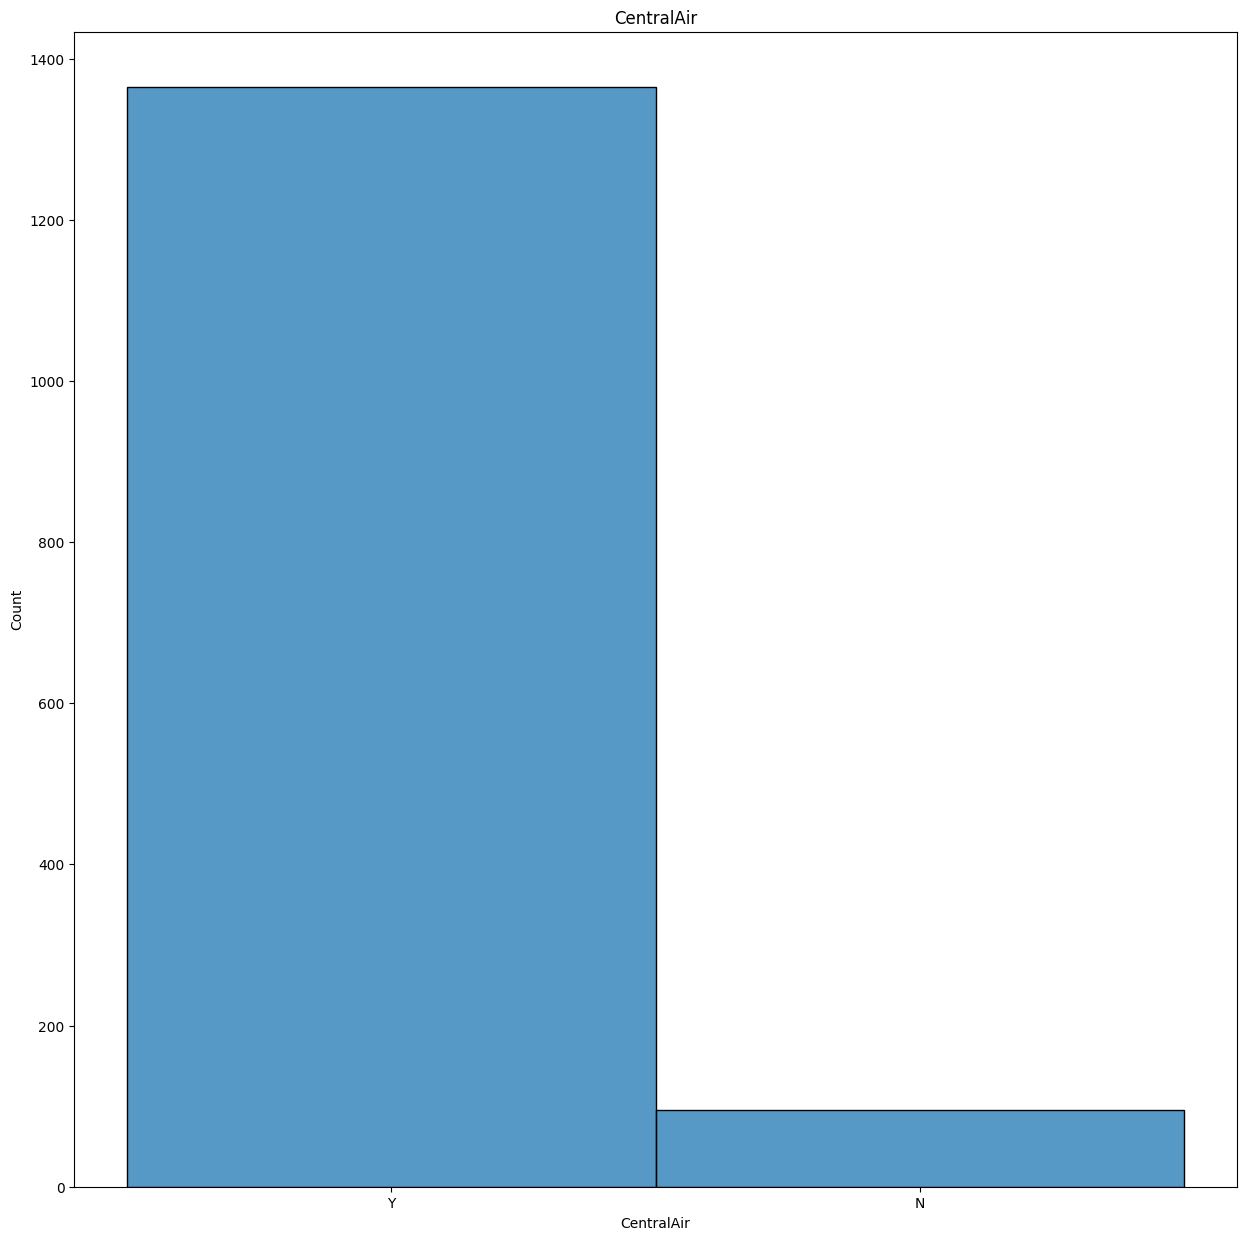

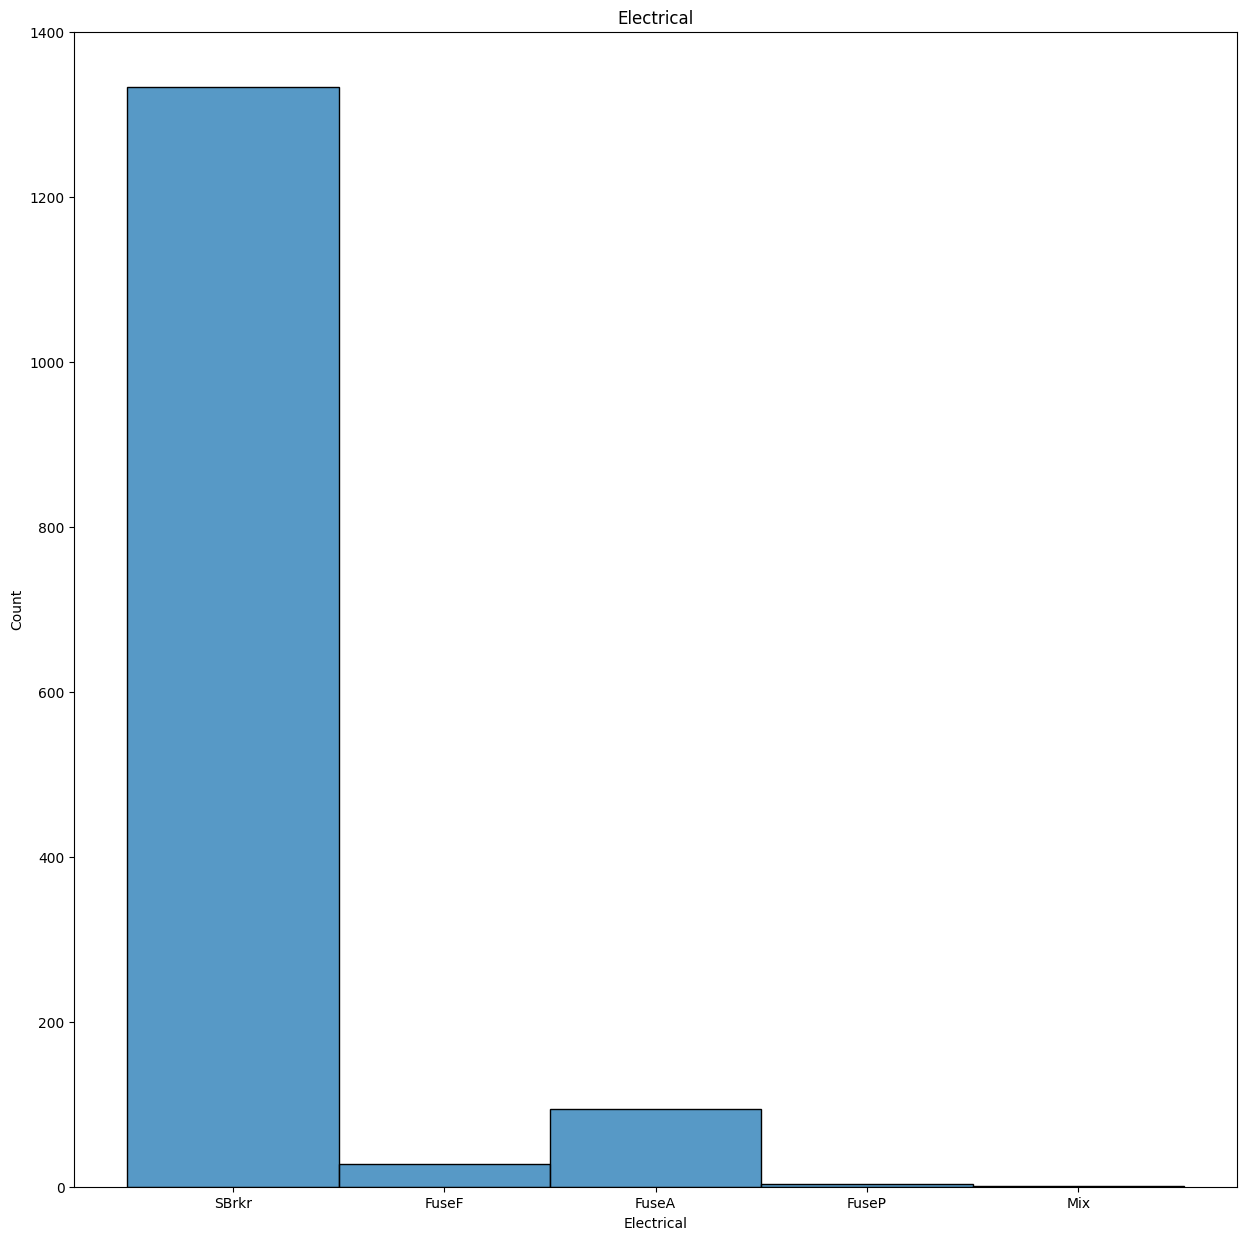

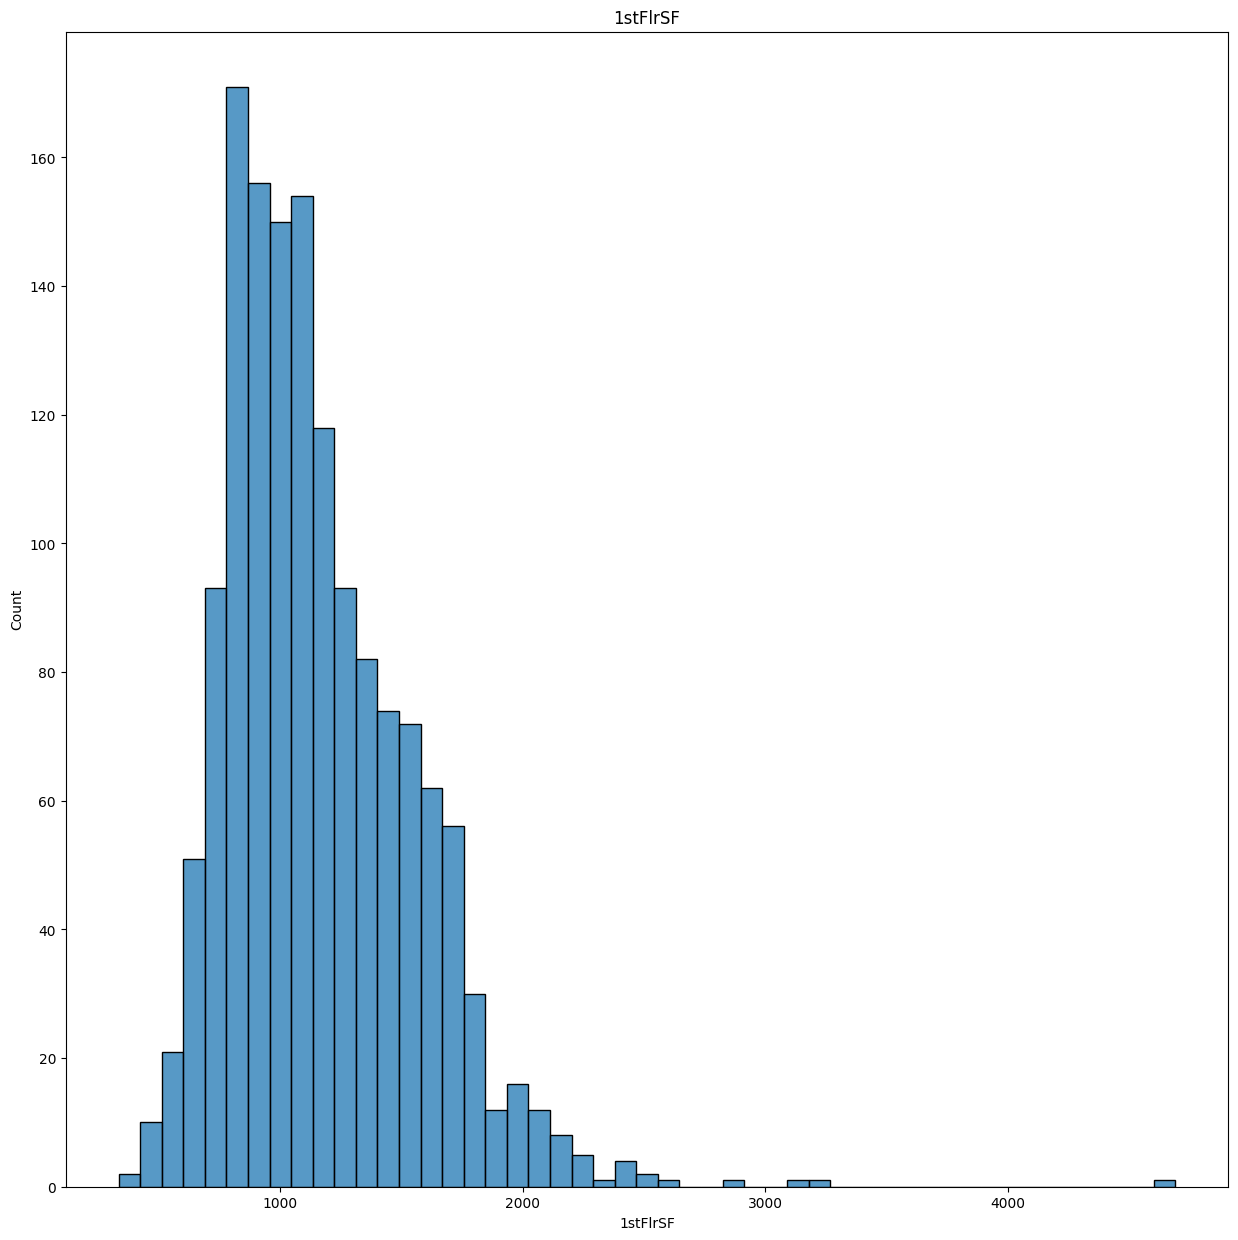

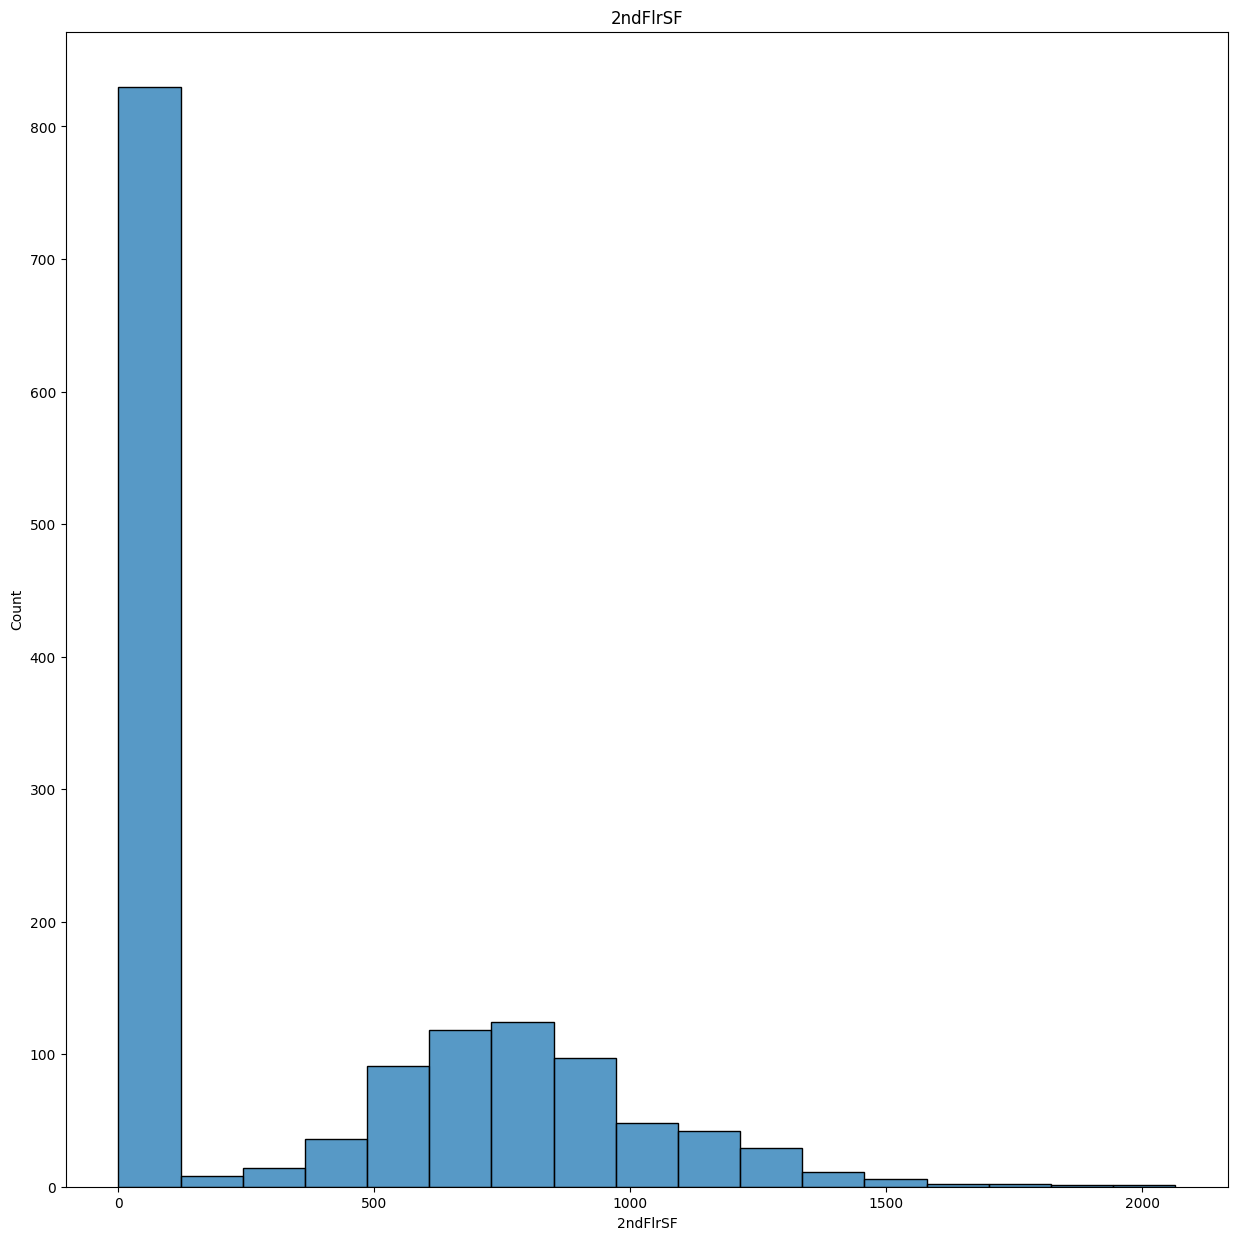

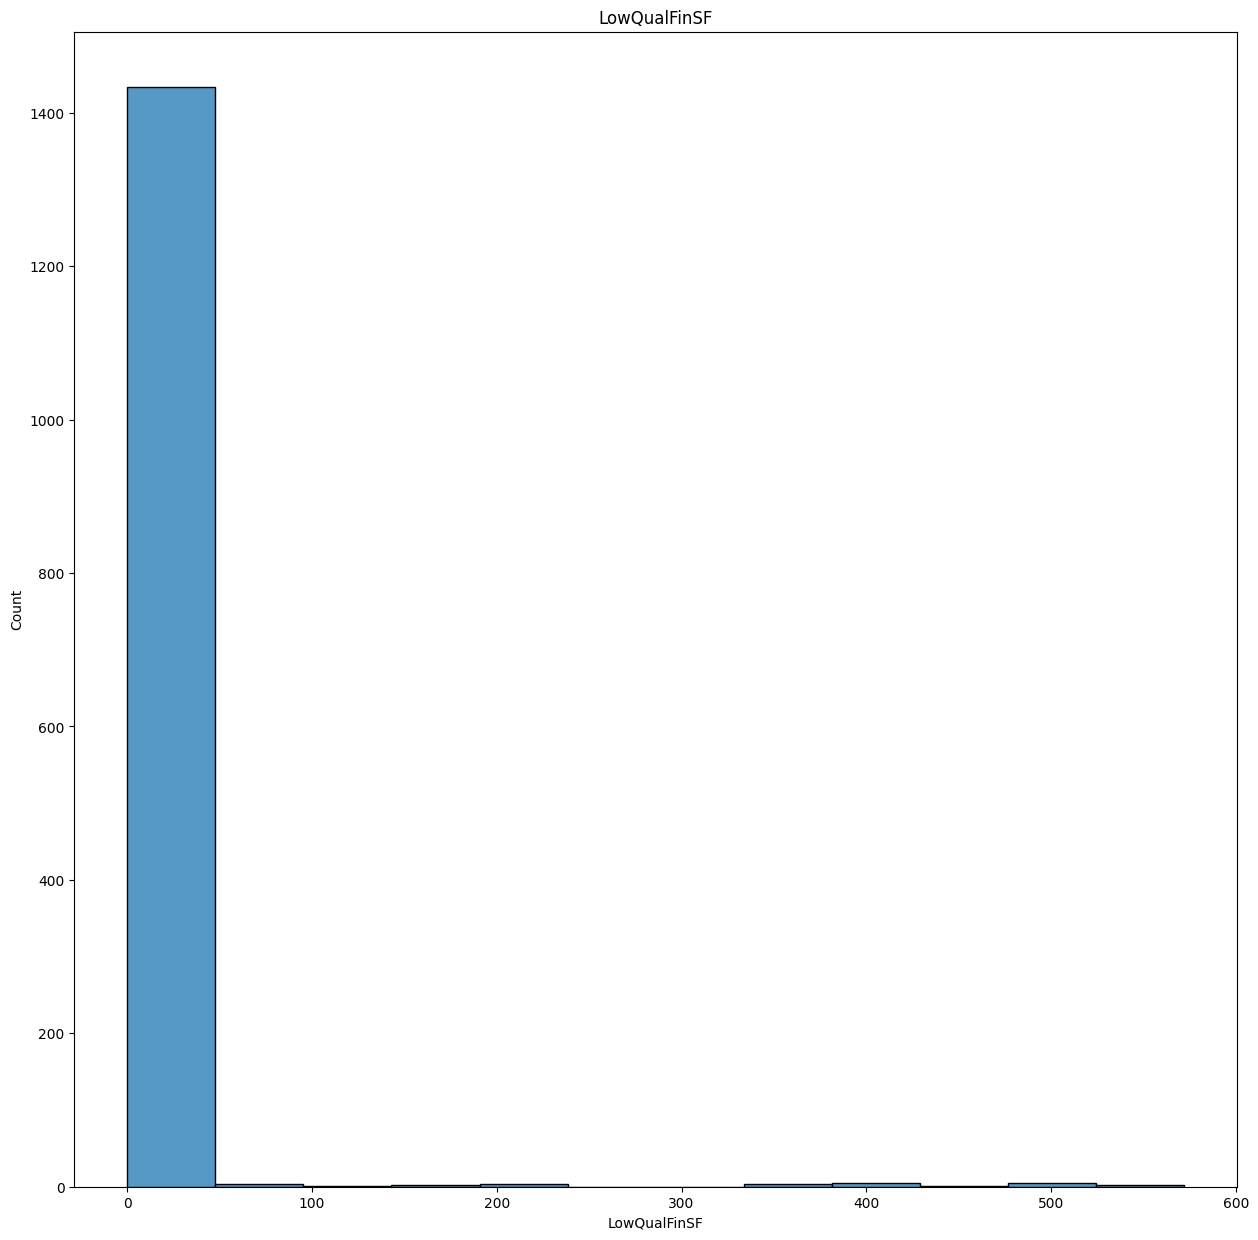

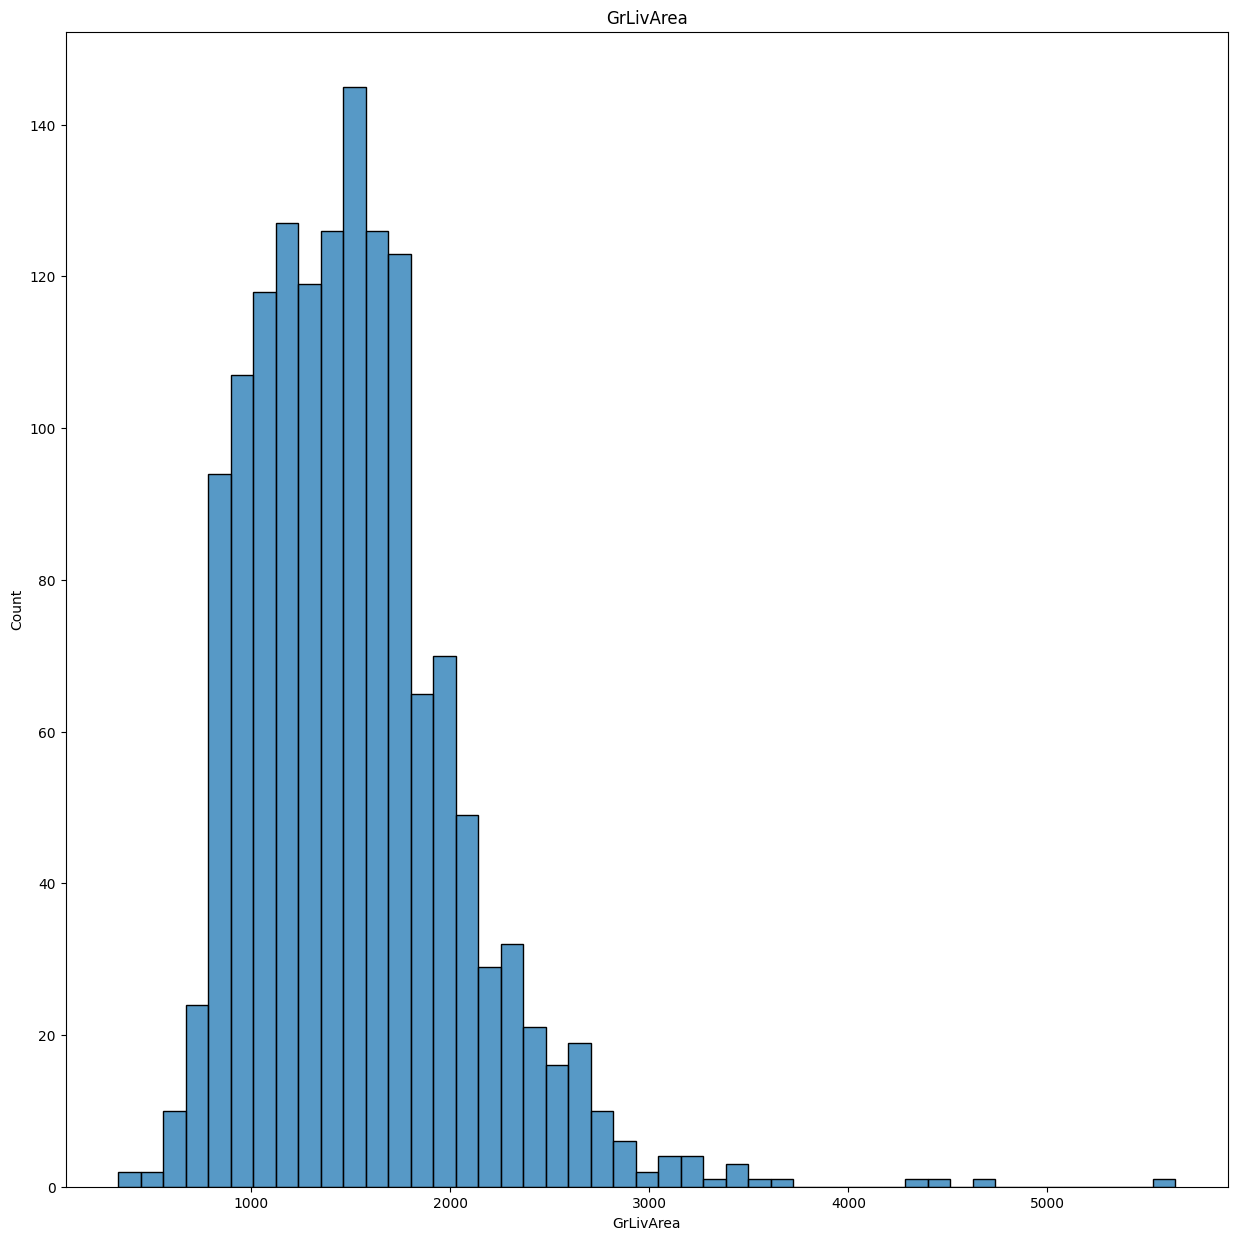

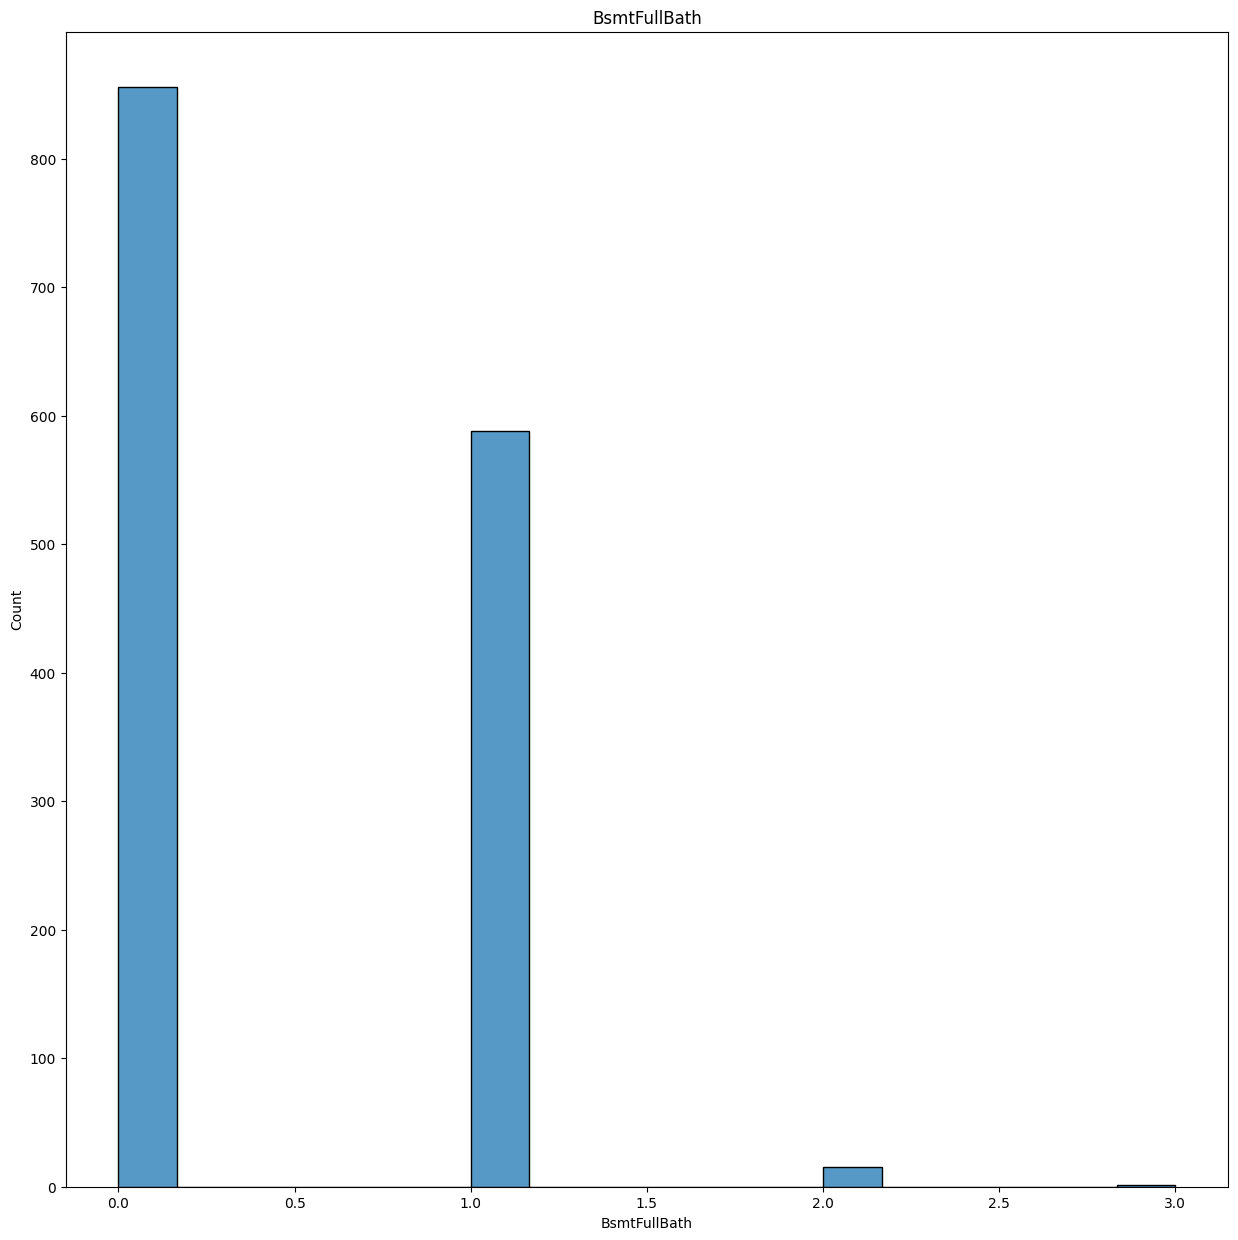

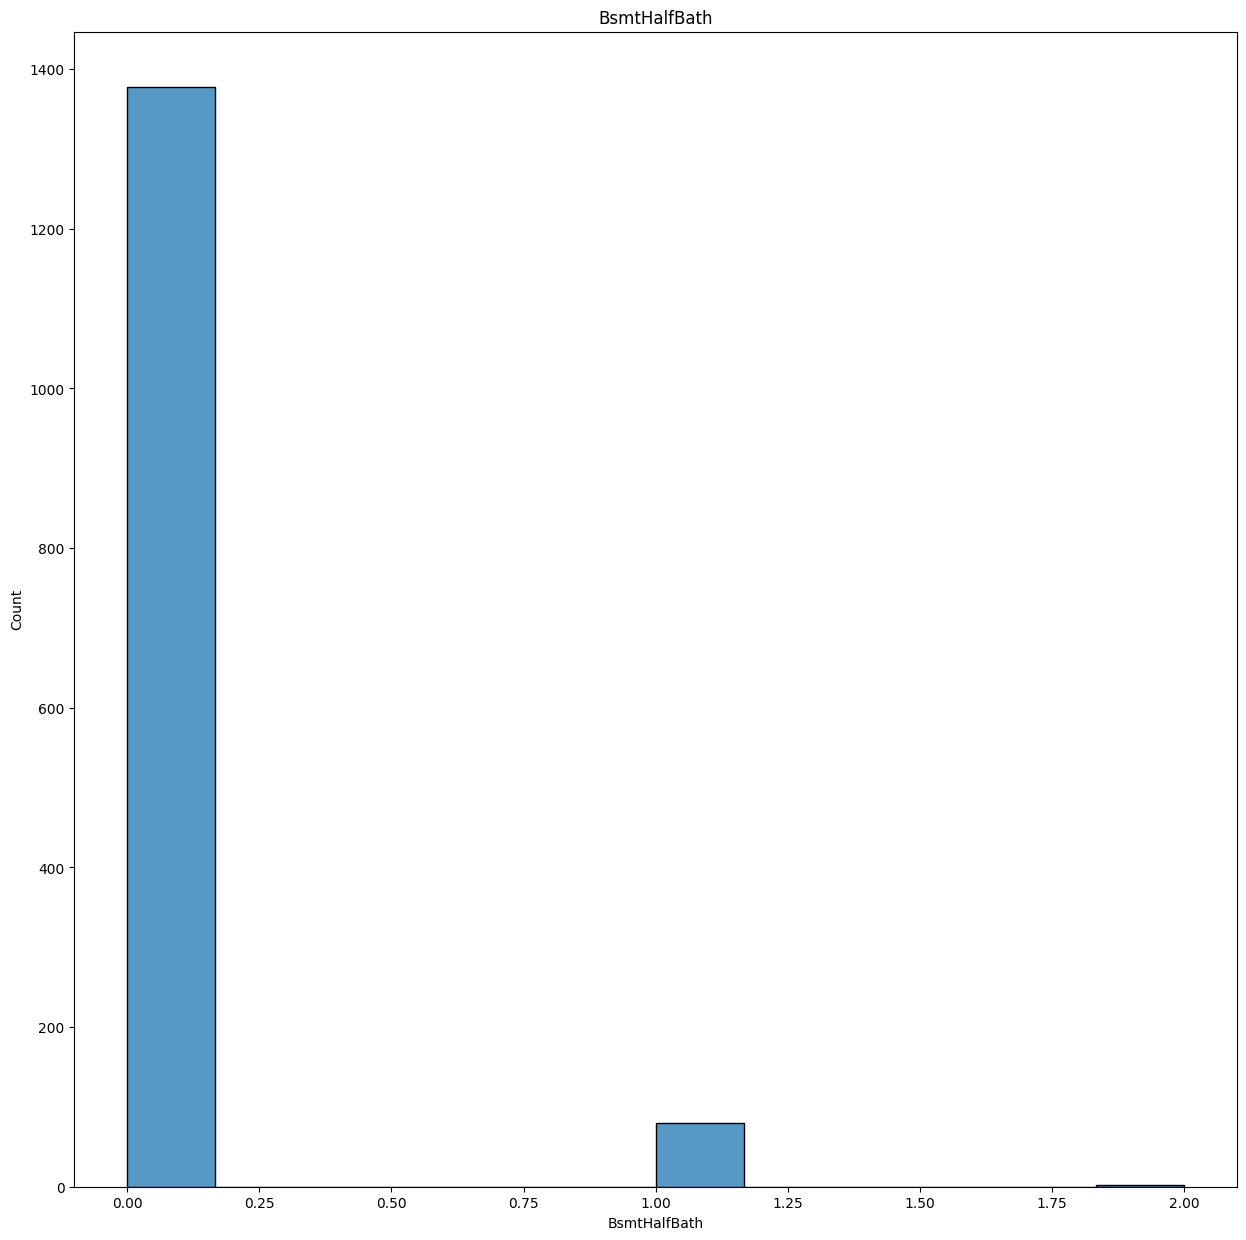

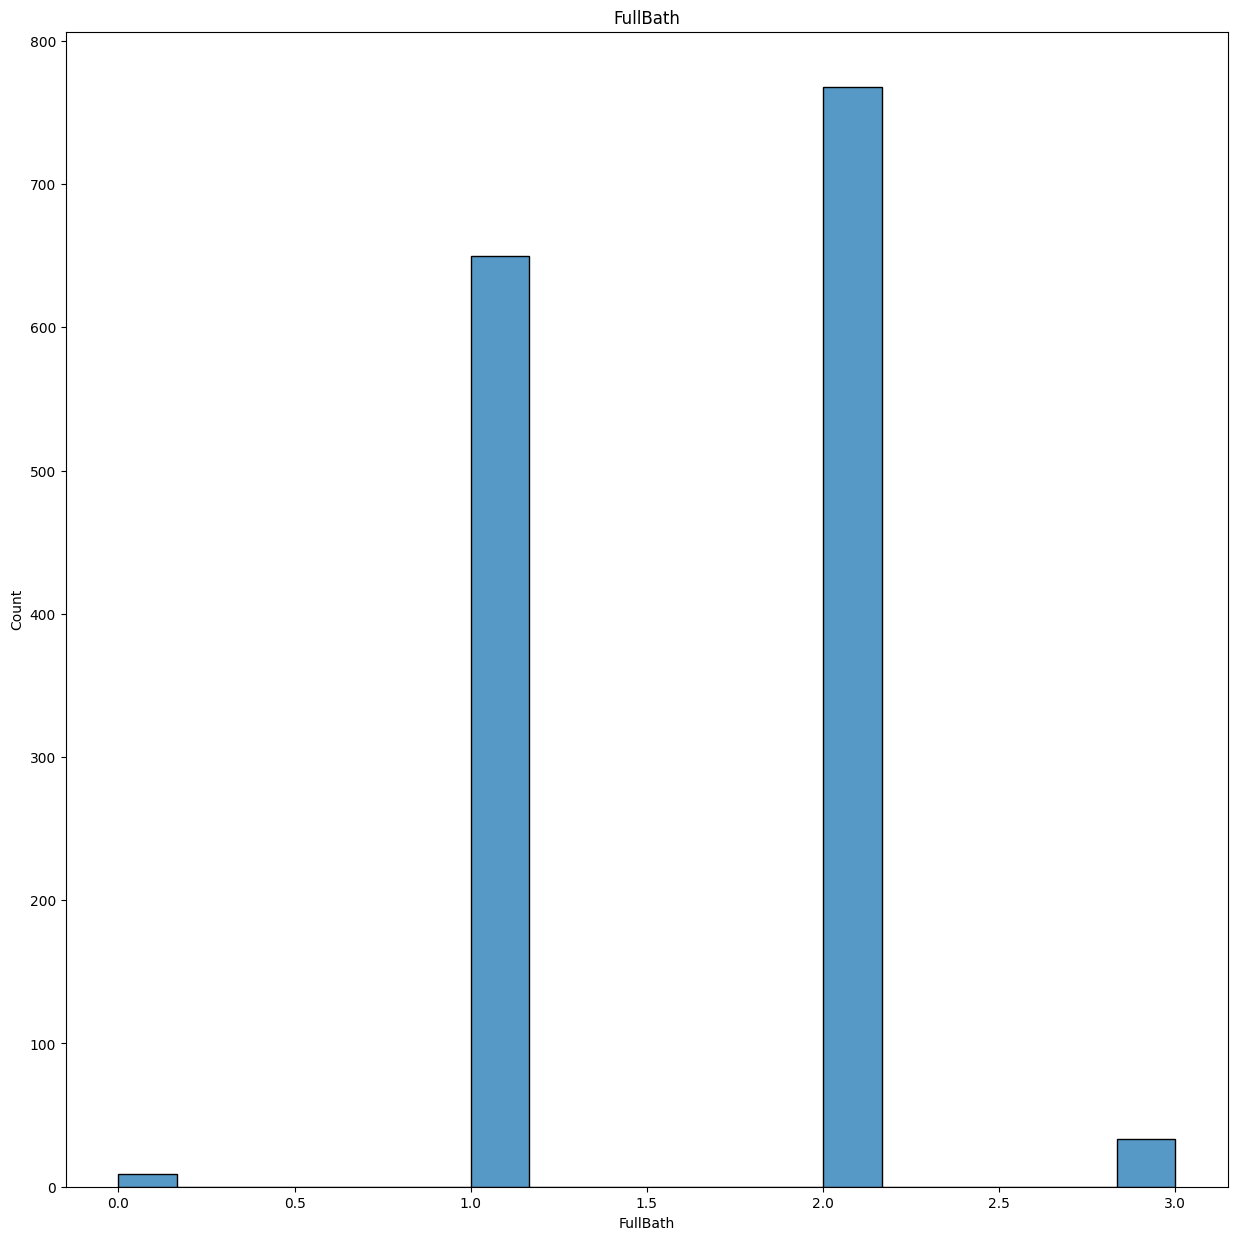

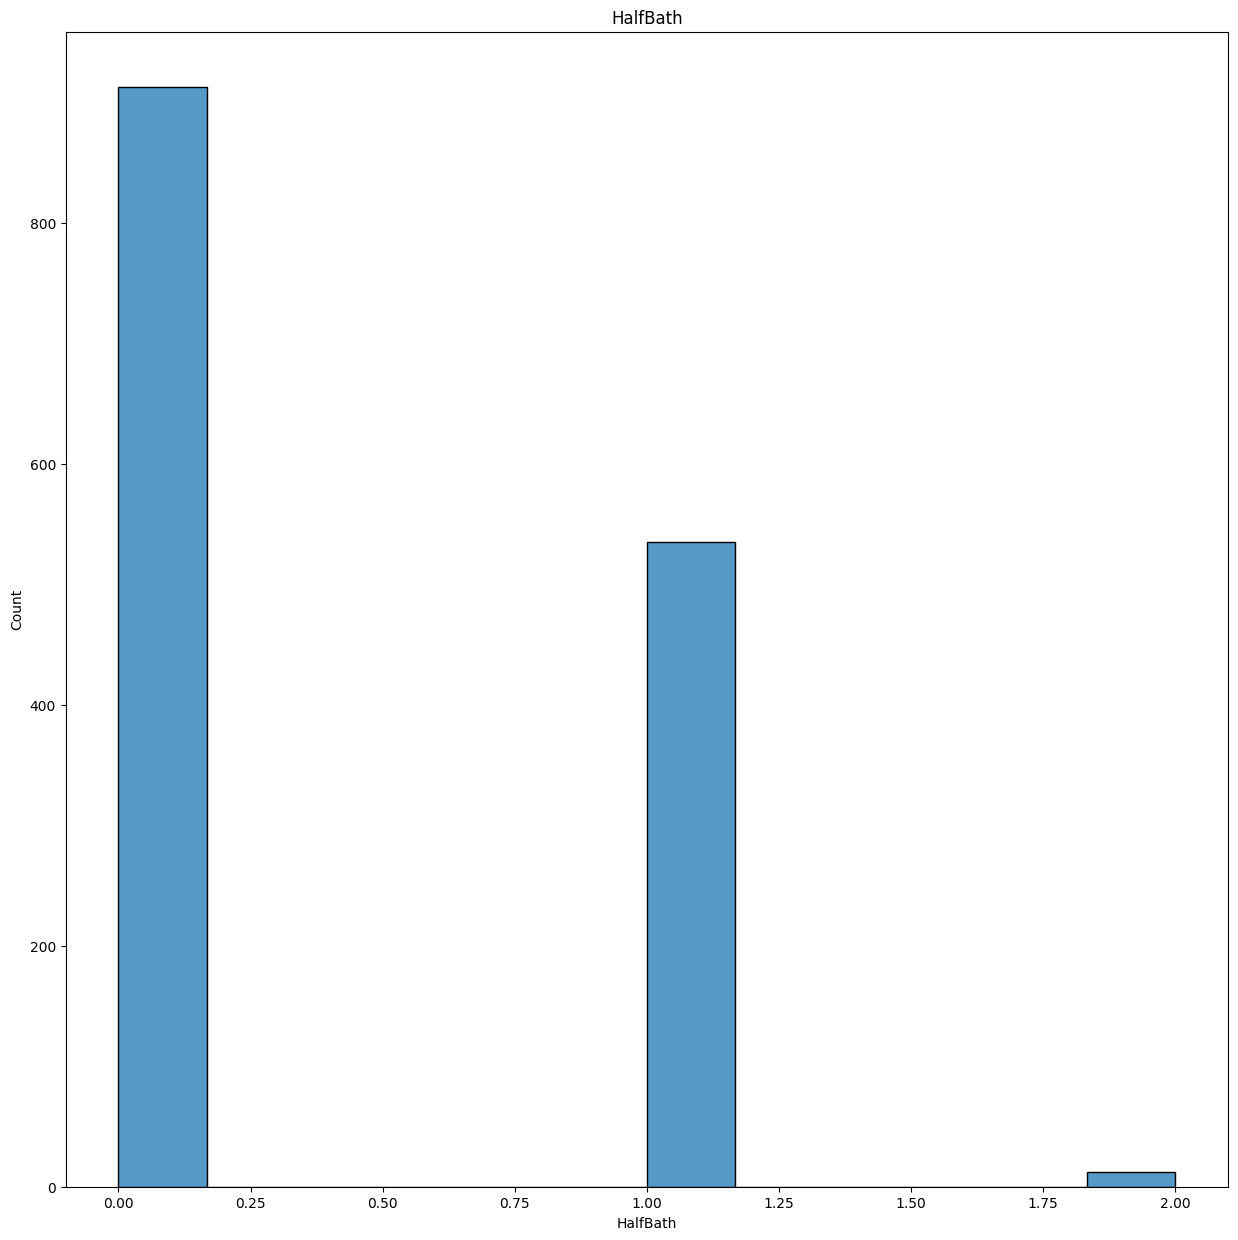

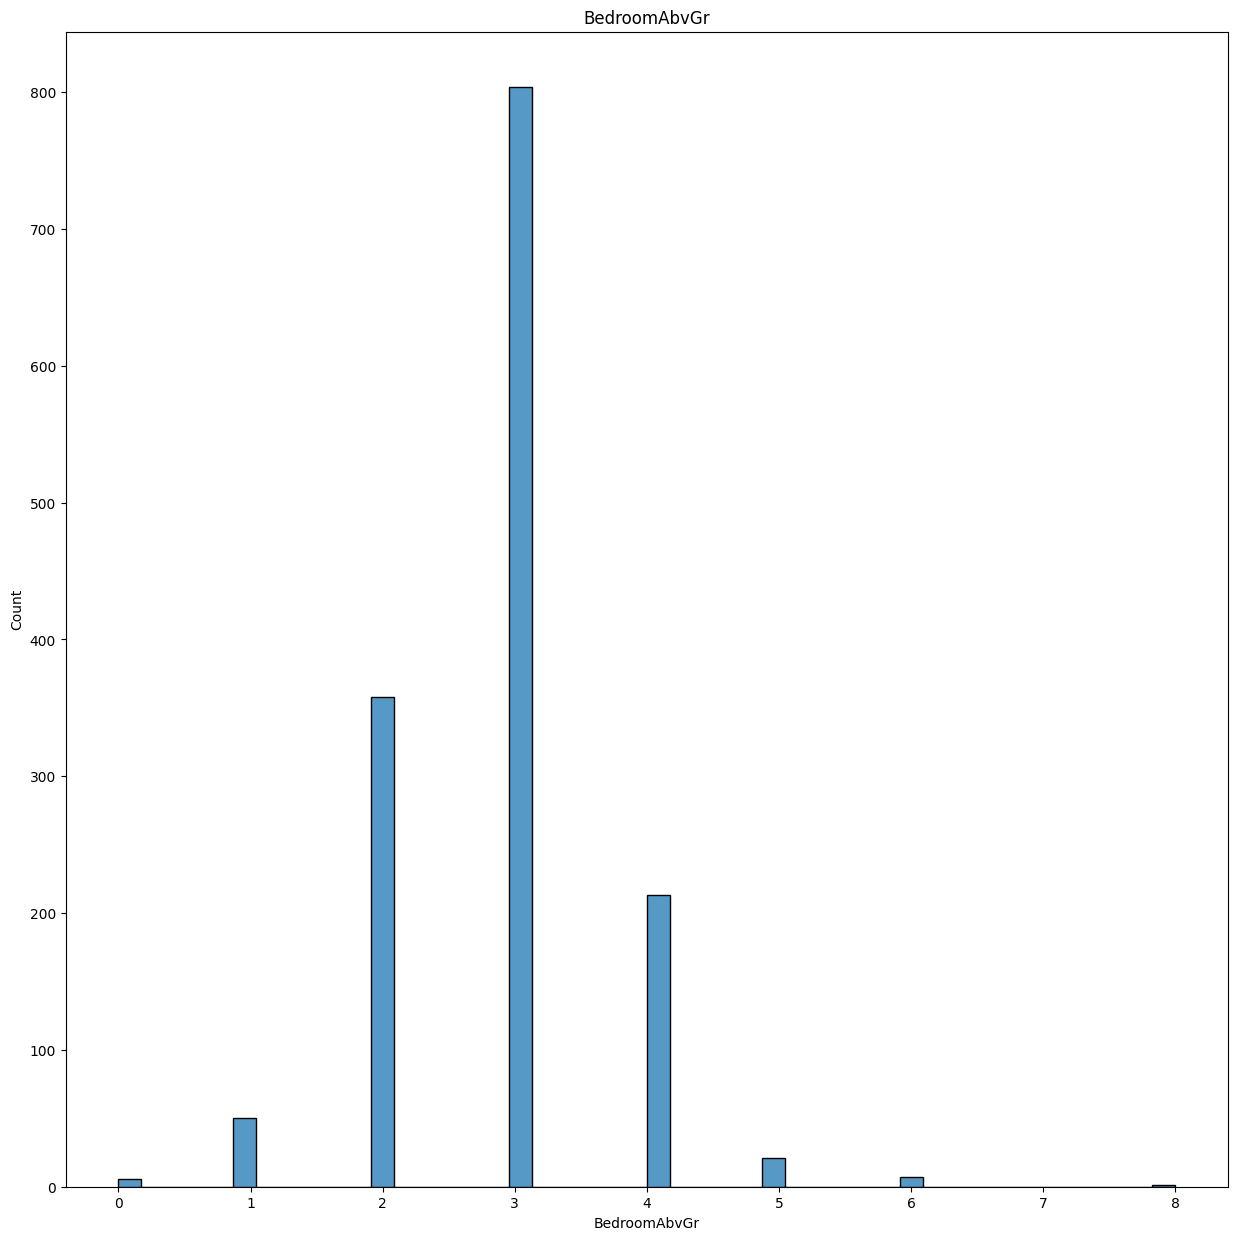

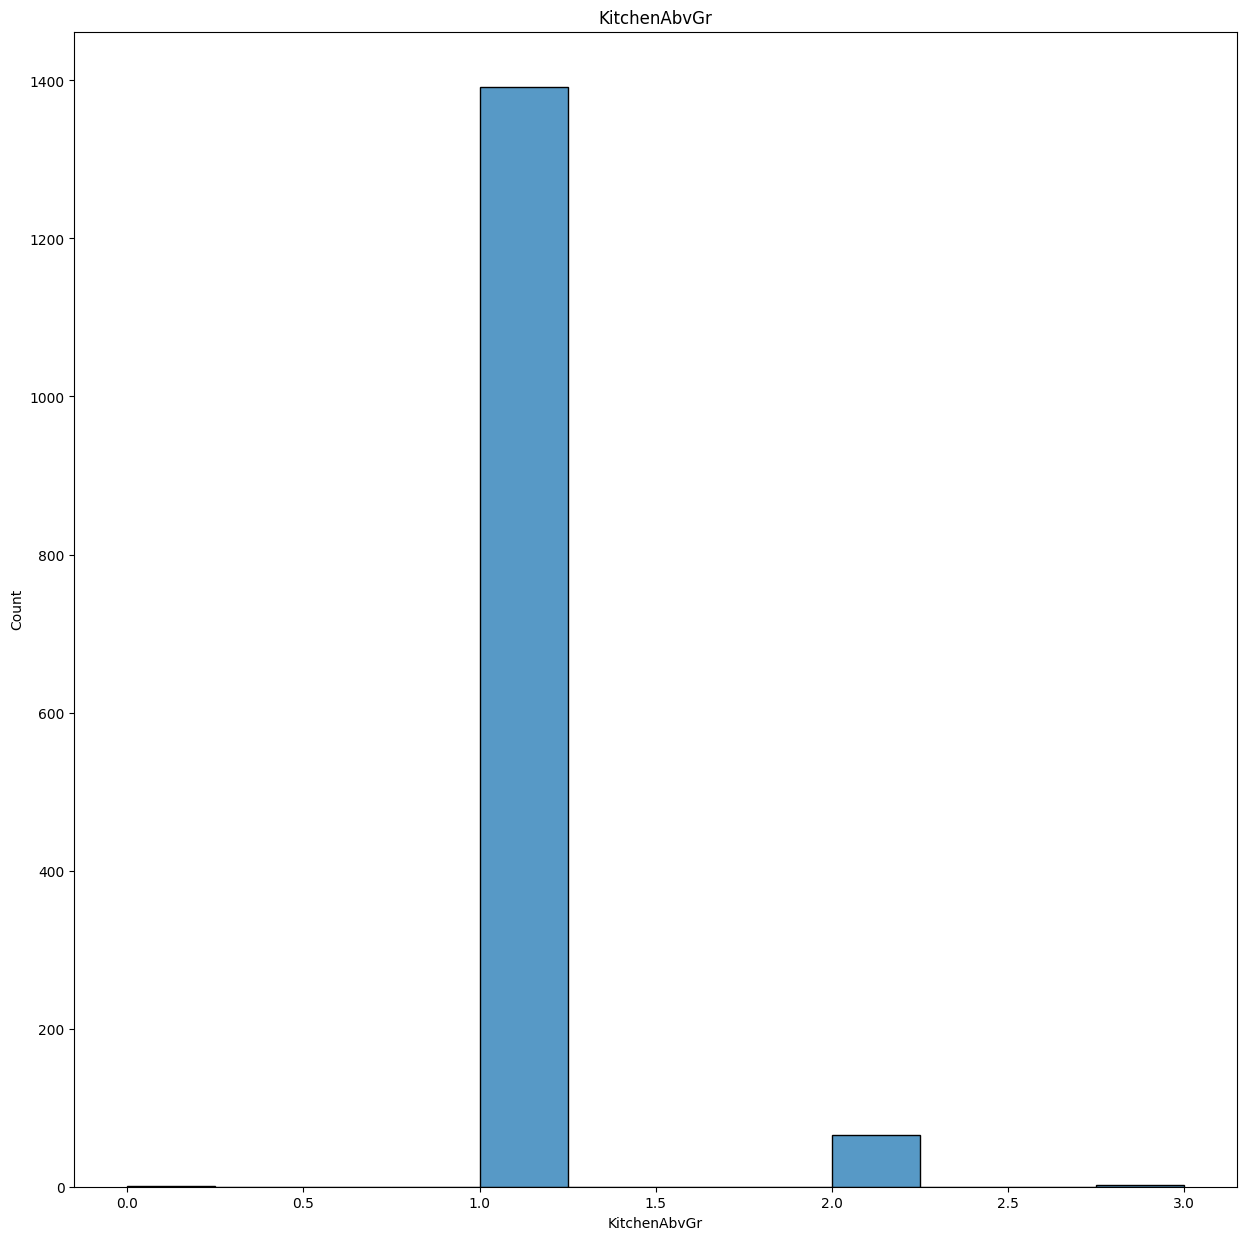

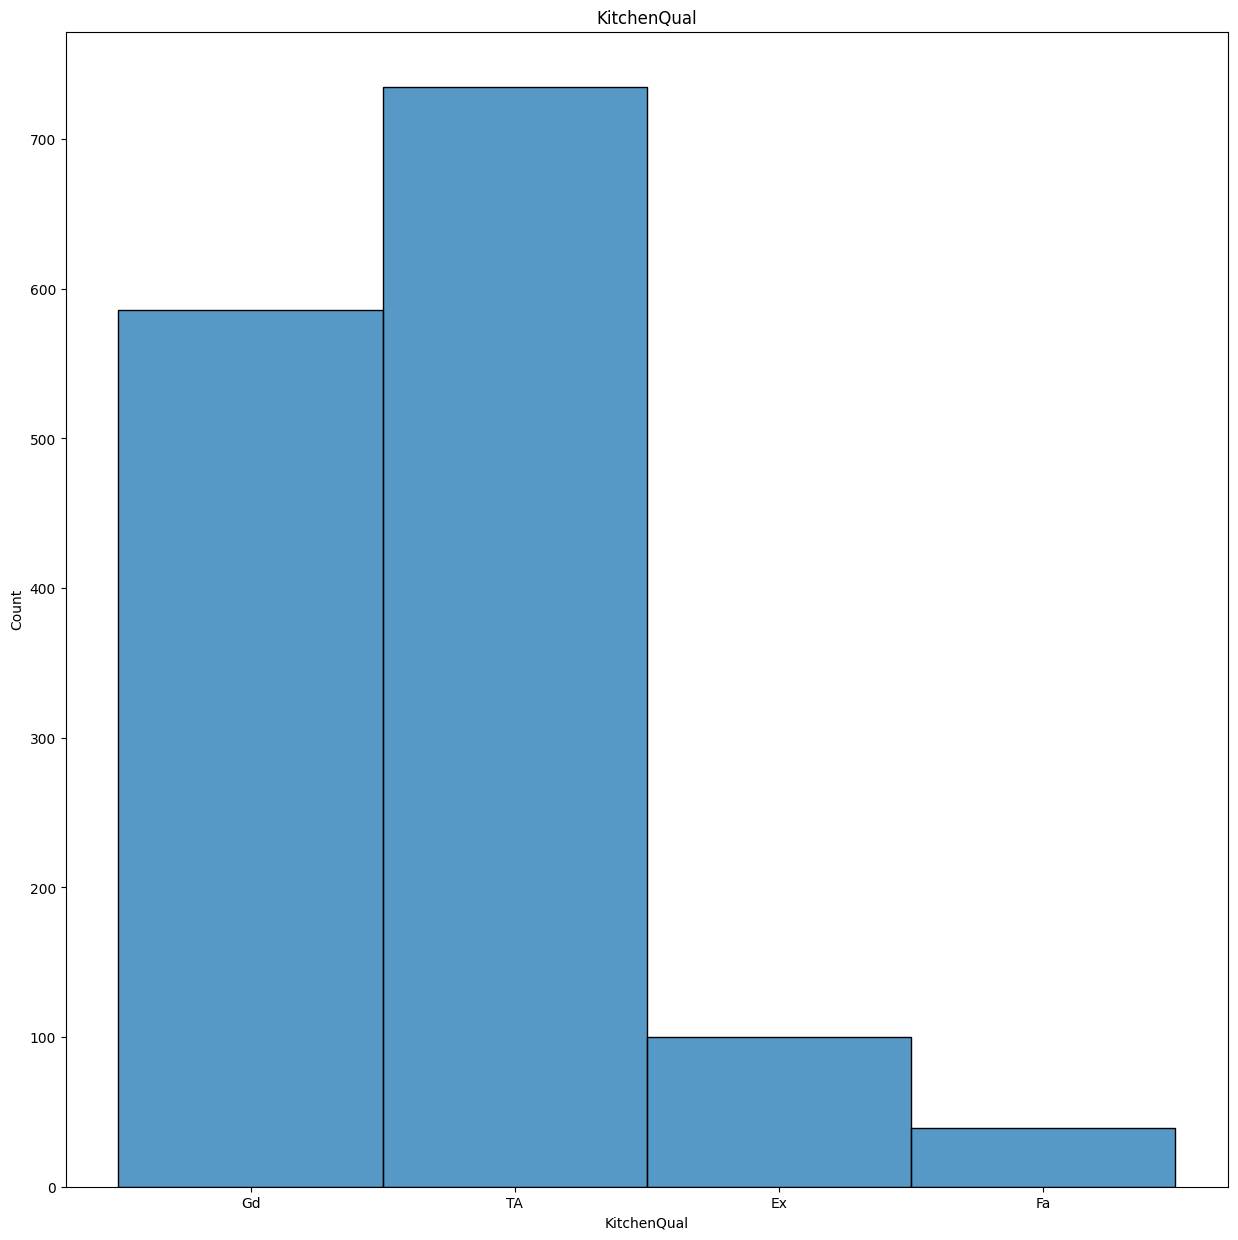

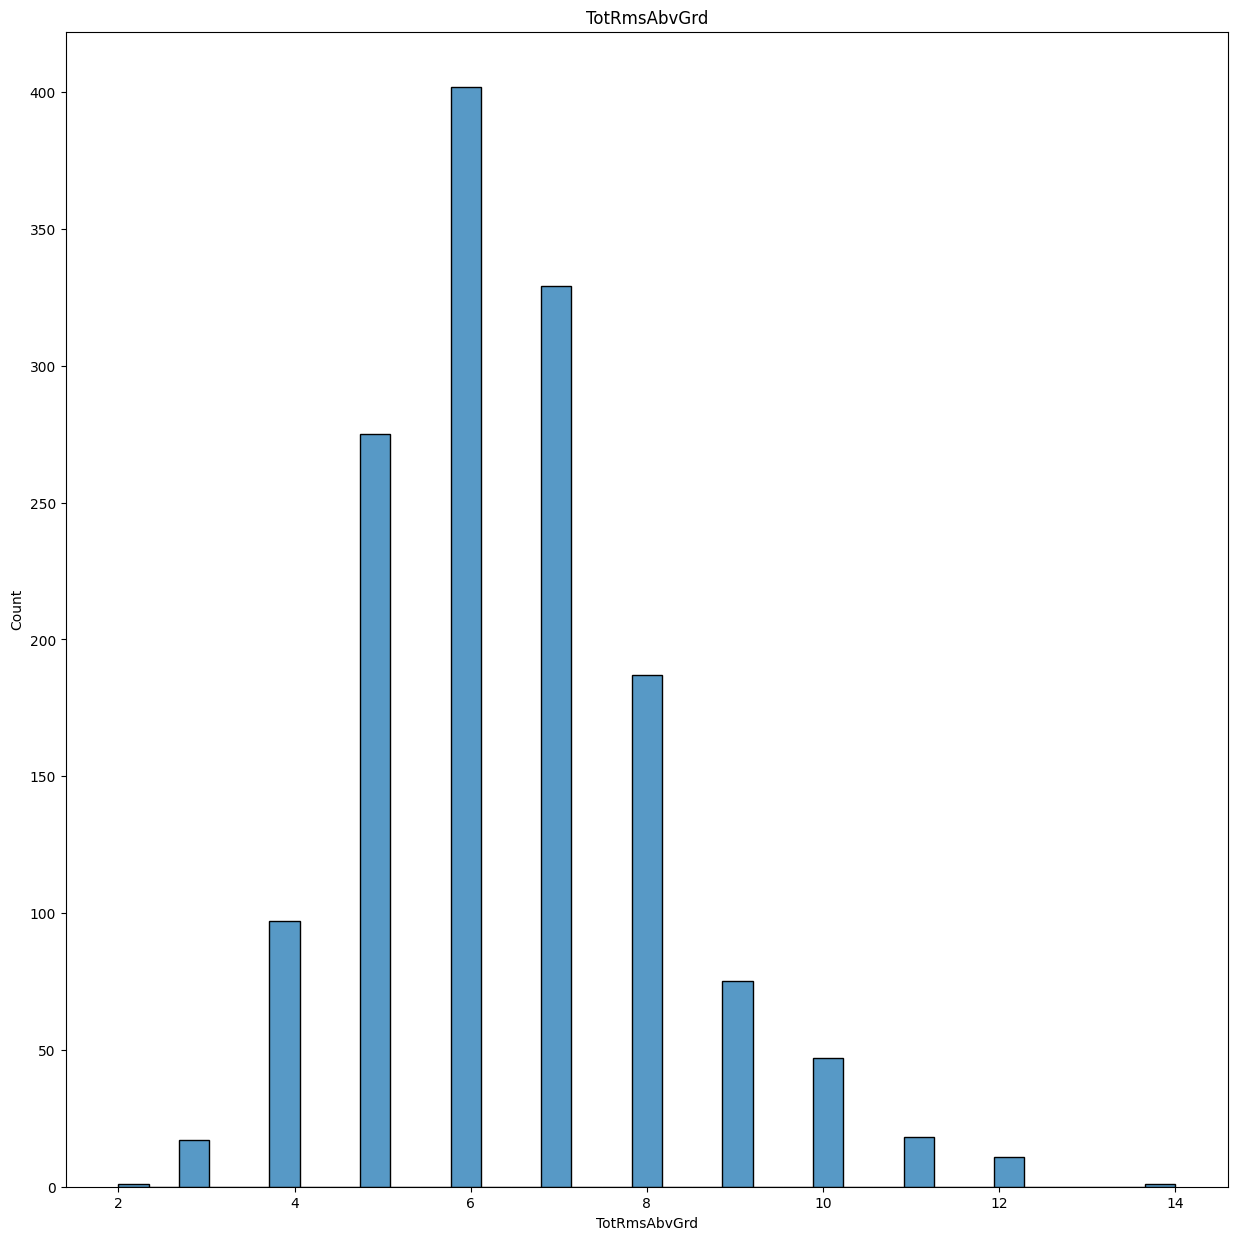

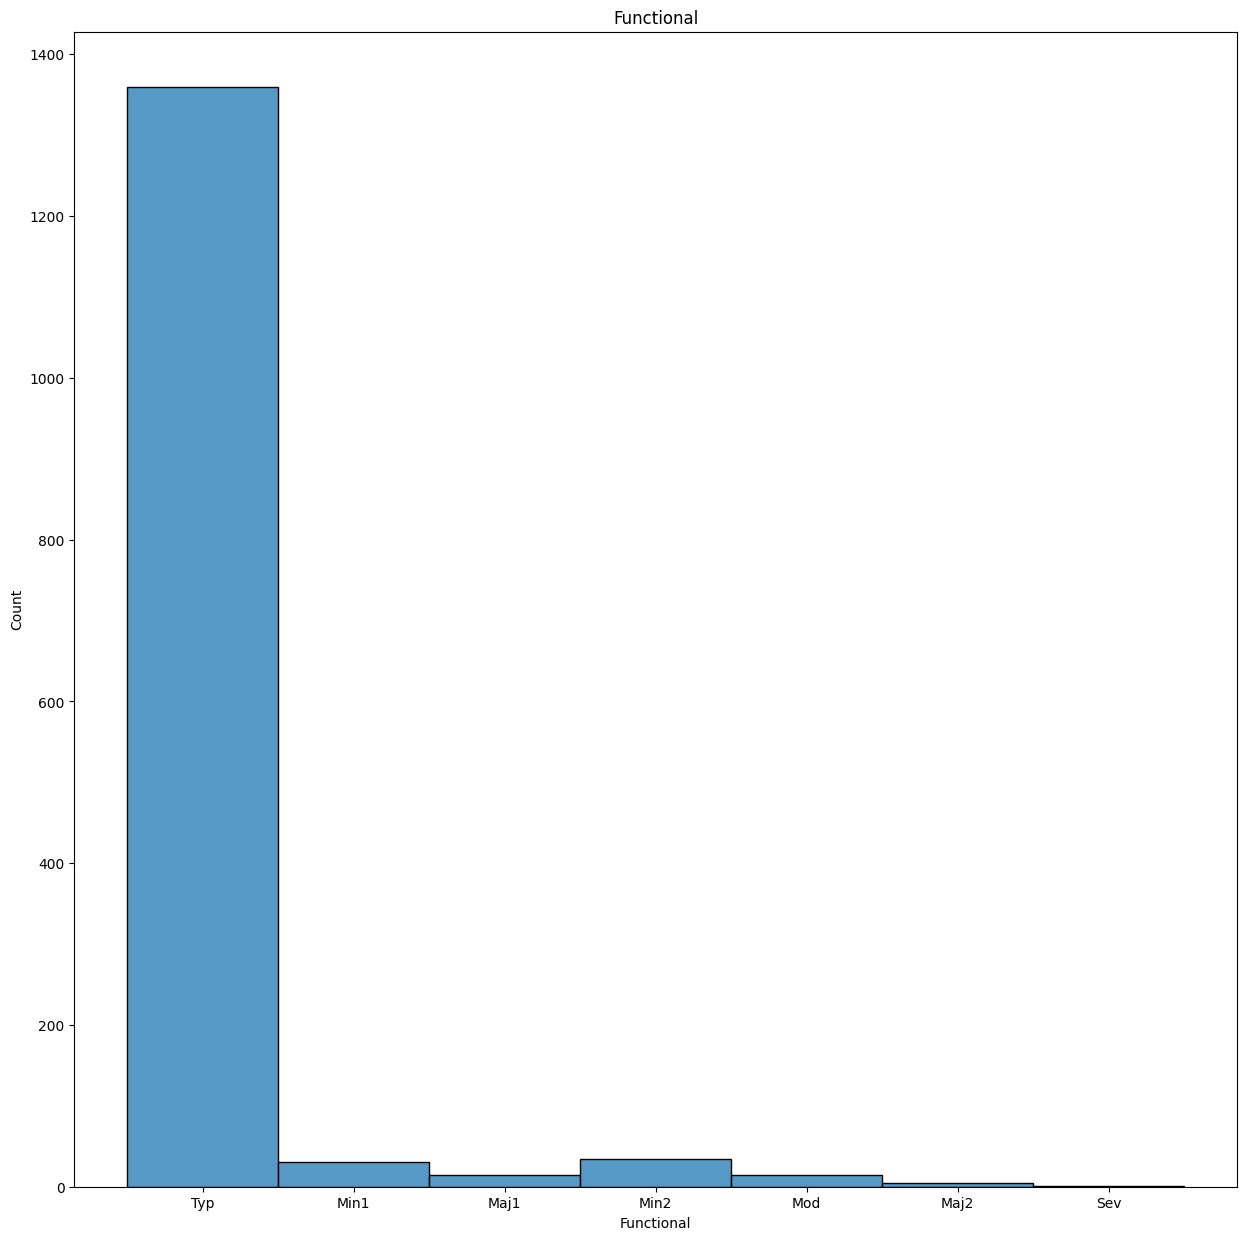

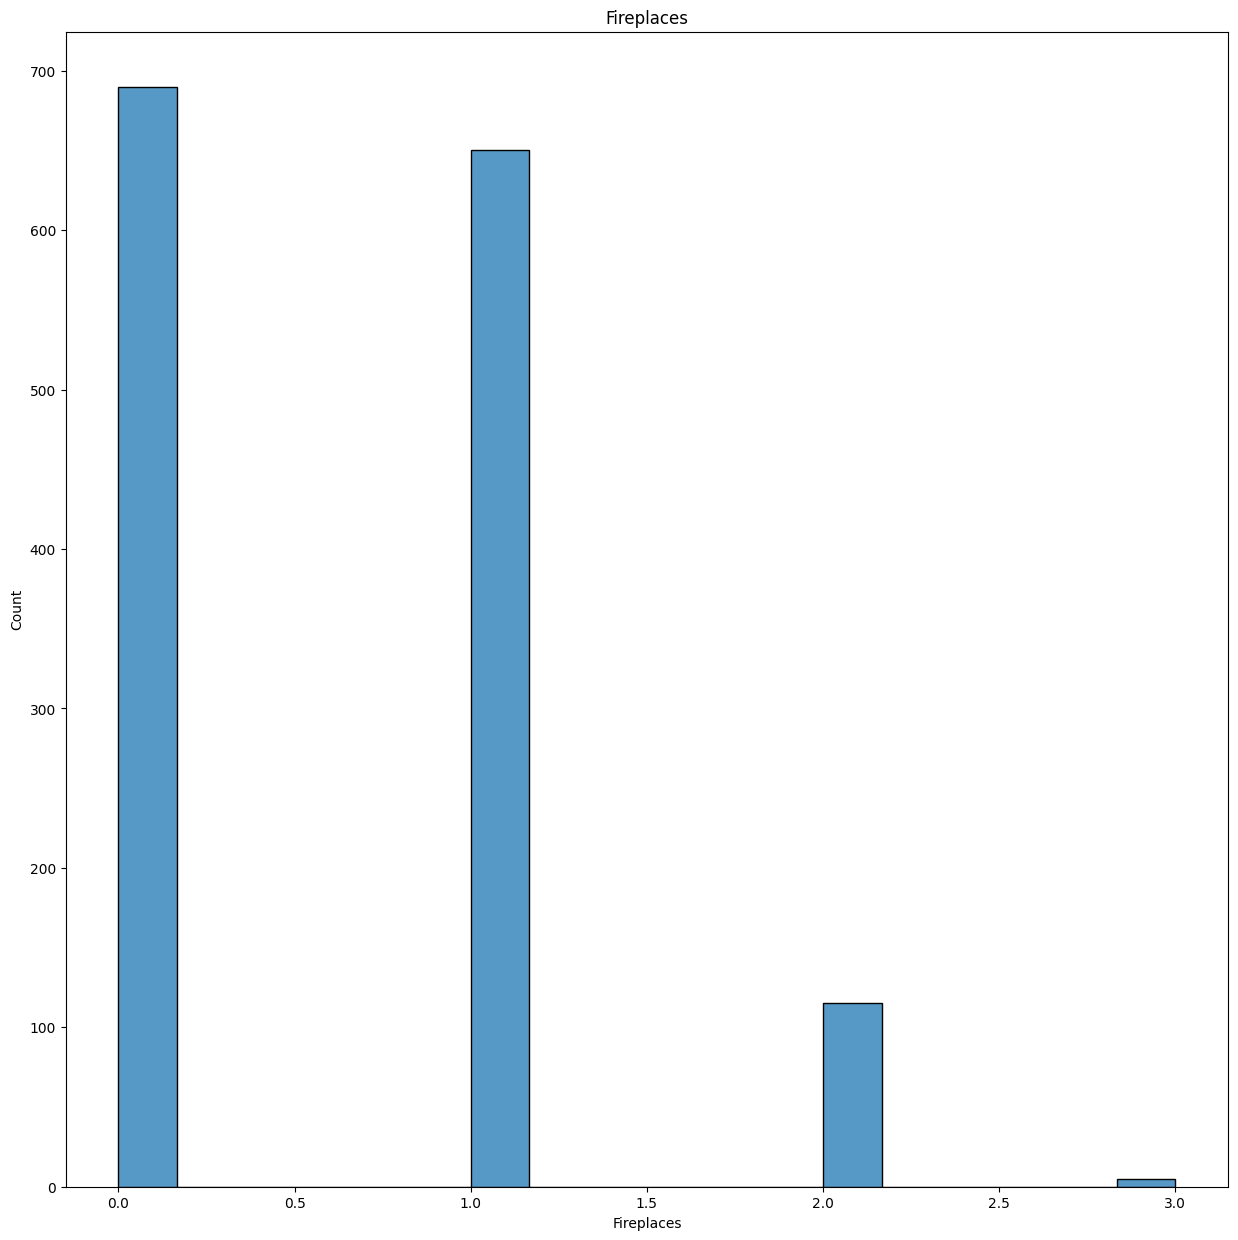

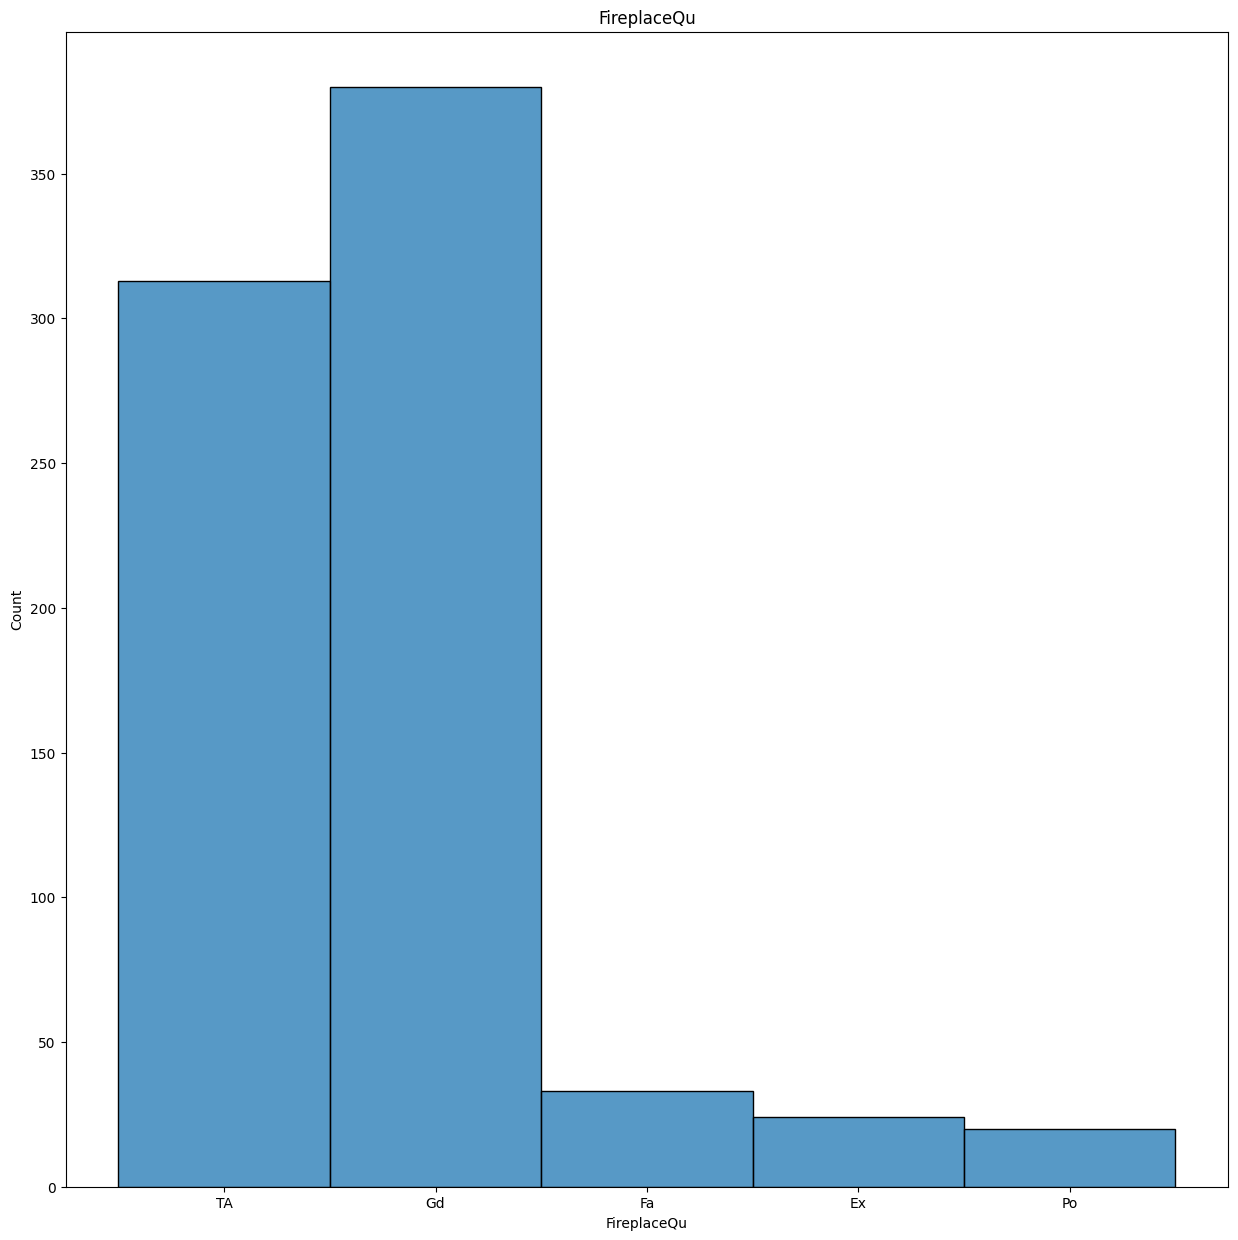

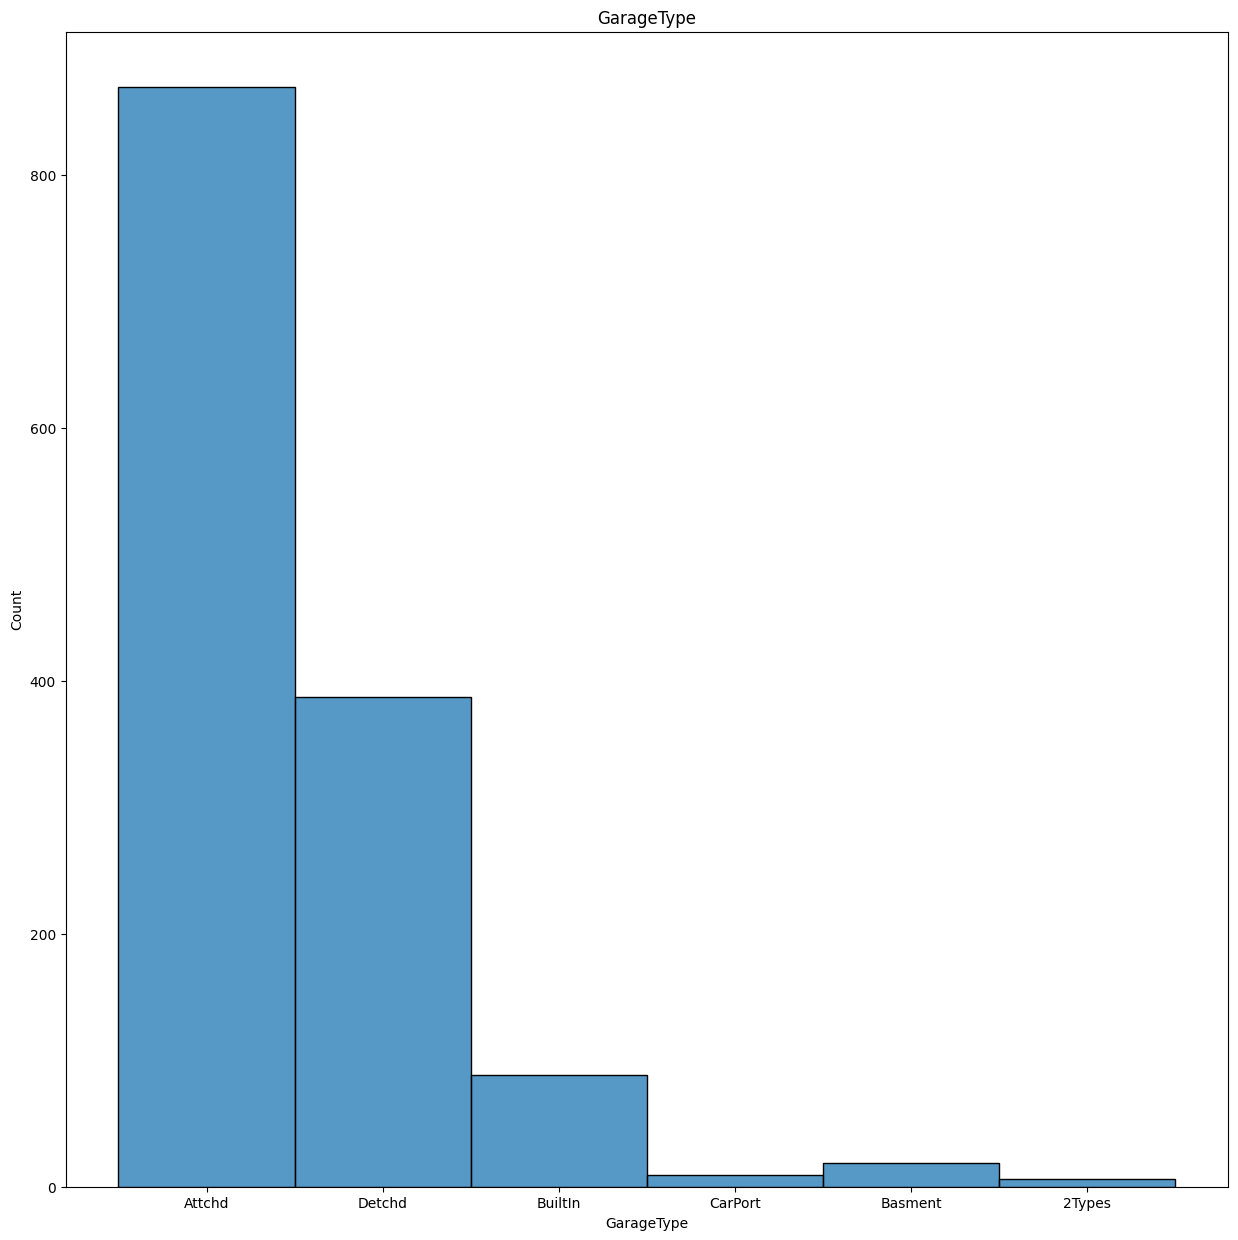

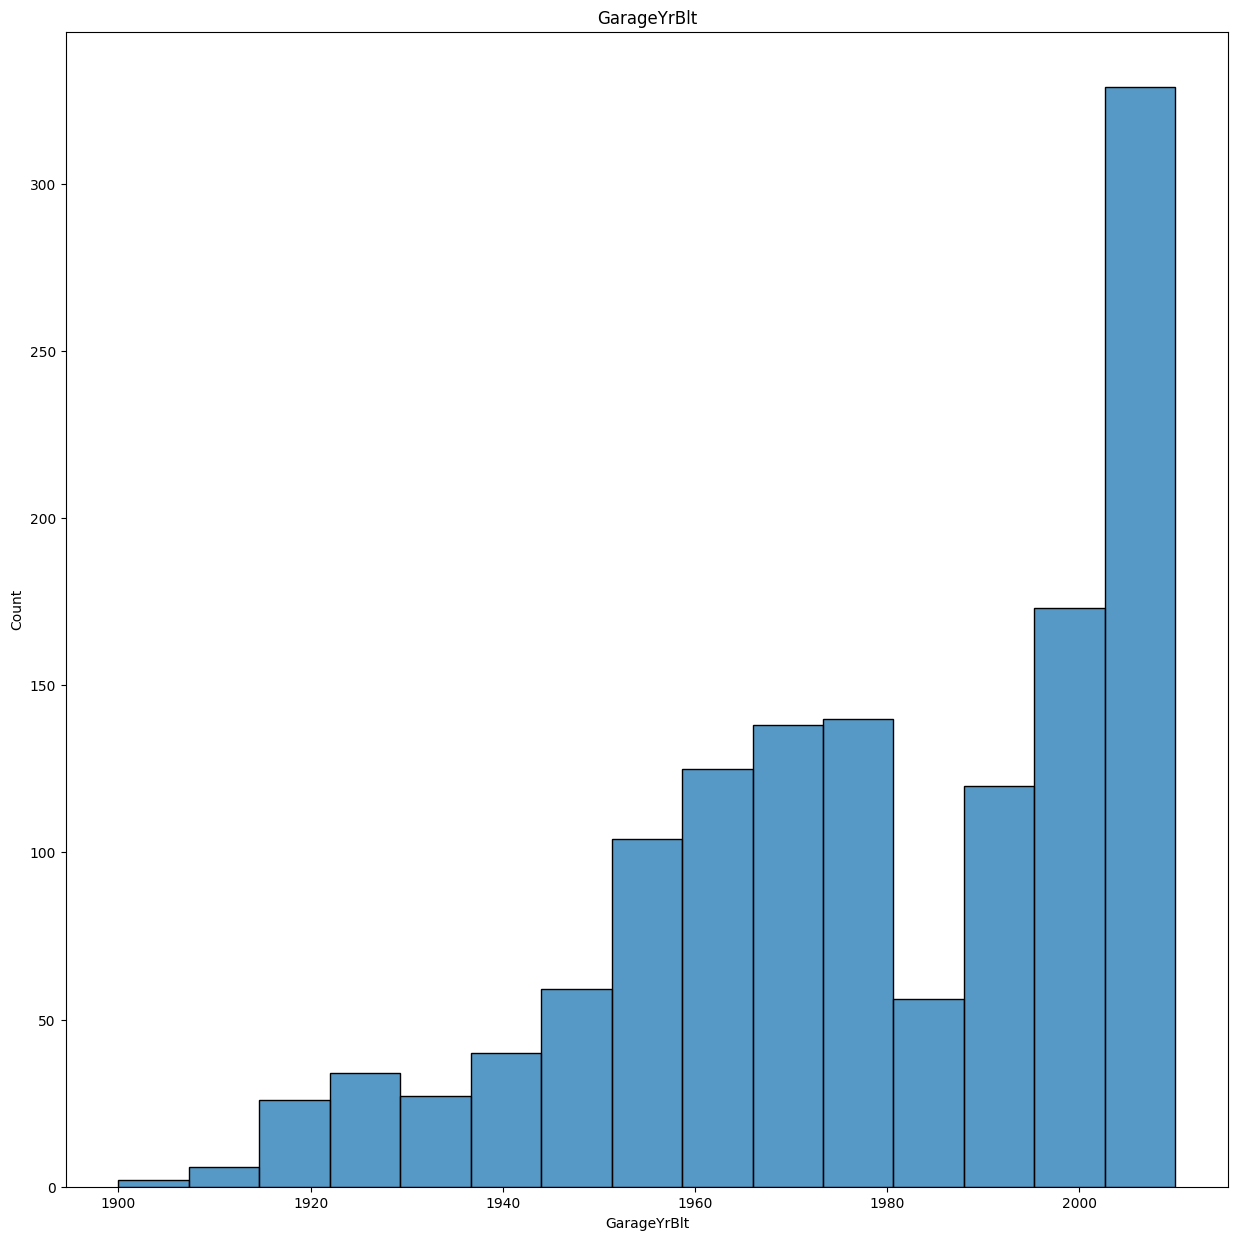

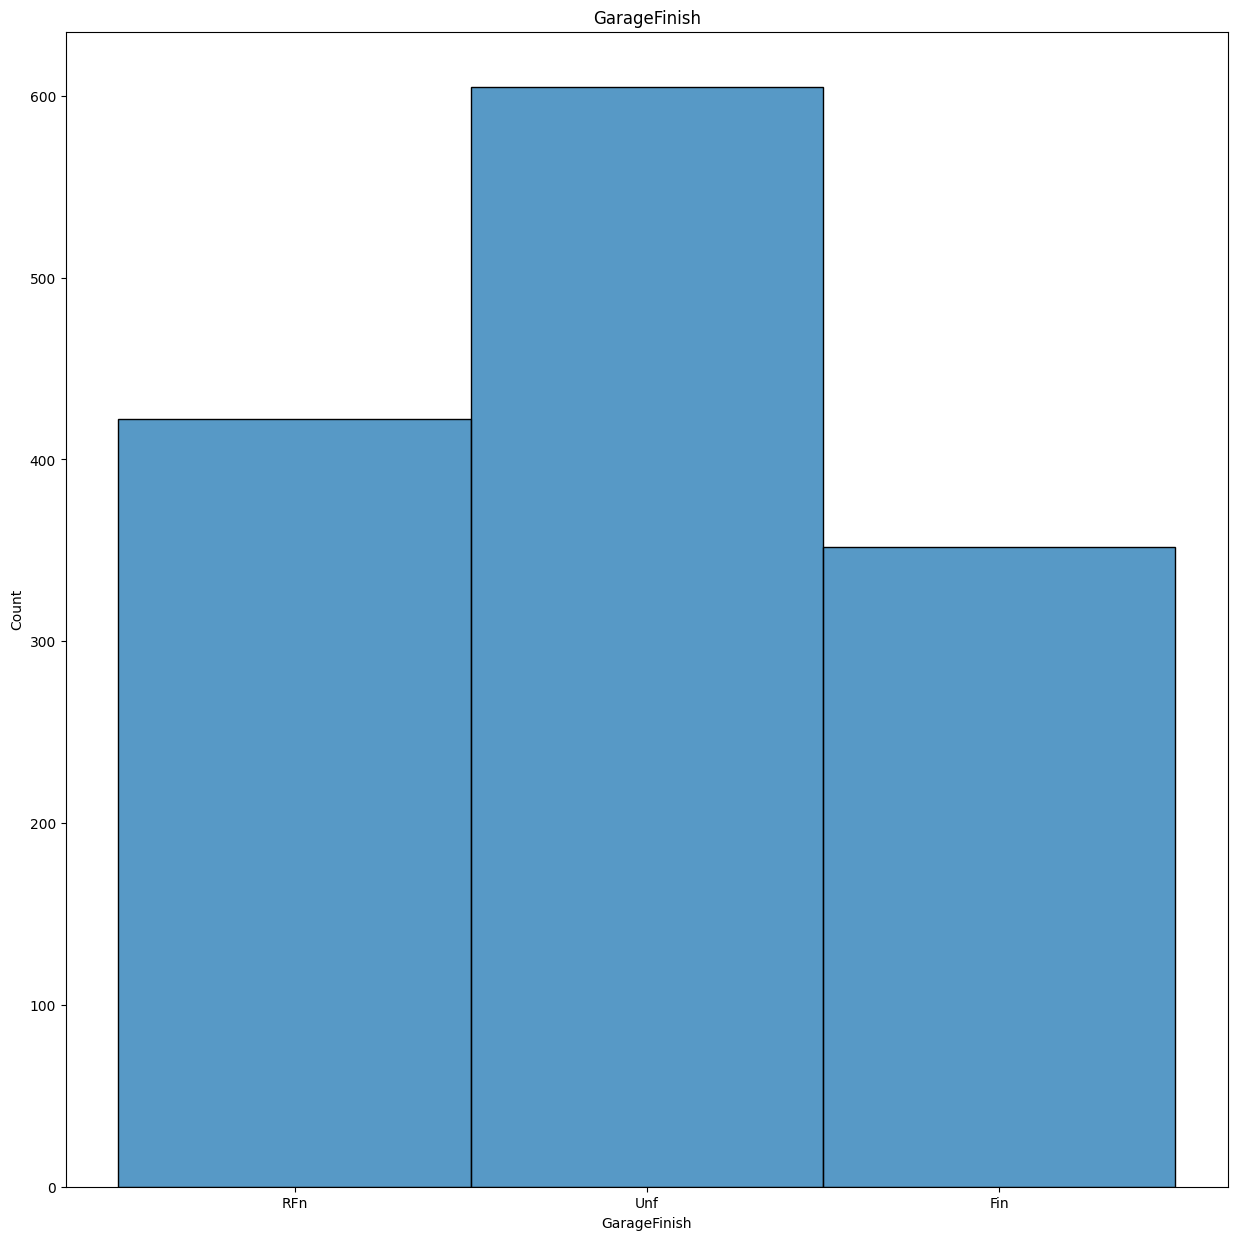

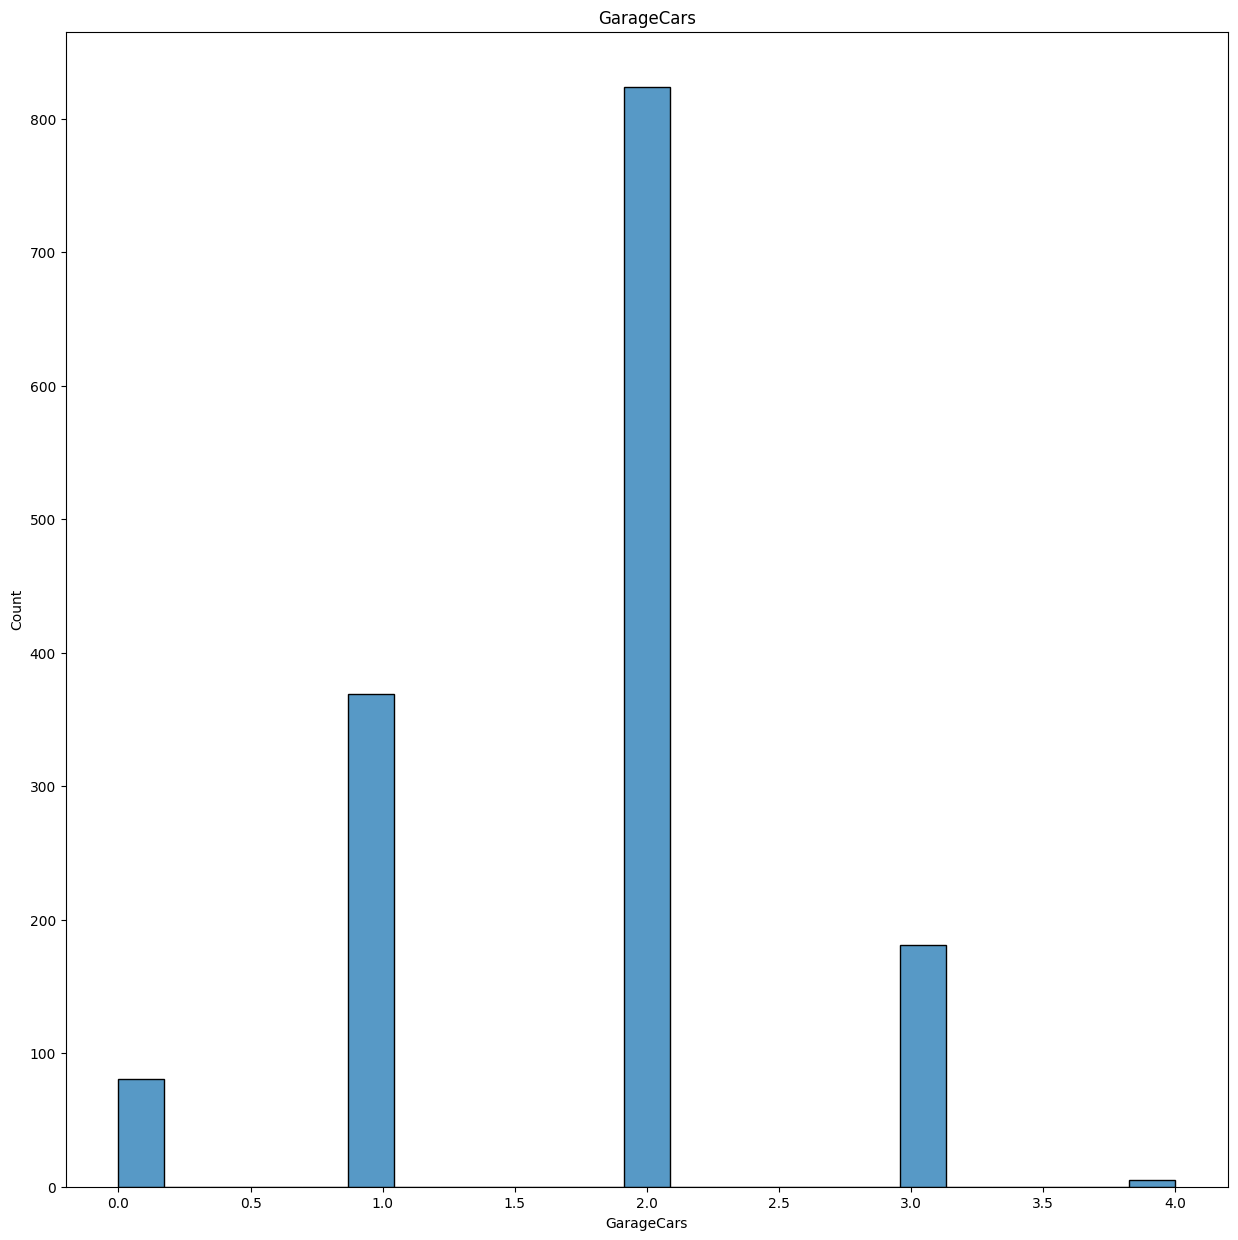

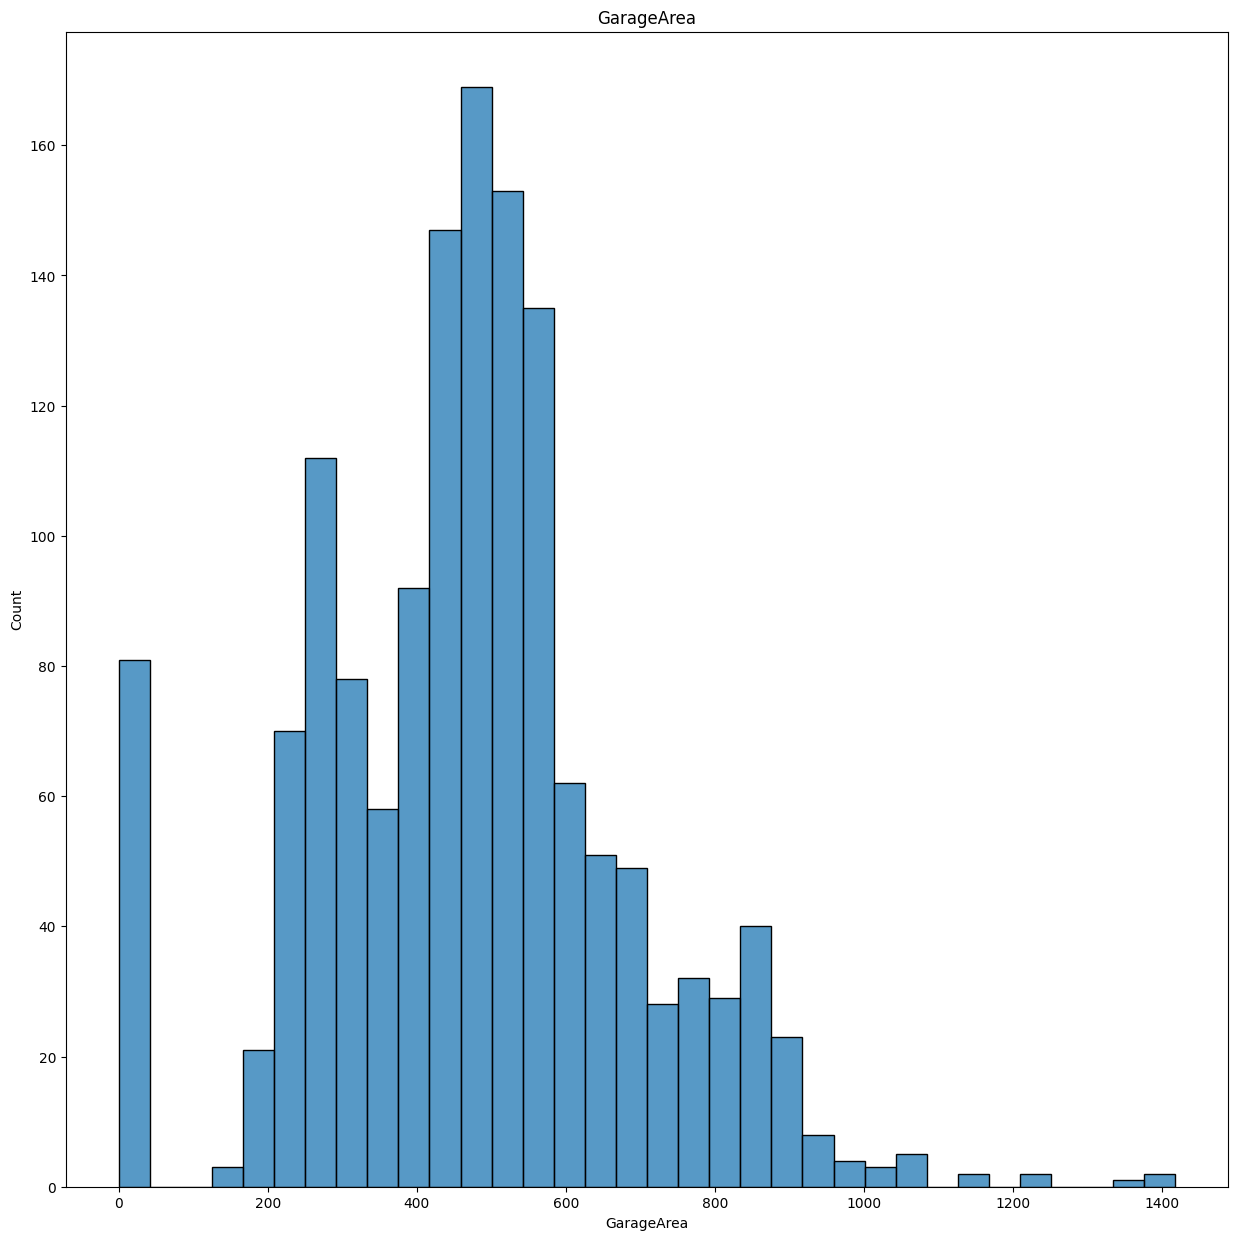

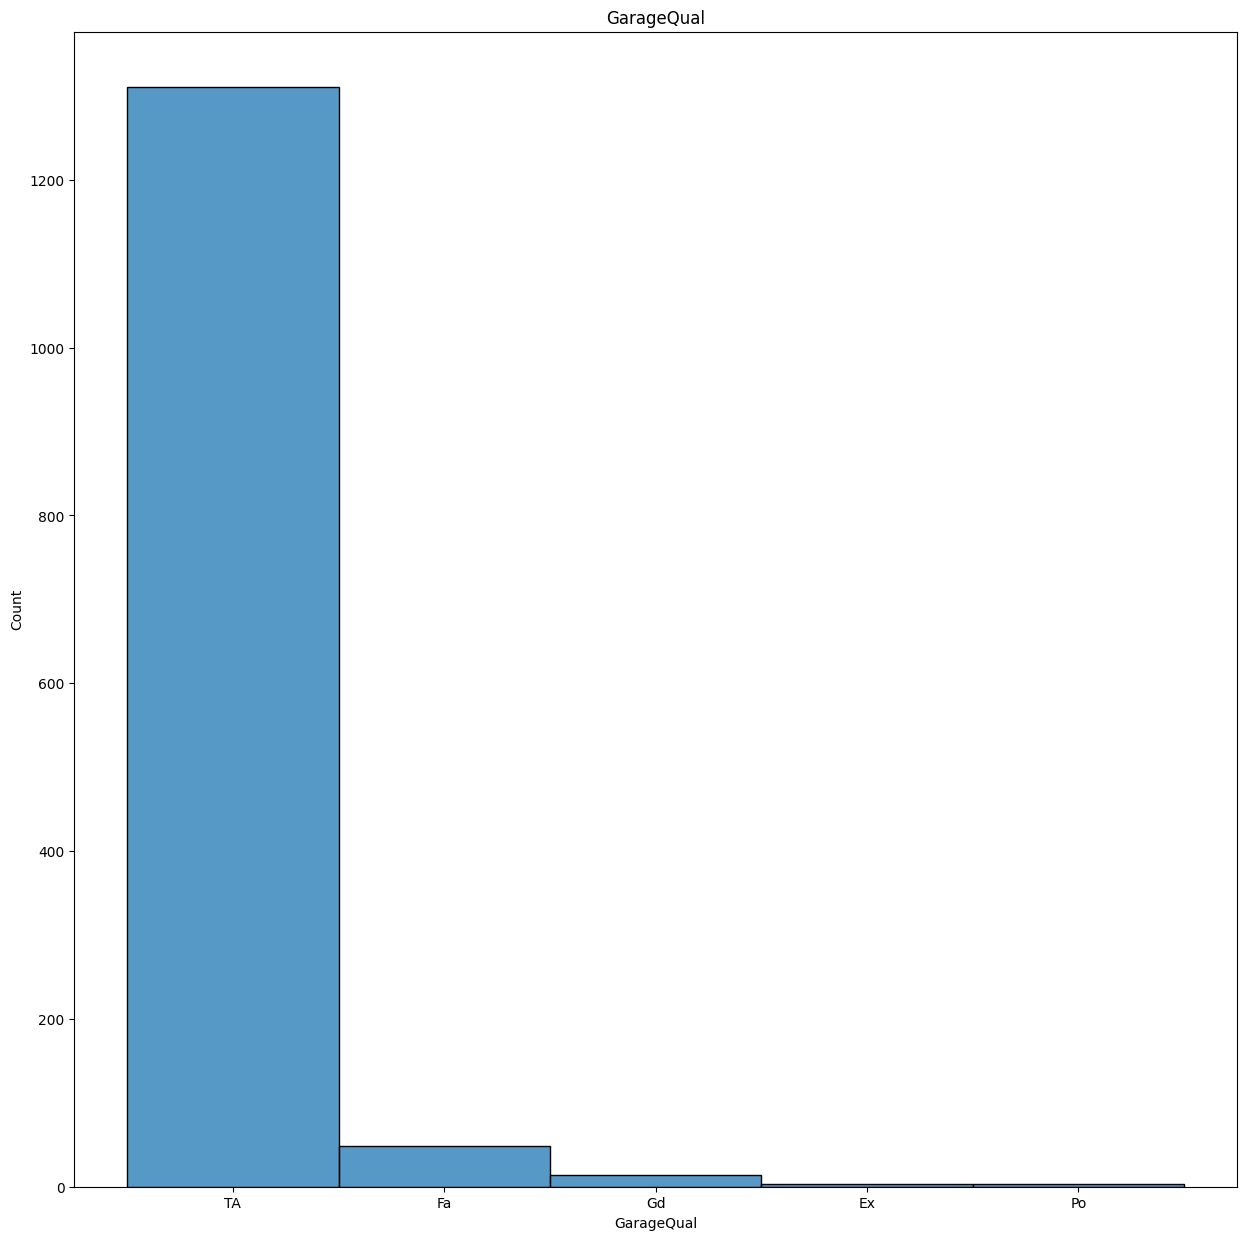

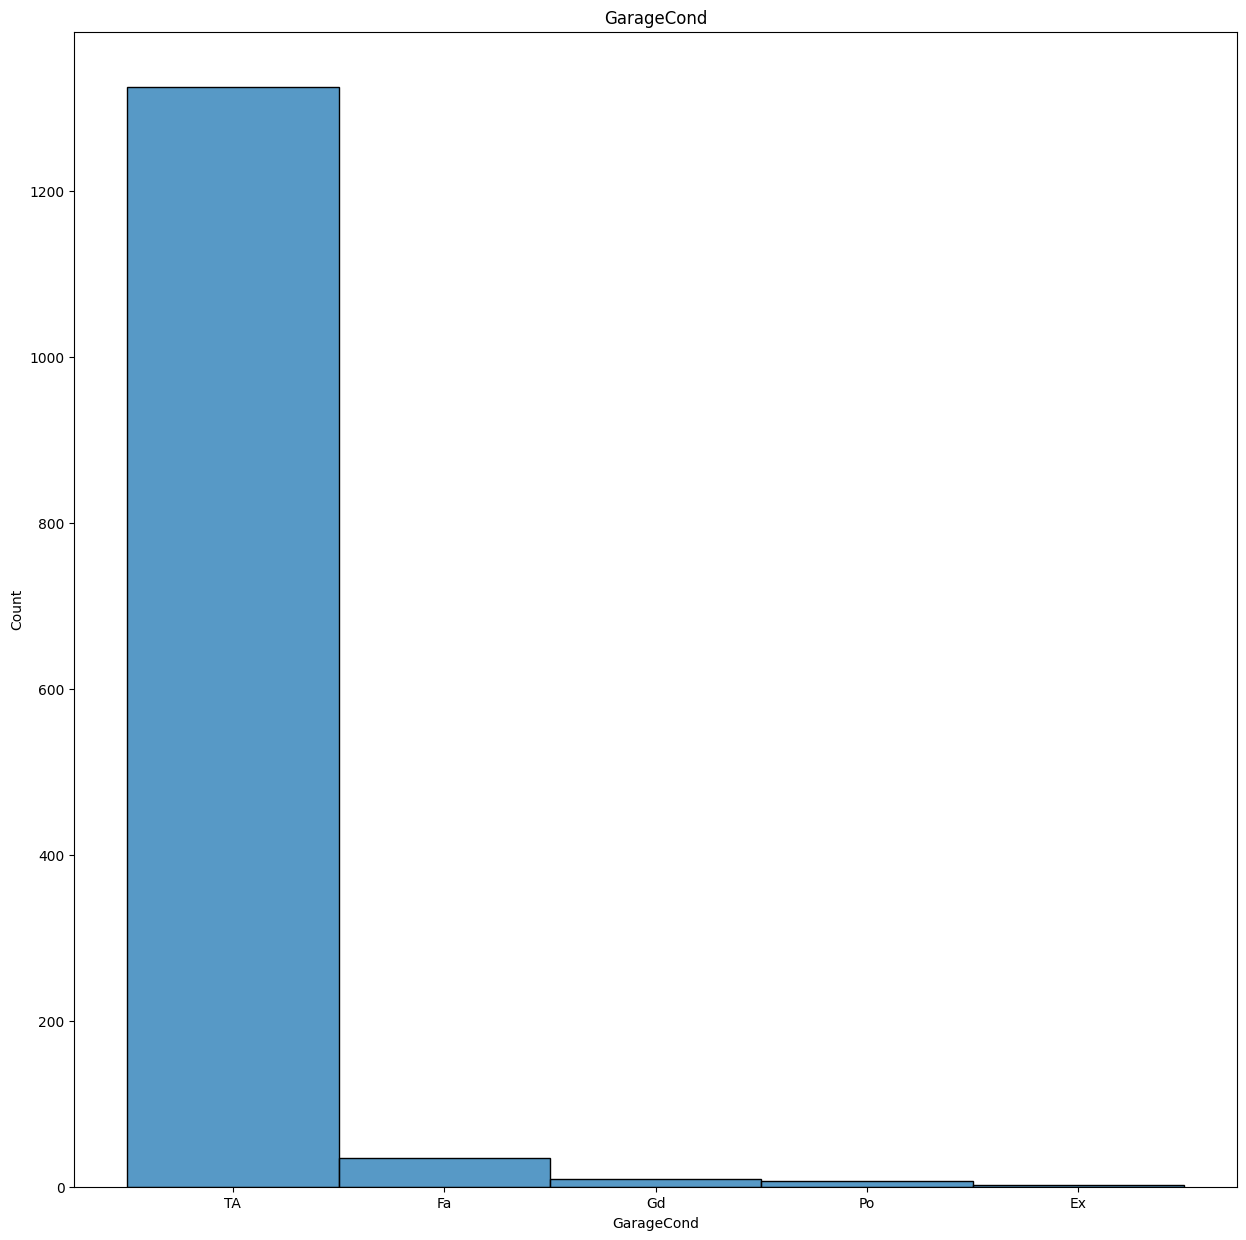

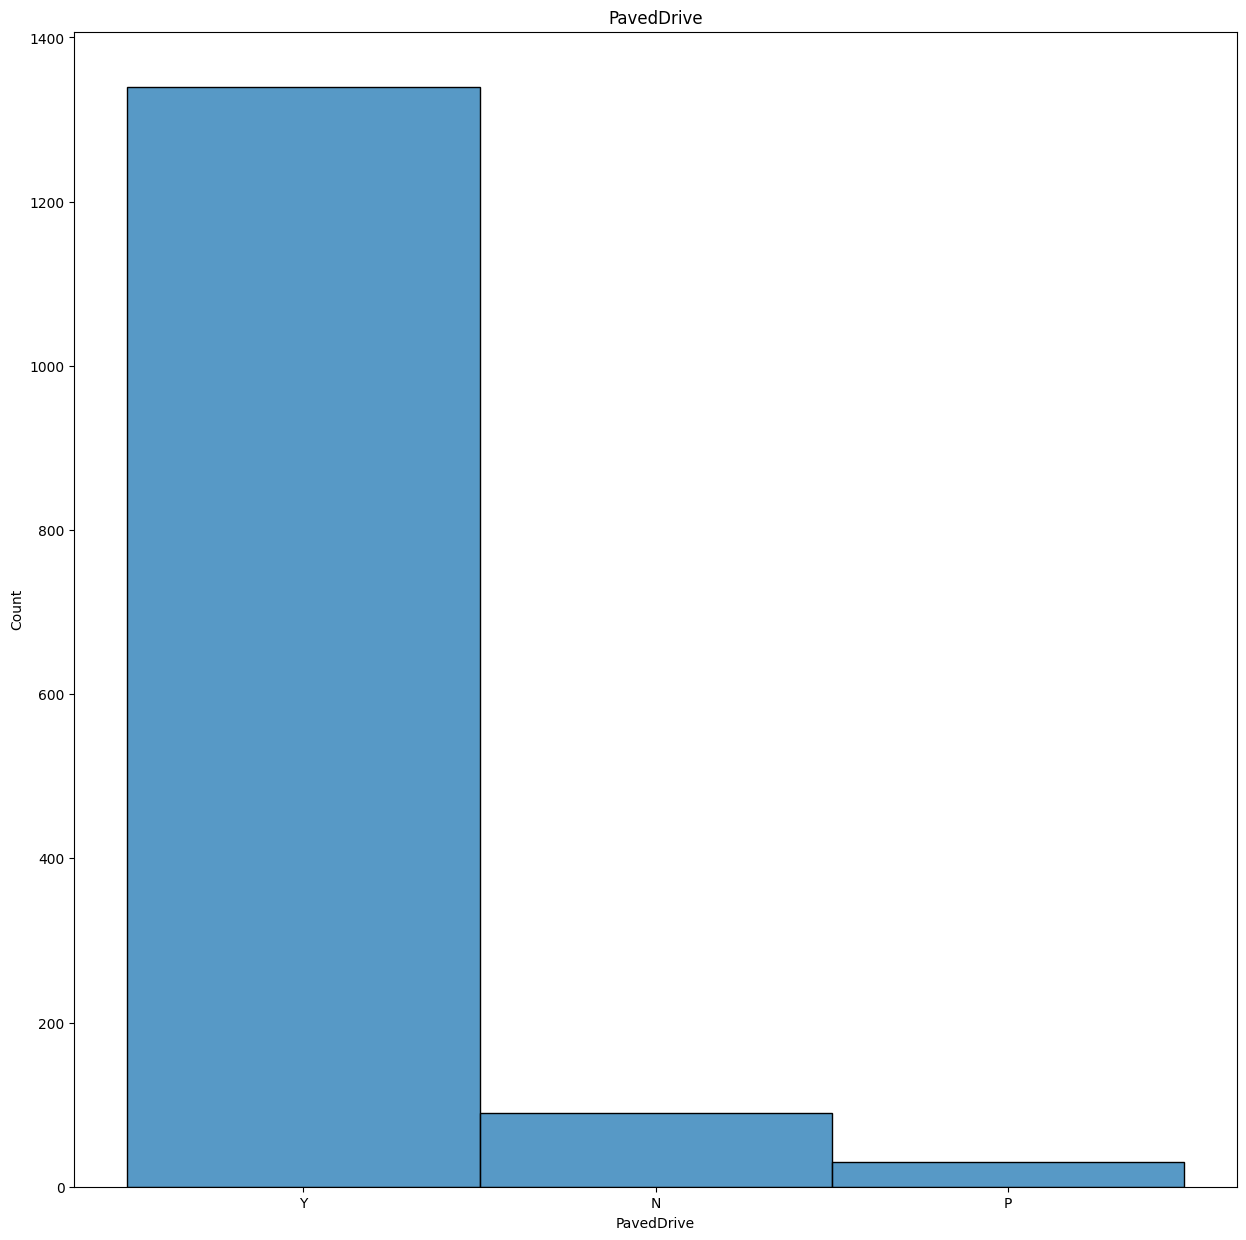

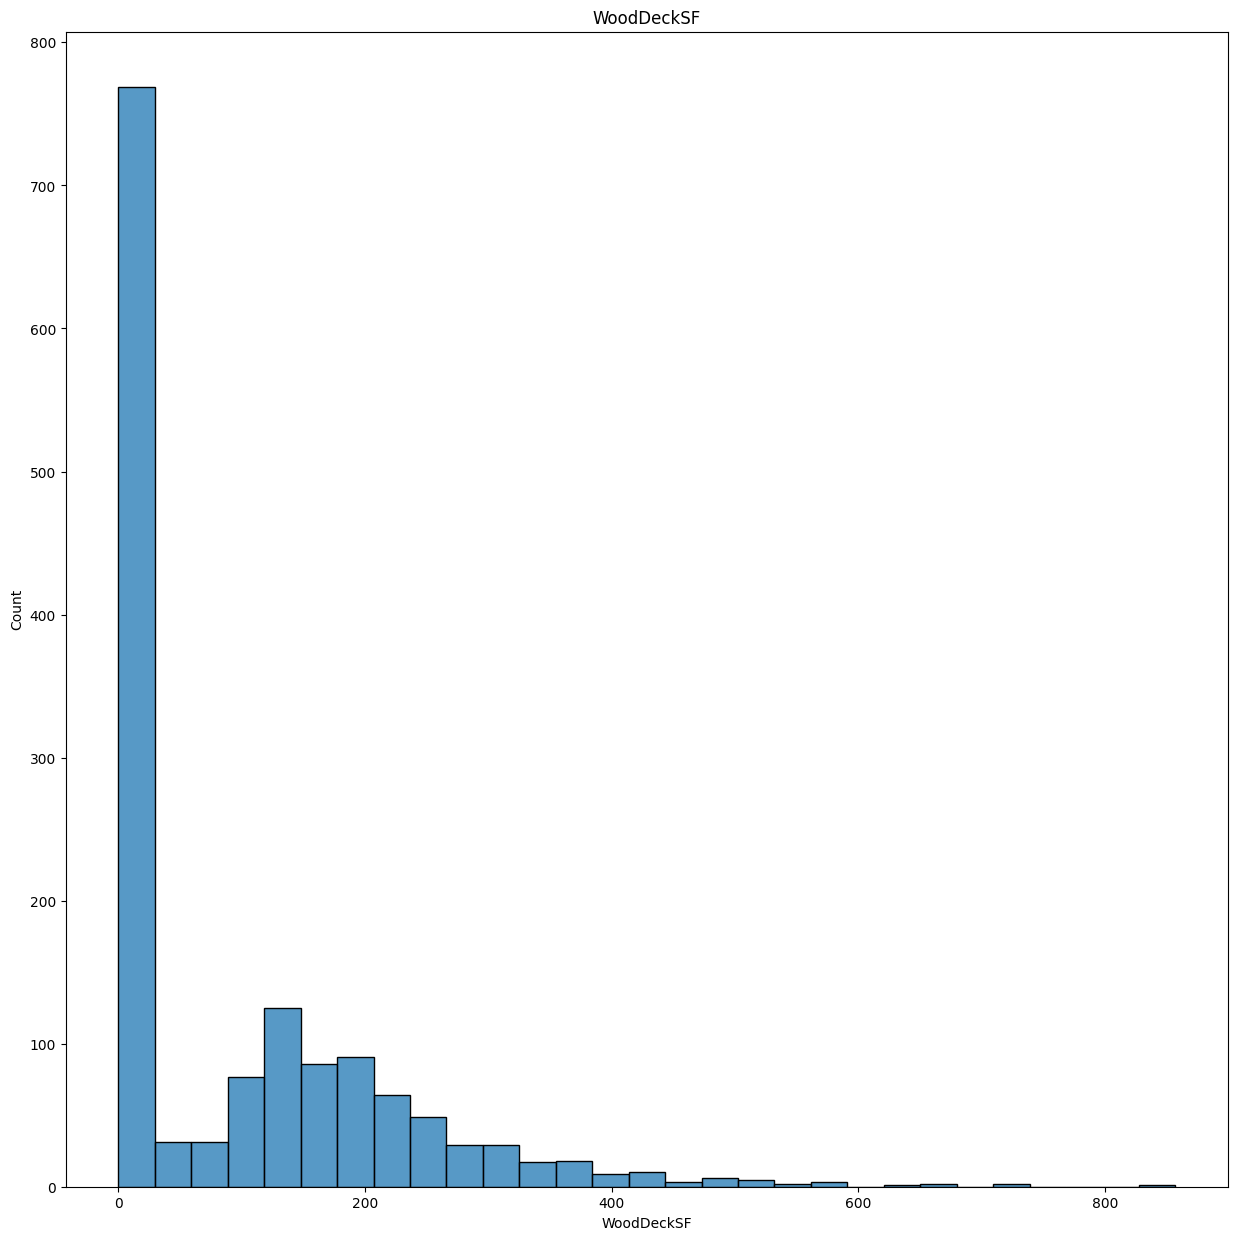

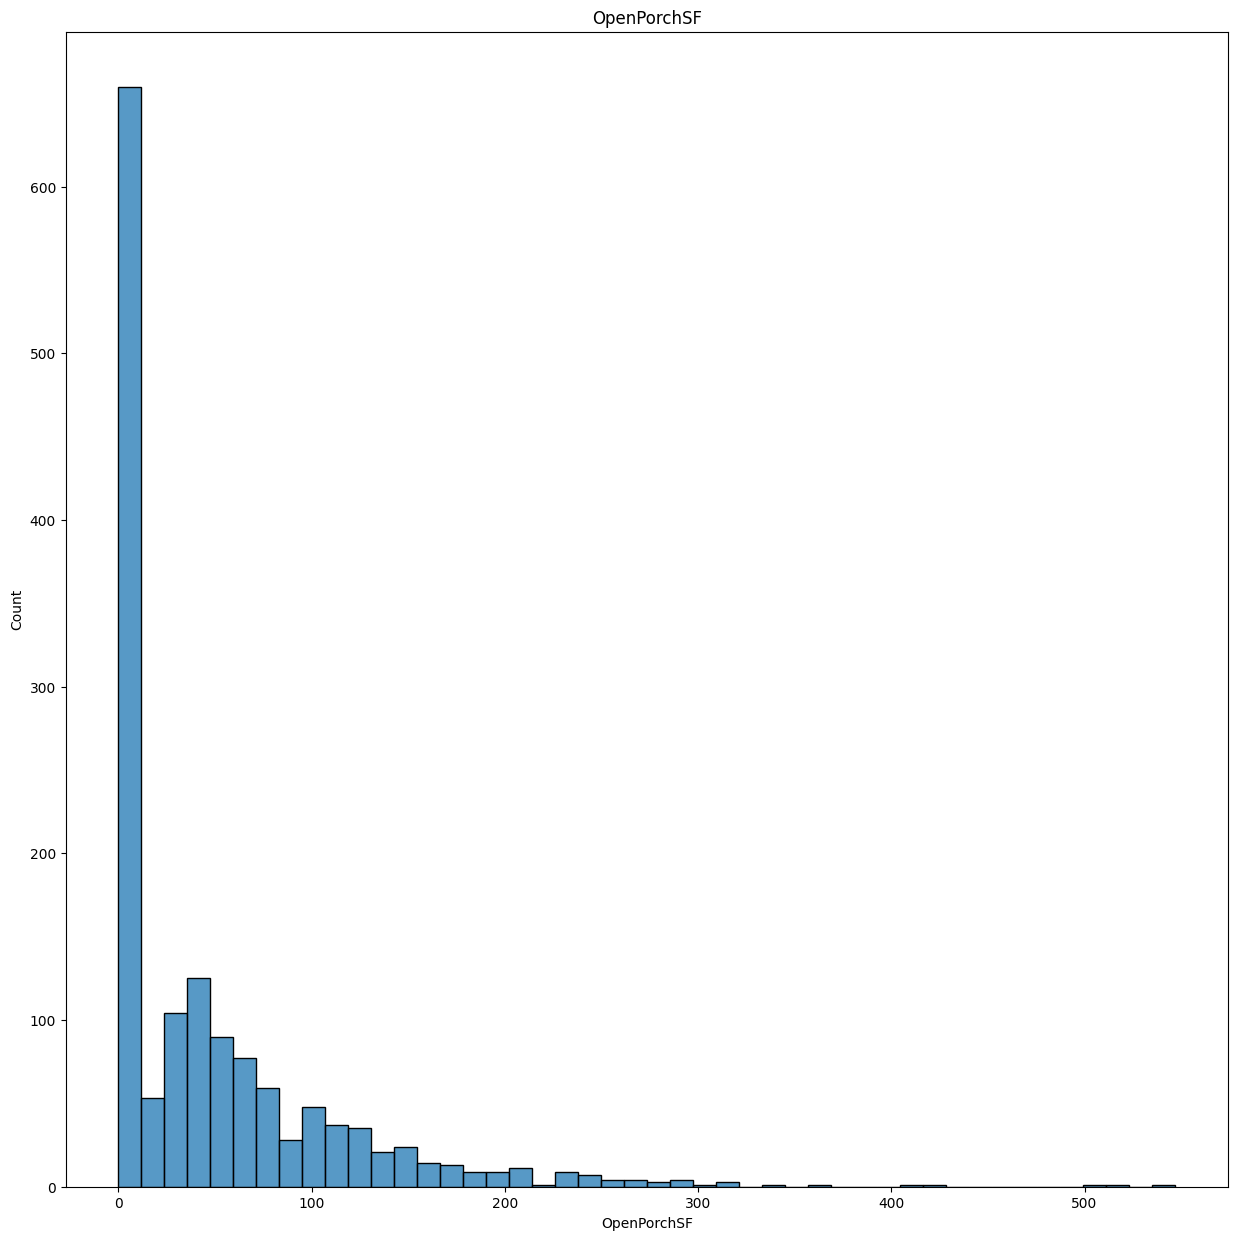

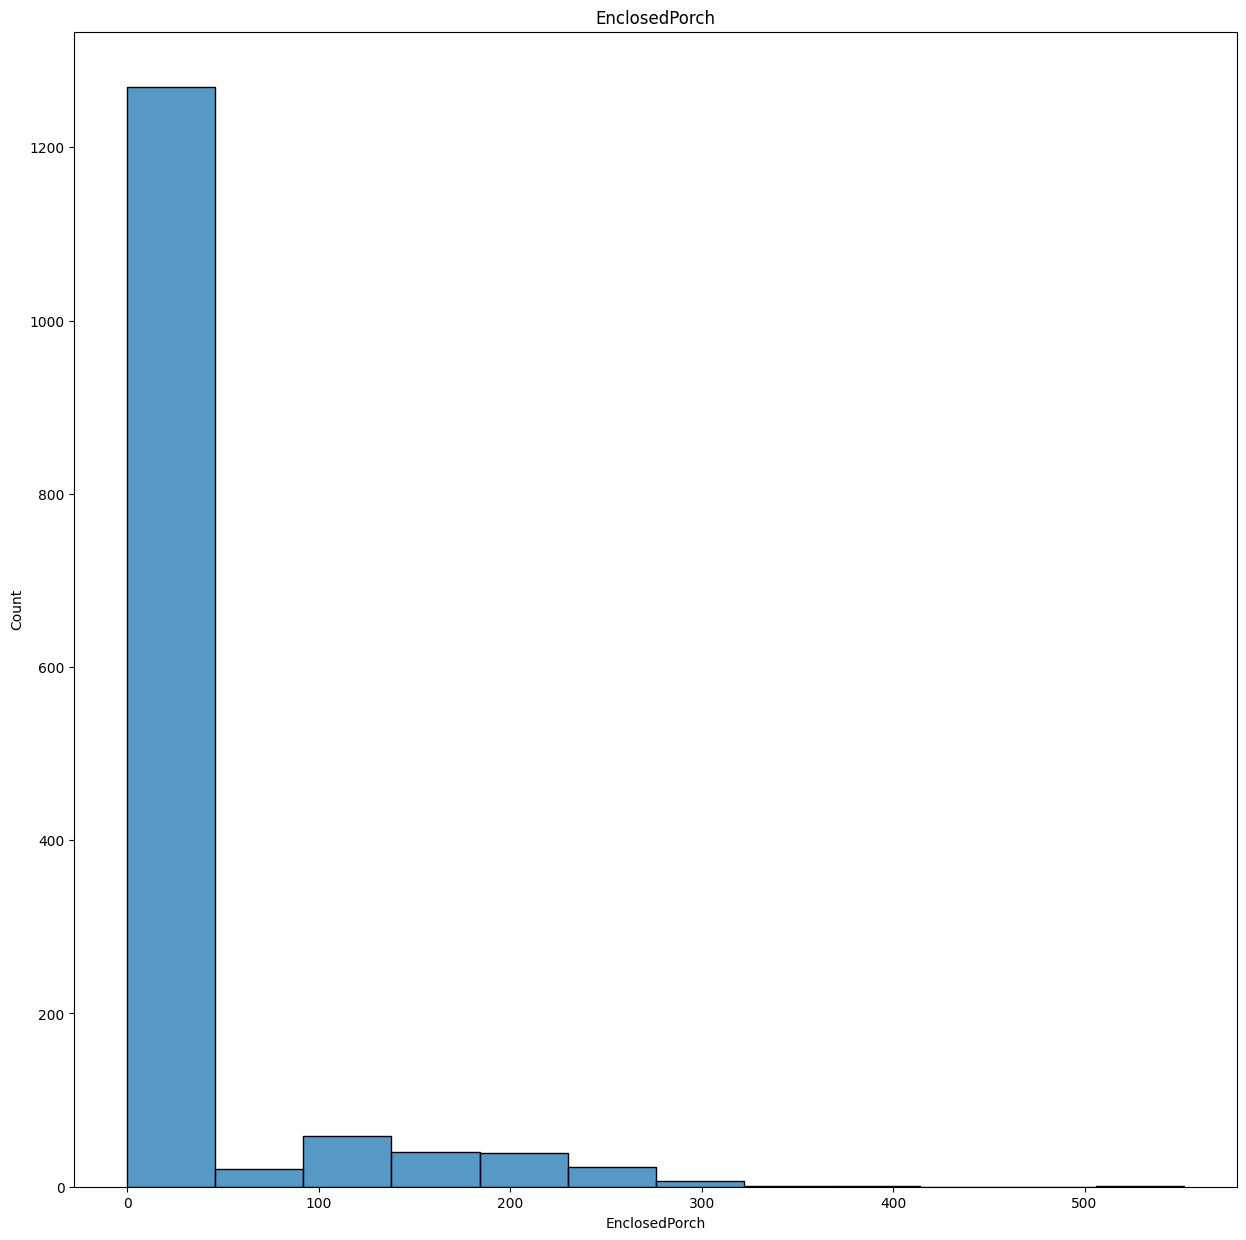

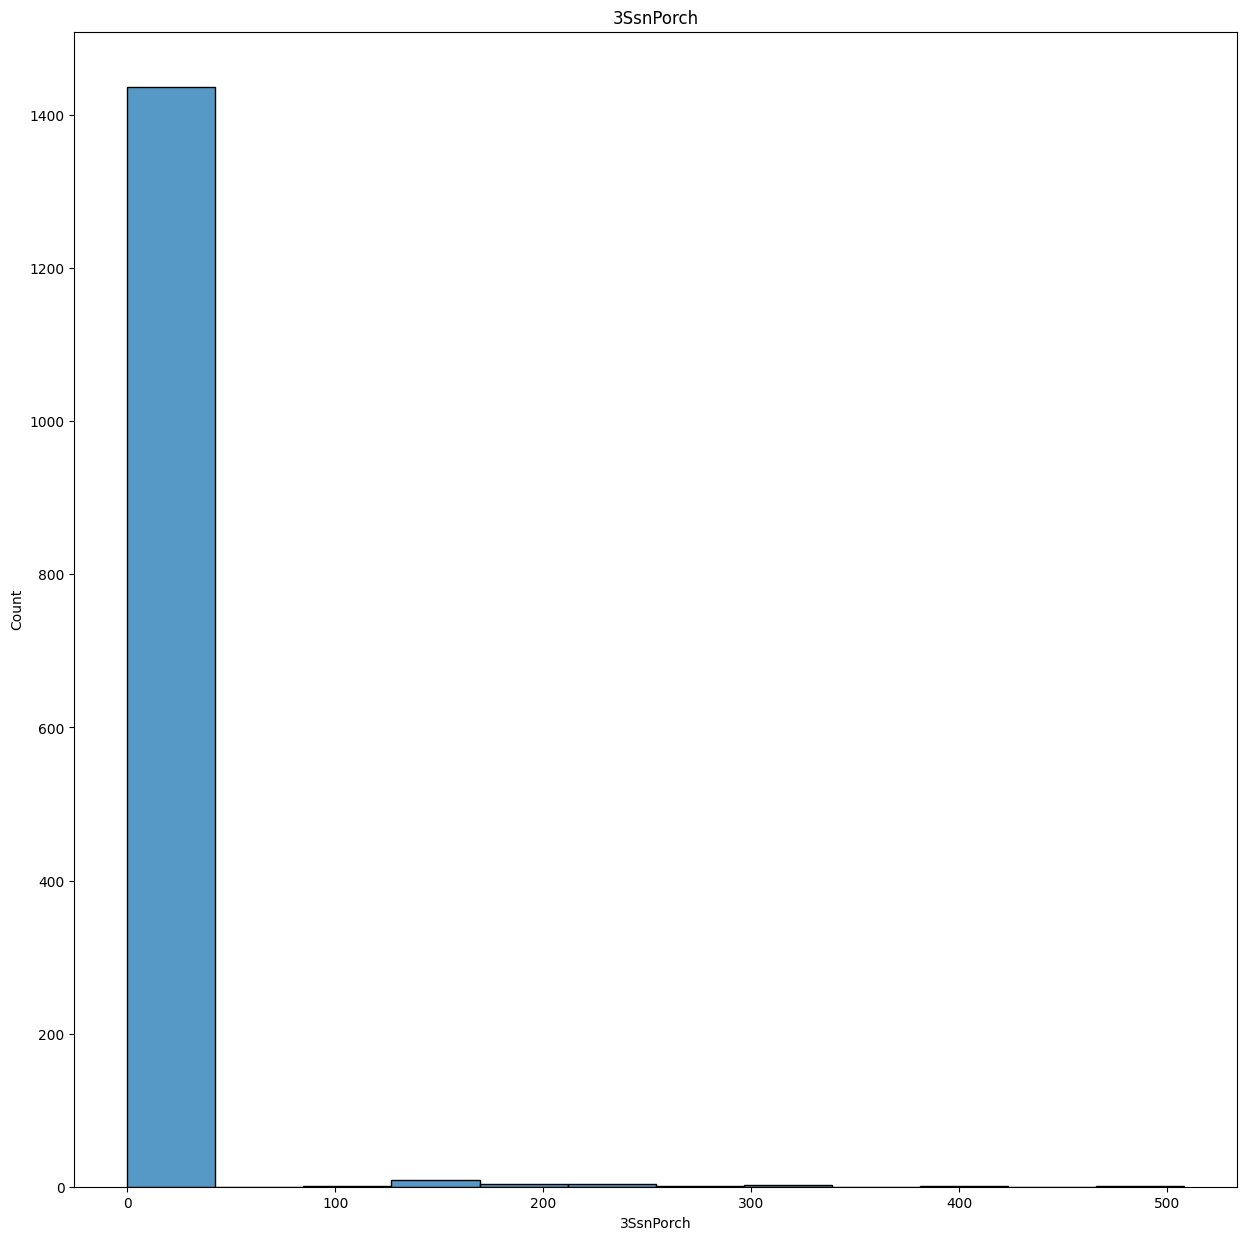

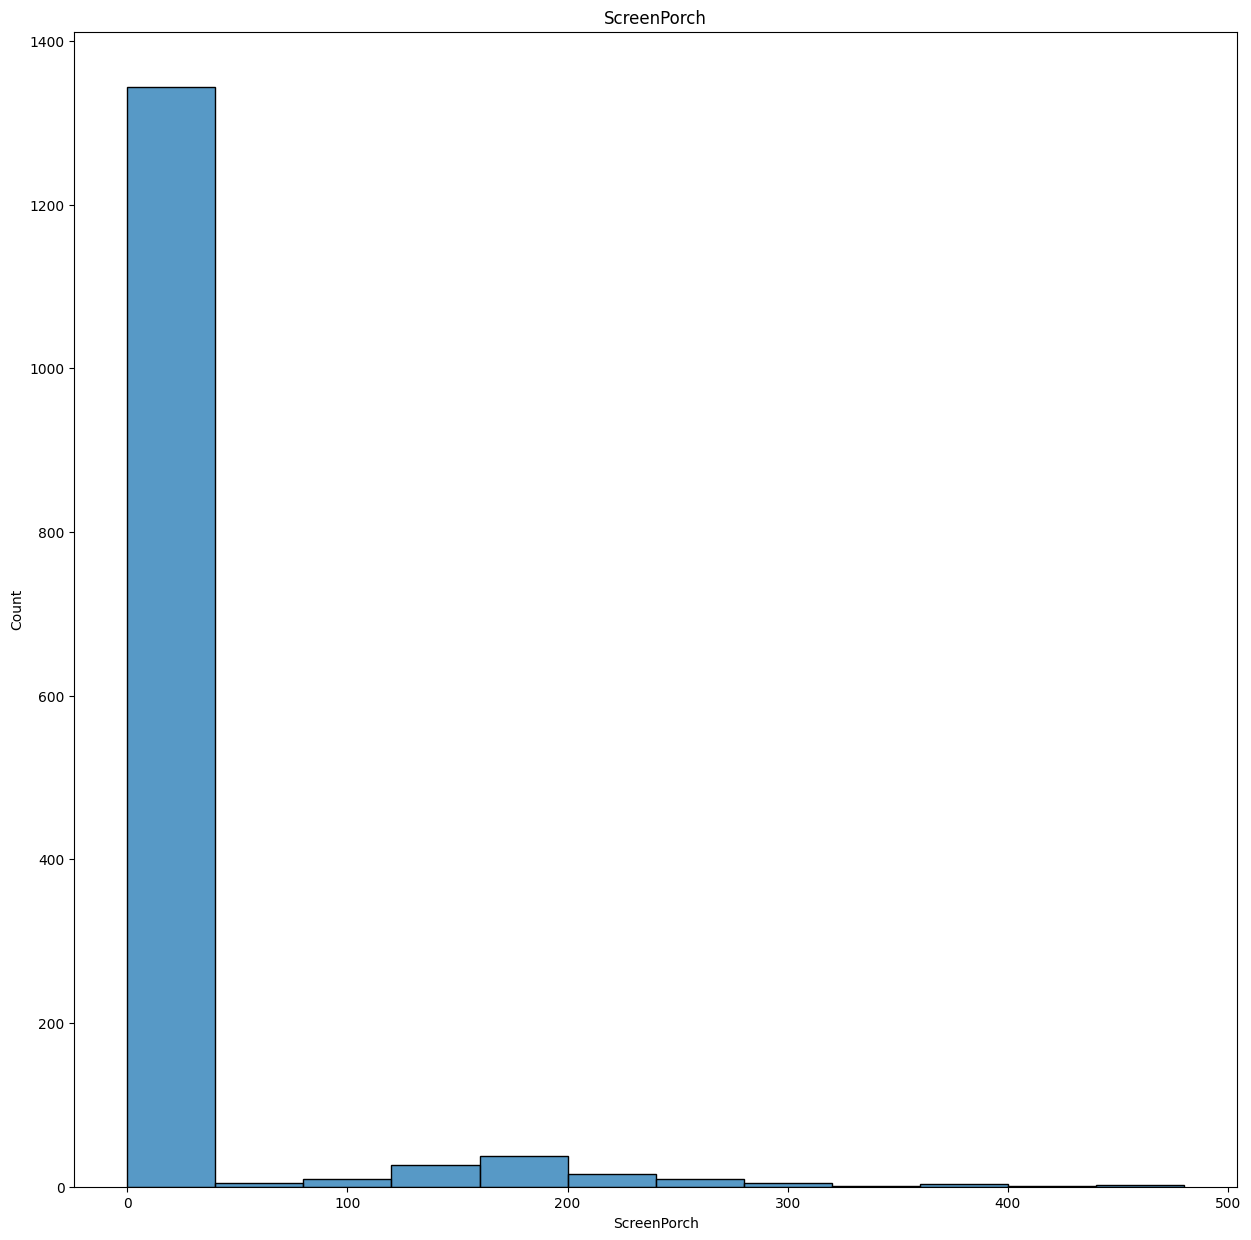

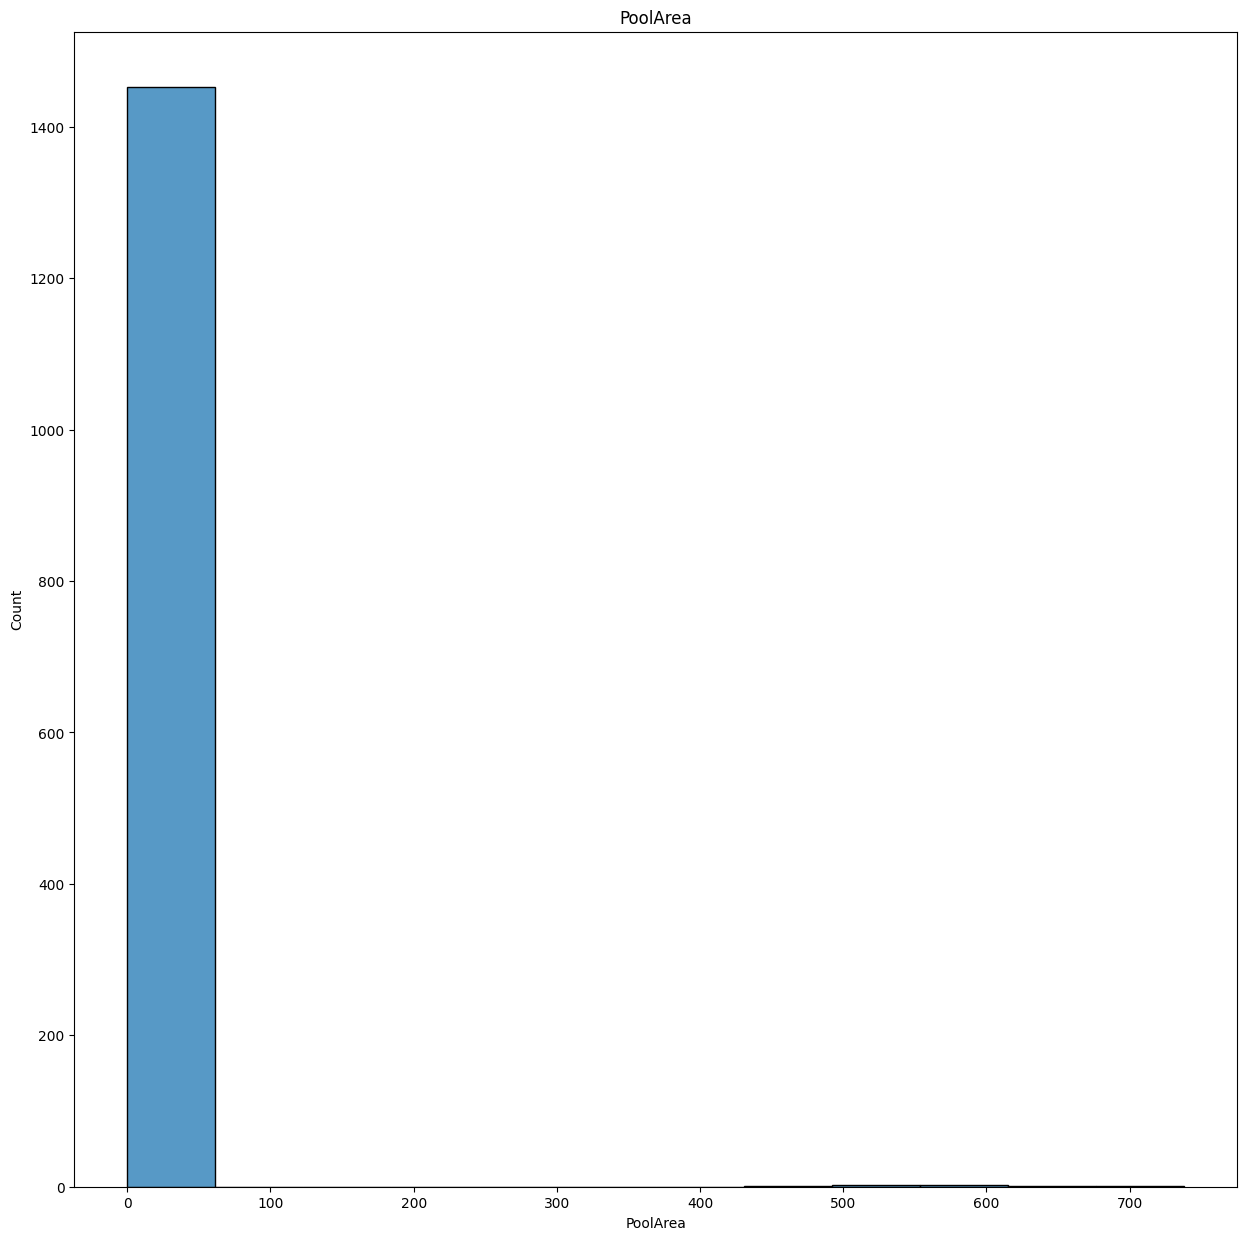

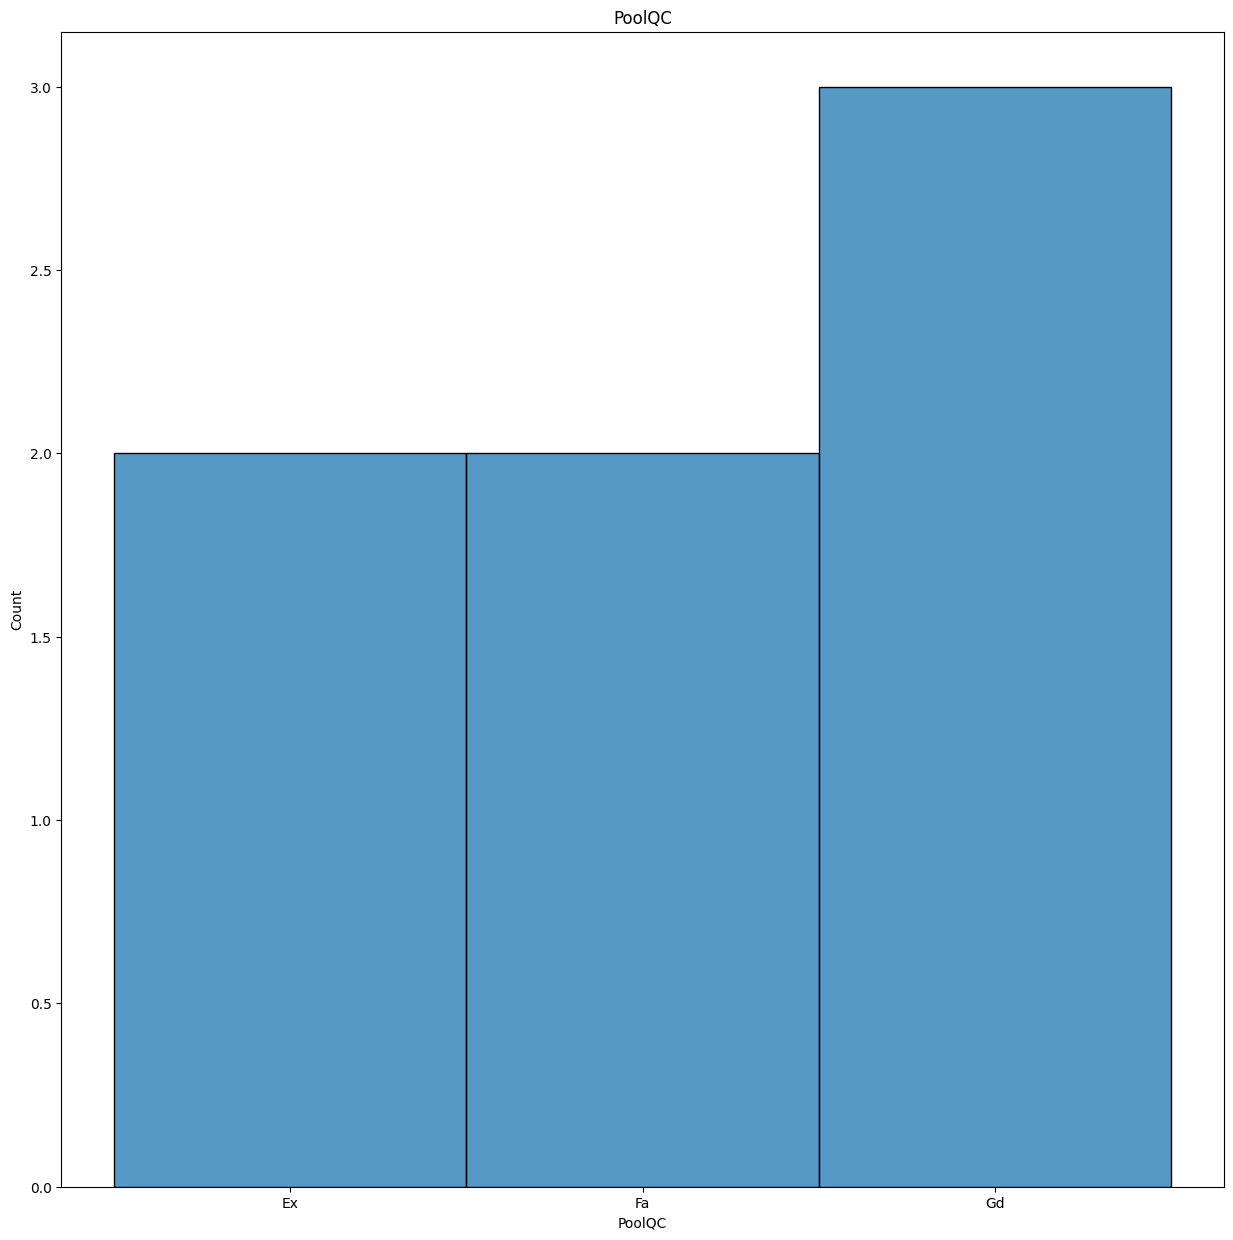

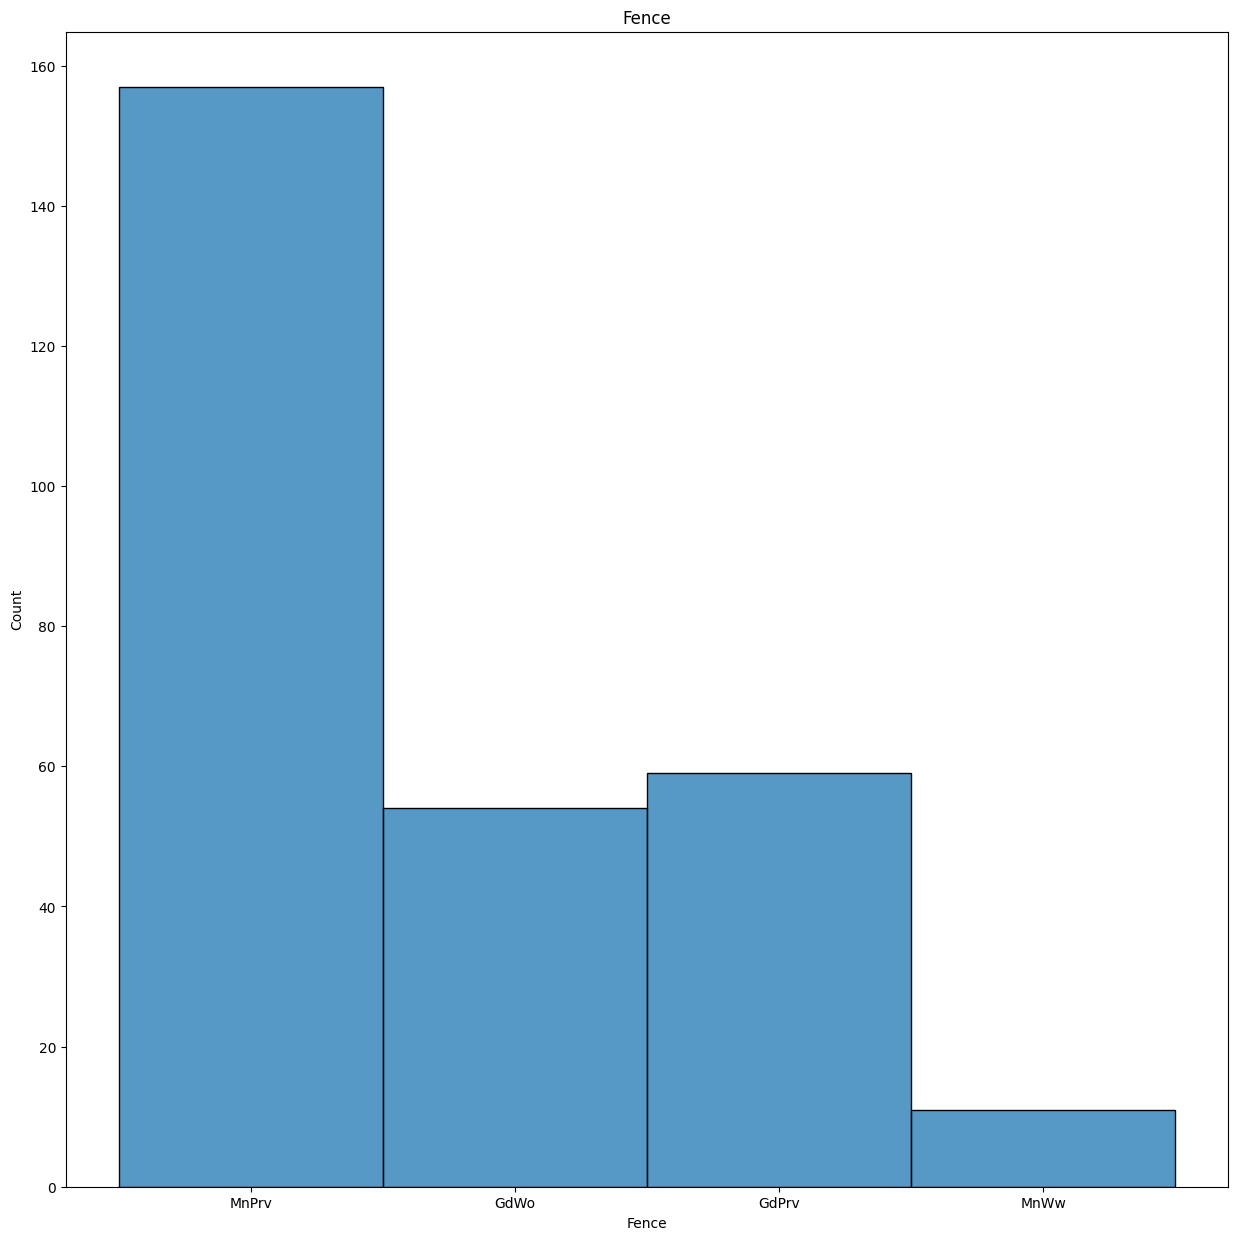

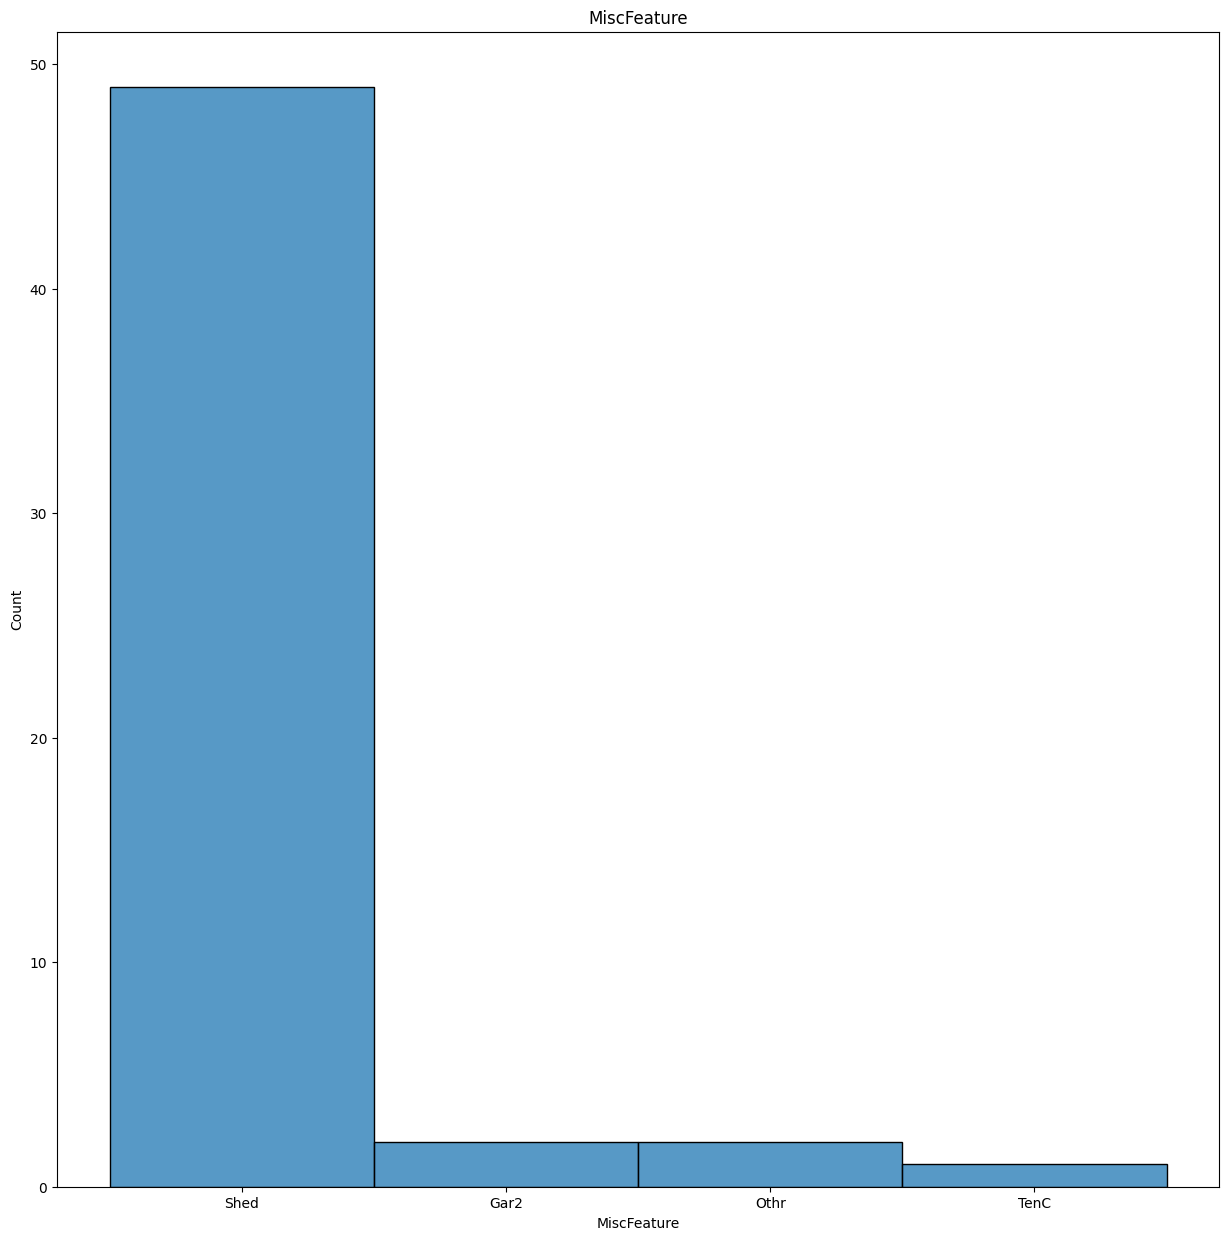

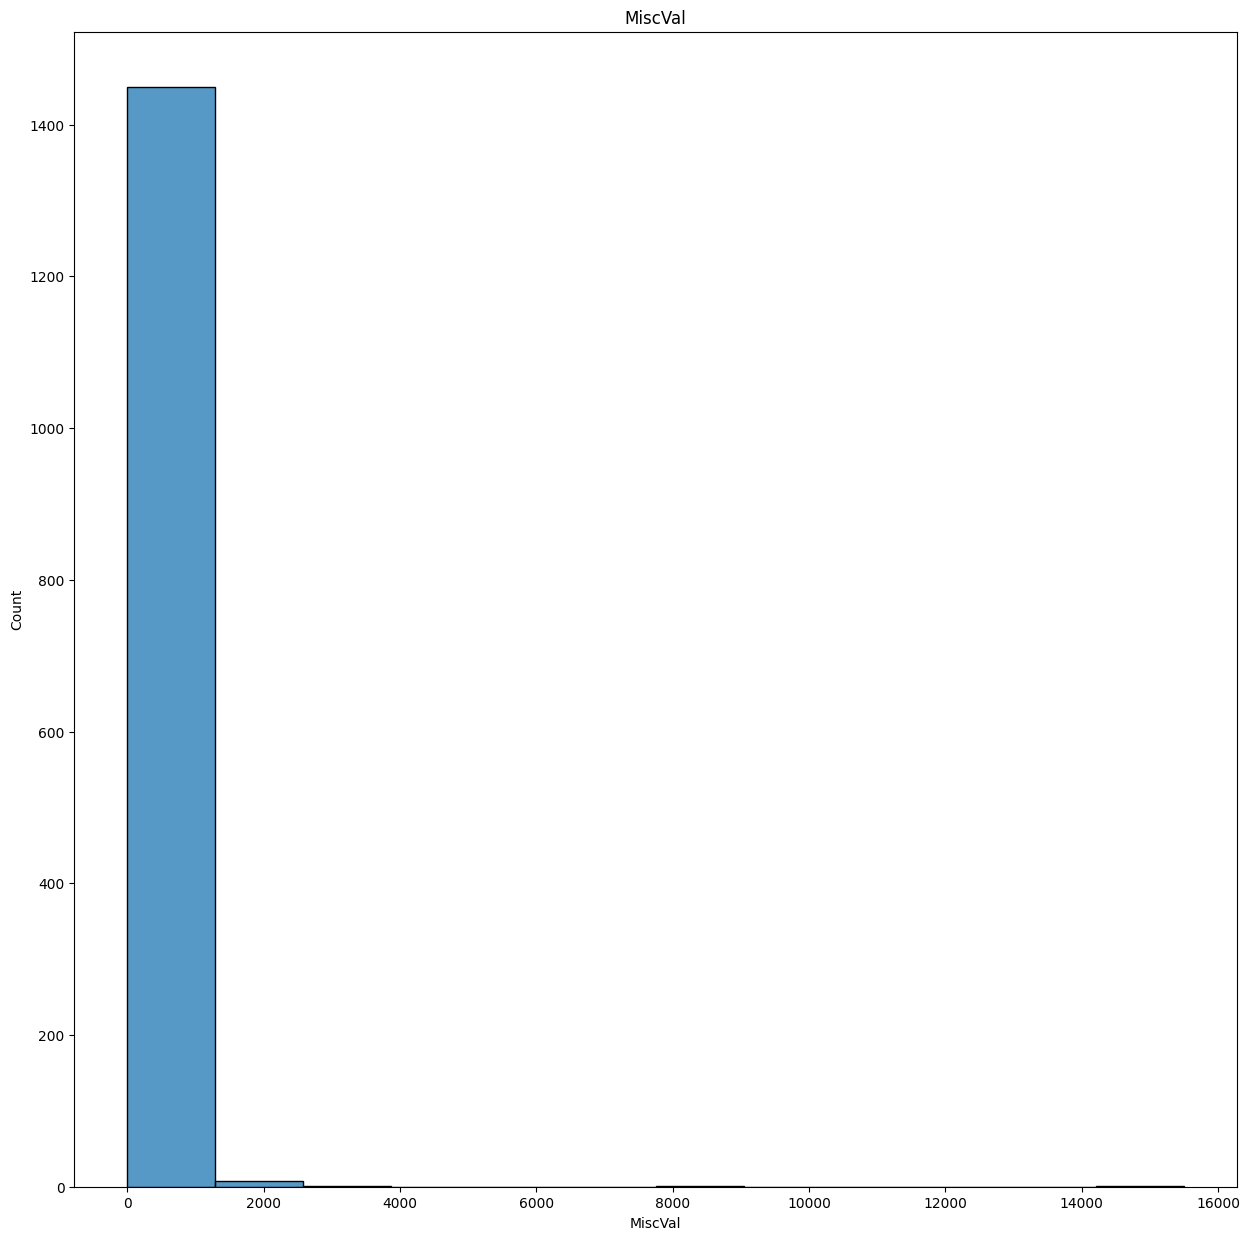

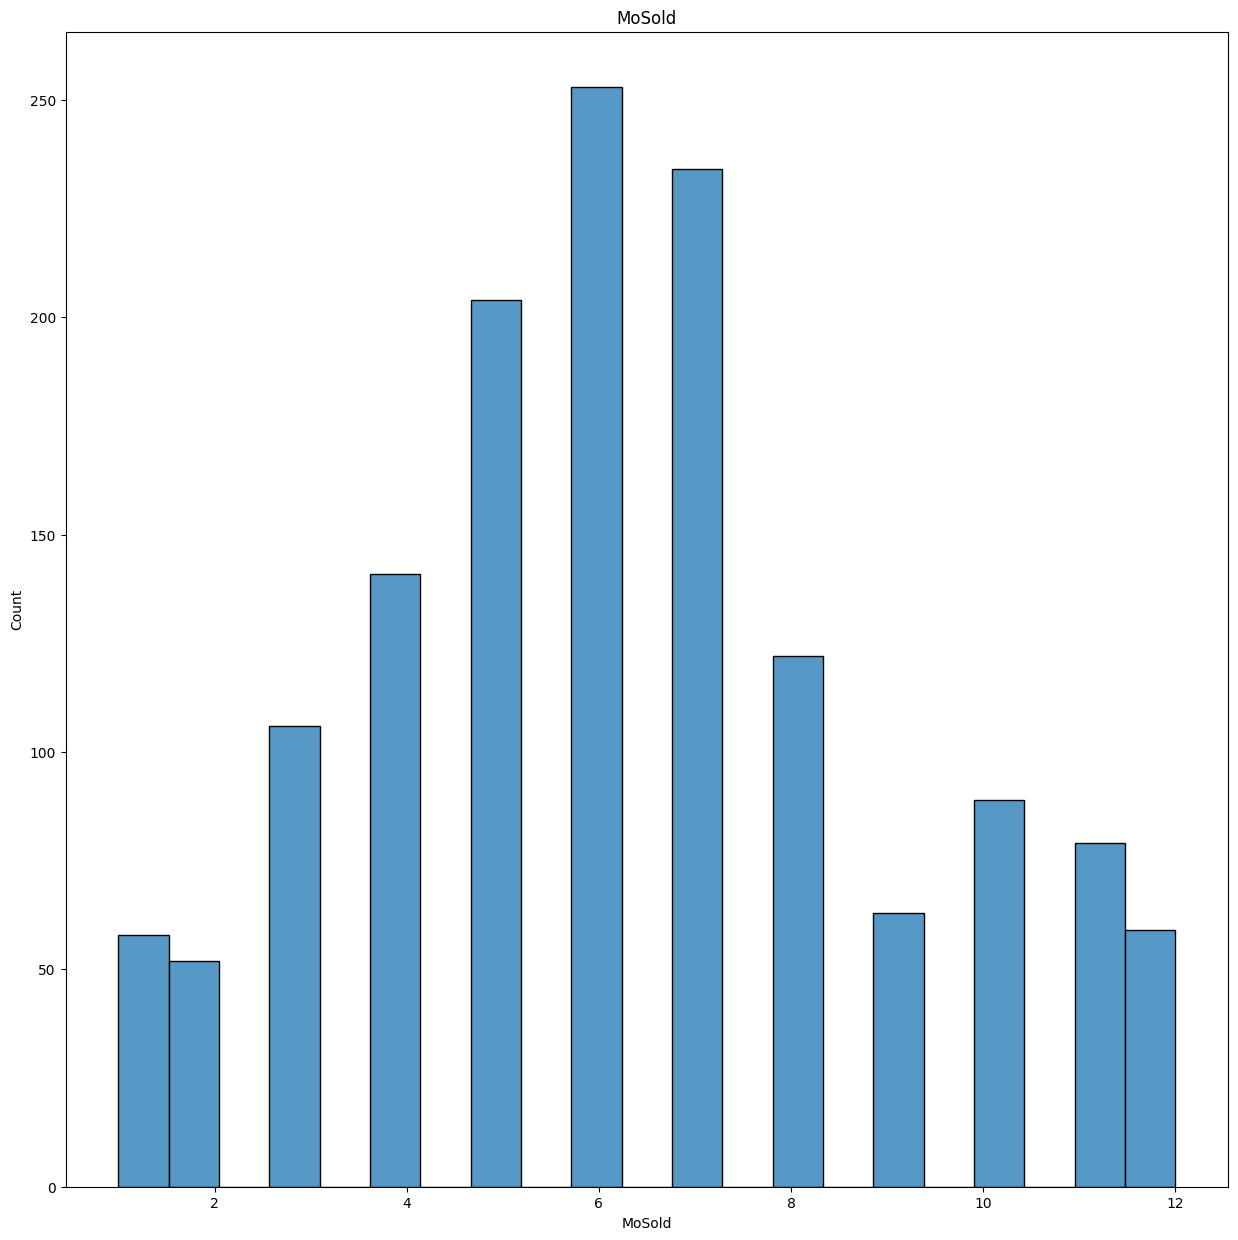

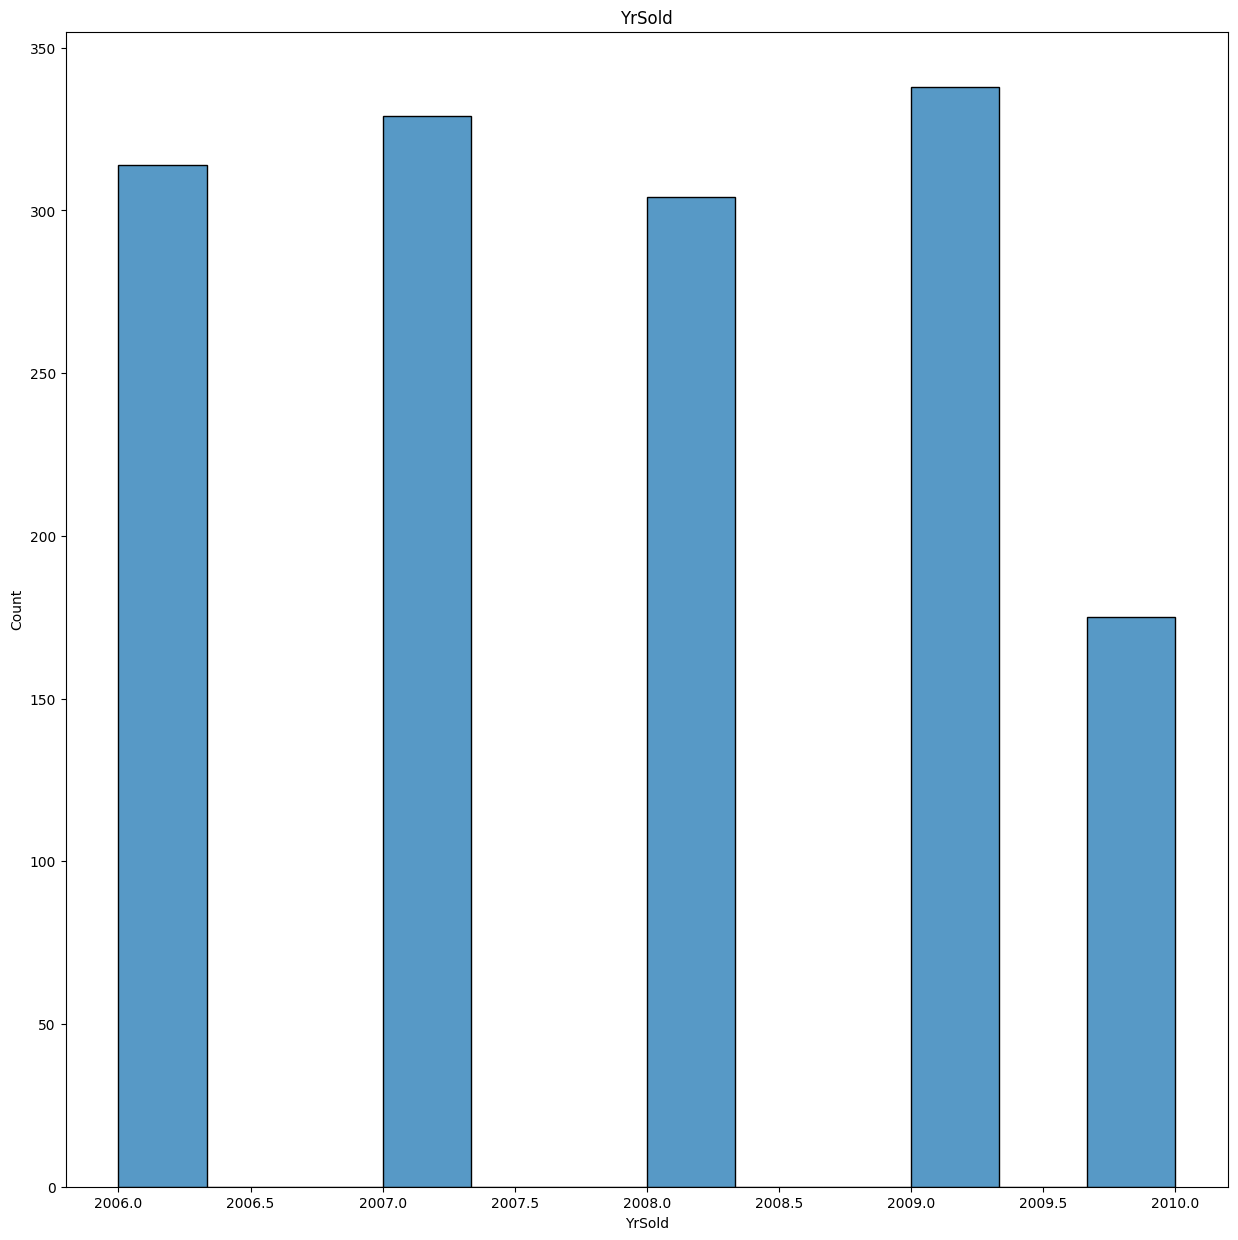

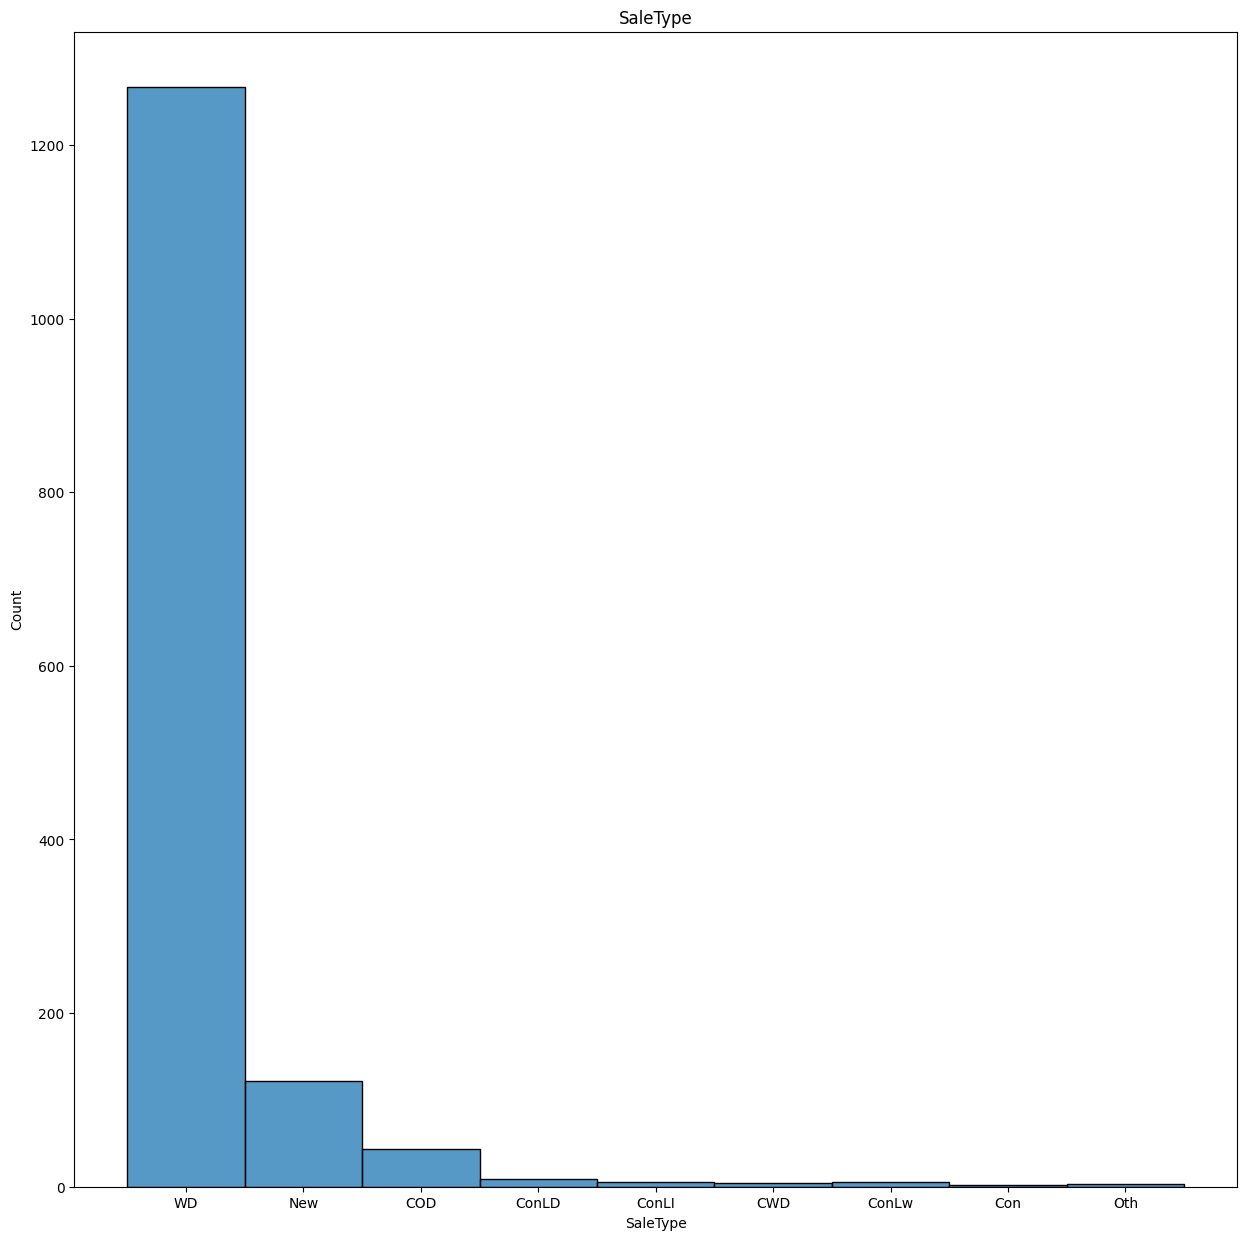

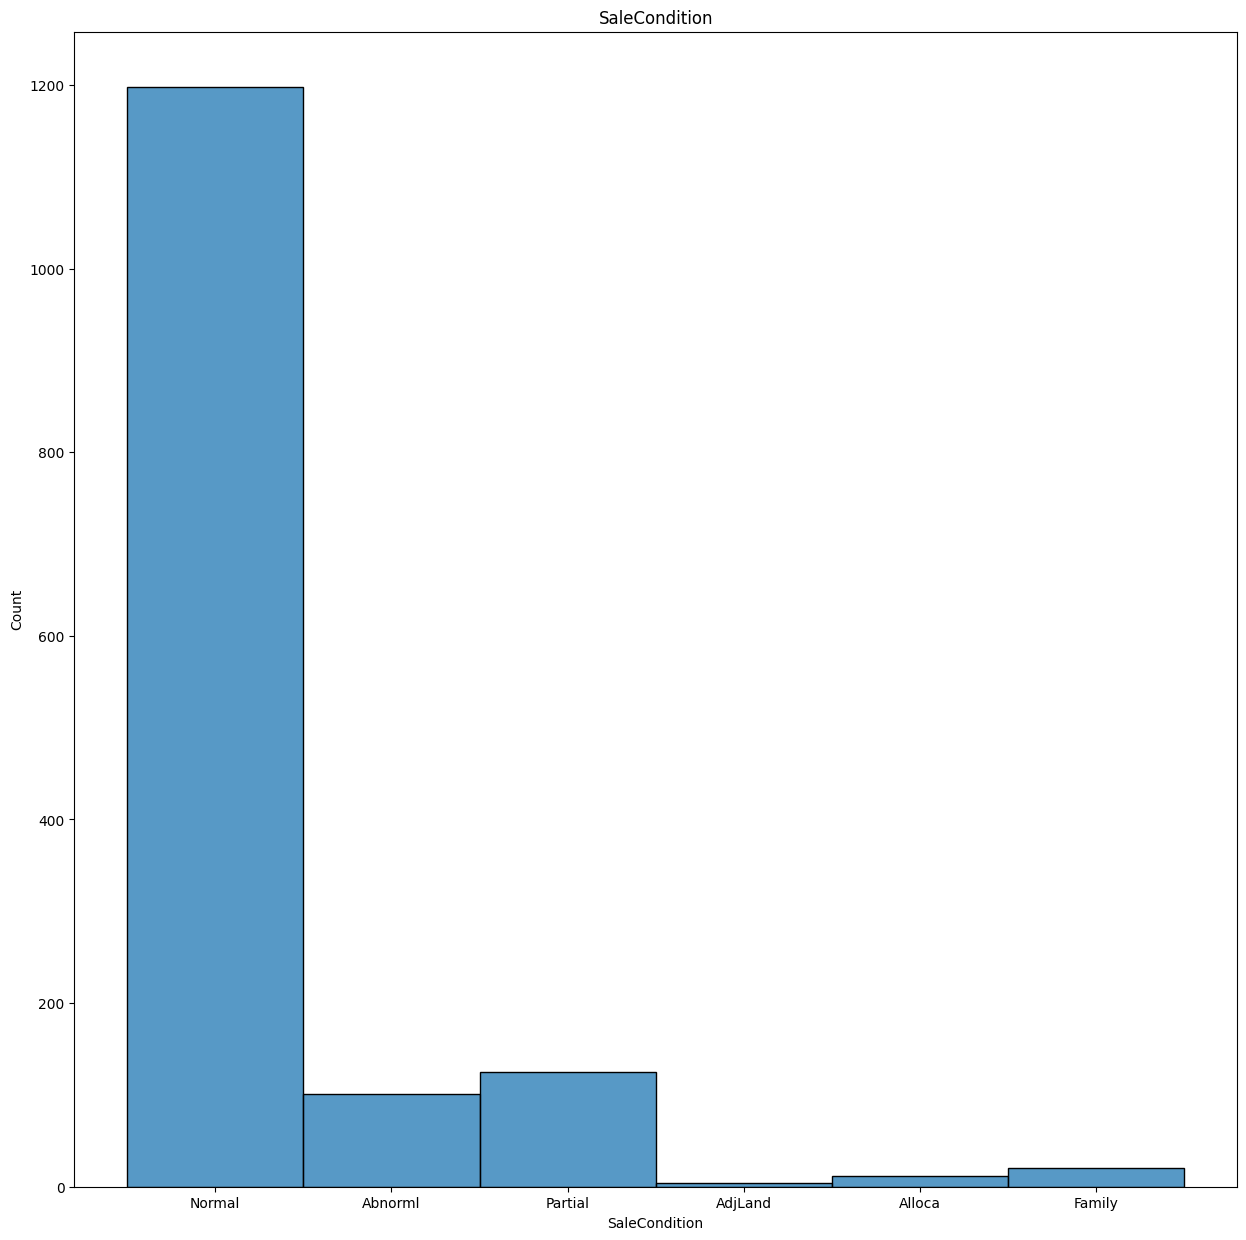

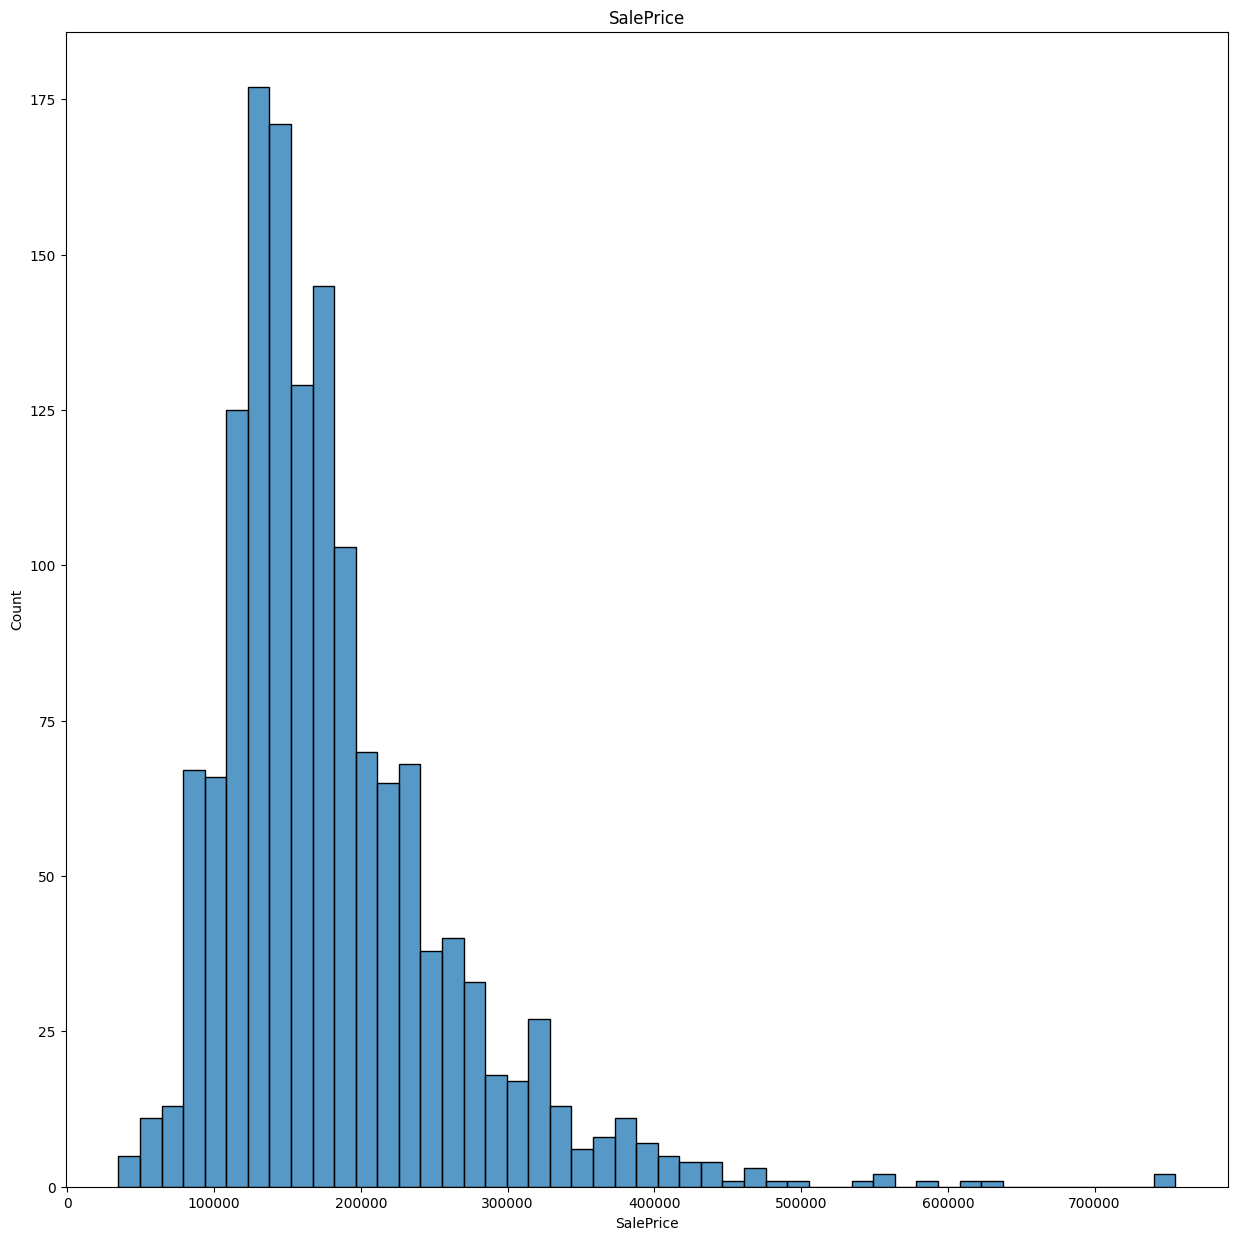

In [9]:
for feature in train_csv.columns:
    if feature == "Neighborhood":
        plt.figure(figsize=(30,30))
    else:
        plt.figure(figsize=(15,15))
    plt.title(feature)
    sns.histplot(train_csv[feature])
    plt.show()

C:\Users\yixin\AppData\Local\Temp\ipykernel_35500\1316960256.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_csv["SalePrice"])


<Axes: xlabel='SalePrice', ylabel='Density'>

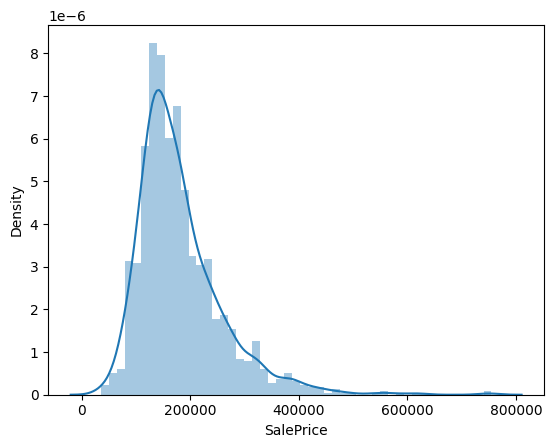

In [10]:
sns.distplot(train_csv["SalePrice"])

In [11]:
train_csv["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Missing Value imputation and Object Datatpye Encoding

Here we start with a relatively simple approach. We firstly encode the categorical data to numeric, and treat each NaN as a separate, independent label.
<br>

After the imputation, we realized that there are barely missing values left. For the sake of simplification we will **temporaily remove those rows**. And in data cleaning, those will be imputed with a more sophisticated method.

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()

encoded_train_csv = dict()

for feature in train_csv.columns:
    
    if train_csv[feature].dtype == "O":
        encoded_train_csv.setdefault(feature,encoder.fit_transform(train_csv[feature]))

    else:
        encoded_train_csv.setdefault(feature,train_csv[feature])

encoded_train_csv = pd.DataFrame(encoded_train_csv)

In [14]:
encoded_train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
# imp = IterativeImputer(max_iter=100, random_state=0, verbose=True)

# imp.fit_transform(encoded_train_csv)

In [16]:
# simple_imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
# simple_imp.fit_transform(encoded_train_csv)

In [17]:
encoded_train_csv = encoded_train_csv.dropna()

encoded_train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   MSZoning       1121 non-null   int32  
 3   LotFrontage    1121 non-null   float64
 4   LotArea        1121 non-null   int64  
 5   Street         1121 non-null   int32  
 6   Alley          1121 non-null   int32  
 7   LotShape       1121 non-null   int32  
 8   LandContour    1121 non-null   int32  
 9   Utilities      1121 non-null   int32  
 10  LotConfig      1121 non-null   int32  
 11  LandSlope      1121 non-null   int32  
 12  Neighborhood   1121 non-null   int32  
 13  Condition1     1121 non-null   int32  
 14  Condition2     1121 non-null   int32  
 15  BldgType       1121 non-null   int32  
 16  HouseStyle     1121 non-null   int32  
 17  OverallQual    1121 non-null   int64  
 18  OverallCond  

## Clean the data

###### What to clean?
- Outliers: remove them
- Multicollinearity: Remove by LASSO
- Homoscedasity: Adjust the data to make each independent variable homoscedasous
- Missing Value: Fill in with forward or backward fill

## LASSO Regression on raw data
This is an initial tryout on raw, unprocessed data. We use this one as a dummy model

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from numpy import mean, std, absolute

In [19]:
encoded_train_csv = encoded_train_csv.drop(columns="Id")

X = encoded_train_csv.iloc[:,:-1]
Y = encoded_train_csv.iloc[:,-1:]

In [20]:
alphas = np.logspace(-4, 0, 50)

result_mean = []
result_std = []
result_alpha = []

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)

for alpha in alphas:
    model = Lasso(alpha=alpha)
    
    scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    print(f'Mean MAE: {-mean_score:.3f} STD: {std_score:.3f} alpha={alpha}')
    
    result_mean.append(mean_score)
    result_std.append(std_score)
    result_alpha.append(alpha)

print(" ")

# Find the best alpha based on maximum and minimum MAE (note: we're using negative MAE)
max_mae = max(result_mean)
min_mae = min(result_mean)

print(f"Maximum MAE: {-min_mae:.3f}, alpha={result_alpha[result_mean.index(min_mae)]}")
print(f"Minimum MAE: {-max_mae:.3f}, alpha={result_alpha[result_mean.index(max_mae)]}")

Mean MAE: 22282.626 STD: 1963.498 alpha=0.0001
Mean MAE: 22282.626 STD: 1963.498 alpha=0.00012067926406393288
Mean MAE: 22282.626 STD: 1963.498 alpha=0.00014563484775012445
Mean MAE: 22282.626 STD: 1963.498 alpha=0.00017575106248547912
Mean MAE: 22282.626 STD: 1963.498 alpha=0.00021209508879201905
Mean MAE: 22282.626 STD: 1963.498 alpha=0.0002559547922699536
Mean MAE: 22282.625 STD: 1963.498 alpha=0.00030888435964774815
Mean MAE: 22282.625 STD: 1963.498 alpha=0.0003727593720314938
Mean MAE: 22282.625 STD: 1963.498 alpha=0.0004498432668969444
Mean MAE: 22282.624 STD: 1963.498 alpha=0.0005428675439323859
Mean MAE: 22282.624 STD: 1963.498 alpha=0.0006551285568595509
Mean MAE: 22282.623 STD: 1963.497 alpha=0.0007906043210907702
Mean MAE: 22282.622 STD: 1963.497 alpha=0.0009540954763499944
Mean MAE: 22282.622 STD: 1963.497 alpha=0.0011513953993264468
Mean MAE: 22282.621 STD: 1963.497 alpha=0.0013894954943731374
Mean MAE: 22282.619 STD: 1963.497 alpha=0.0016768329368110067
Mean MAE: 22282.61

## Conclusion

We initially explored the data and applied a relatively simple labelling method, and **dropped rows with missing values**. </br>

This dummy training dataset consists of 1121 datapoints. LASSO was trained on this dataset, where the dataset was splitted into a train-test ratio of 0.7:0.3. </br>

**10-fold stratified cross validation** was used to estimate the model performance, measured in **Mean Absolute Error (MAE)**. </br>

The initial result suggests that:
- On this dummy model, the MAE remains approximately -22000, meaning that **the predicted house price of each house was different from the actual house price by approximately 80 dollars on average**.
- The L1 penalty rate (alpha) improves the model performance significantly if equals to 1.

#### Next action:
- Apply a more sophisticated data cleaning method
- Rerun the model with multiple penalty rates